# Sephora Product Price Prediction Model

## Table of Contents:

1. [Part 1: Introduction](#introduction)
    - [Background Context](#Background)
    - [Research Questions](#research)
    - [Brief Summary of Findings](#summary)
    
2. [Part 2: Data Overview](#overview)
    - [Data Source](#source)
    - [About the Data](#aboutthedata)
    - [Data Content](#content)
    - [Revelant Content](#relevantcontent)

3. [Part 3: Data Cleaning](#cleaning)

4. [Part 4: Visualization and Exploratory Data Analysis](#eda)
    - [y1: New_Add_to_Cart_Browsing](#y1plot)
    - [y2: Cart_Completion_Frequency ](#y2plot)  
    
5. [Part 5: Data Description](#datadescription)
    - [Motivation](#motivation)
    - [Credits and values of Data source](#credit)
    - [Data collection and Data processing](#datacollection)
    - [Observations and Attributes (rows and columns)](#observations)
    
6. [Part 6: Preregistration statements](#preregistration)

7. [Part 7: Price Prediction Model](#pricepredictionmodel)
    
8. [Part 8: Conclusion and Interpretation](#part8)
    - [Interpretation](#interpretation)
    - [Conclusion](#conclusion)
    
9. [Part 9: Data Limitation](#datalimitation)  
 
10. [Appendix](#appendix) 

## Part 1: Introduction <a name="introduction"></a>

### Background Context <a name="Background"></a>

Due to the rise of social media, the beauty industry has become one of the leading industries and will continue to grow in the future. Personally, as someone who loves diving into beauty products, I am interested to uncover the underlying factors that influence the pricing of beauty items, ranging from brand names, ratings, and beauty category. This could product actionable insights to improve customer satifisfaction and pricing structures for beauty products on Sephora's platform.

### Research Question: <a name="research"></a>

**Correlation between user experience and price;** 
1) Do higher levels of helpfulness of Amazon reviews, helpfulness of Amazon recommendations, or personalized recommendations correlate with the higher frequency of users adding items to their shopping carts?
2) Do higher levels of helpfulness of Amazon reviews, helpfulness of Amazon recommendations, or personalized recommendations correlate with the higher frequency of users completing shopping cart purchases?

In this project, we would like to investigate if there is a correlation between x-variables (ratings, brand name, category) and price. 

### Brief Summary of Findings: <a name="summary"></a>
**Hypothesis 1**

- Higher levels of Amazon review helpfulness and Amazon recommendation helpfulness correlate to higher frequency of users adding items to cart, but higher levels of personalized recommendations does not.

**Hypothesis 2**

- Higher levels of Amazon review helpfulness and Amazon recommendation helpfulness correlate to higher frequency of users completing shopping cart purchases, but higher levels of personalized recommendations does not.


## Part 2: Data Overview <a name="overview"></a>

**Data Source** <a name="source"></a>

I found the dataset about Sephora Products and Skincare on Kaggle and it is part of a larger project scope about information about Sephora's products and user reviews of the Skincare category in Sephora. In my project, I focused on the first part, where the creator scraped Sephora's website via Python's BeautifulSoup library to collect information about all beauty products (over 8,000) from the Sephora online store, including product and brand names, prices, ingredients, ratings, and other features on the website.

**About the Data** <a name="aboutthedata"></a>

The data includes variables that can provide valuable insights about product characteristics and consumer behavior in relation to the price.

For example, it includes product details such as product name and brand name, customer behavior such as love counts (how many people favorited this product), and decision-making factors such as ratings, highlights, and more.

**Data Content** <a name="content"></a>

The dataset originally had factors such as product_id, product_name, brand_id, brand_name, loves_count, rating, reviews, size, variation_type, variation_value, variation_desc, ingredients, price_usd, value_price_usd, sale_price_usd, limited_edition, new, online_only, out_of_stock, sephora_exclusive, highlights, primary_category, secondary_category, tertiary_category, child_count, child_max_price, and child_min_price.

**Revelant Content** <a name="relevantcontent"></a>

I picked product_name, brand_name, loves_count, rating, primary_category, secondary_category, and price_usd because I felt that factors such as Brand Name, Love Count, Rating, and Category are more relevant to us in real life. These factors contribute to what most people value when making choices in making the price tag of the product. I mainly wanted to see if there was a pattern in how product factors can contribute to the decision-making process marking the price tag.

In [157]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, \
LogisticRegression
import duckdb
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, ShuffleSplit, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm 
from scipy.stats import kendalltau


In [158]:
#import packages and read csv file
raw_df=pd.read_csv("product_info.csv")

print(raw_df.shape)
raw_df.head()

(8494, 27)


product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0    3.64    11.00             NaN                                 NaN   
1    4.15    13.00  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2    4.25    16.00  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3    4.48    21.00  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4    3.23    13.00  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  \
0             NaN  ...           1            0                  0   
1  3.4 oz/ 100 mL  ...           1            0                  0   
2  3.4 oz/ 100 mL  ...           1            0                  0   
3  3.4 oz/ 100 mL  ...           1            0                  0   
4  3.4 oz/ 100 mL  ...           1            0                  0   

                                          highlights  primary_category  \
0  ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...         Fragrance   
1  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
2  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
3  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
4  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   

   secondary_category  tertiary_category  child_count  child_max_price  \
0   Value & Gift Sets  Perfume Gift Sets            0              NaN   
1               Women            Perfume            2            85.00   
2               Women            Perfume            2            75.00   
3               Women            Perfume            2            75.00   
4               Women            Perfume            2            75.00   

   child_min_price  
0              NaN  
1            30.00  
2            30.00  
3            30.00  
4            30.00  

[5 rows x 27 columns]

## Part 3: Data Cleaning: <a name="cleaning"></a>
Based on the research questions and my interests, I filtered out 7 variables/columns relevant to my study, including product name, brand name, loves count, rating, price, primary category, and secondary category.

- Null Values: I examined the dataset for null values and subsequently dropped 278 values. Given the size of this dataframe of over 8,000 values, dropping a small fraction would not be relevant enough to make a difference.
- Standardizing: I changed ratings and price_usd to two decimal values to ensure standardization in the real world
- Feature Engineering (Brand Names): I categorized brand names with fewer than 10 associated products as 'Other.' I want to optimize the price prediction model as singular values for each brand proved less informative for predictive modeling.
- Outliers: I removed outliers in love_counts column based on its z-scores. This decision was motivated by the considerable variability observed in the dataset.
- Feature Engineering (Primary Category): To enhance the relevance of the 'primary_category' column, non-categorical variables such as 'Mini Size' and 'Men' were reassigned to more meaningful values derived from the 'secondary_category.' Concurrently, categories with a limited product representation were consolidated into an 'Other' category.
- Duplicates: I checked and removed duplicate rows for the clean data preprocessing.

For more details, please check the Appendix located in my Github Repository.

In [159]:
#Drop features that are not relevant to my research questions

dropped_df= raw_df.drop(['product_id','brand_id','reviews','size', 'variation_type', 'variation_value', \
                         'variation_desc', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new',\
                         'online_only','out_of_stock', 'sephora_exclusive', 'child_count','child_max_price', \
                         'child_min_price', 'highlights', 'tertiary_category', 'ingredients'],axis='columns')
dropped_df.shape
dropped_df.head()


product_name brand_name  loves_count  rating  price_usd  \
0    Fragrance Discovery Set      19-69         6320    3.64      35.00   
1    La Habana Eau de Parfum      19-69         3827    4.15     195.00   
2  Rainbow Bar Eau de Parfum      19-69         3253    4.25     195.00   
3       Kasbah Eau de Parfum      19-69         3018    4.48     195.00   
4  Purple Haze Eau de Parfum      19-69         2691    3.23     195.00   

  primary_category secondary_category  
0        Fragrance  Value & Gift Sets  
1        Fragrance              Women  
2        Fragrance              Women  
3        Fragrance              Women  
4        Fragrance              Women

### Missing Values

In [160]:
#Check number of null values
dropped_df.isnull().sum()

product_name            0
brand_name              0
loves_count             0
rating                278
price_usd               0
primary_category        0
secondary_category      8
dtype: int64

In [161]:
#Create new dataframe after dropping null values. 
#Since our data frame has over 8,000 values, dropping 278 values will not make a difference in our data analysis.
new_df = dropped_df.dropna()

#Double check if all null values are dropped
new_df.isnull().sum()

product_name          0
brand_name            0
loves_count           0
rating                0
price_usd             0
primary_category      0
secondary_category    0
dtype: int64

In [162]:
#Check shape of our new data frame
print(new_df.shape)
new_df.head()

(8209, 7)


product_name brand_name  loves_count  rating  price_usd  \
0    Fragrance Discovery Set      19-69         6320    3.64      35.00   
1    La Habana Eau de Parfum      19-69         3827    4.15     195.00   
2  Rainbow Bar Eau de Parfum      19-69         3253    4.25     195.00   
3       Kasbah Eau de Parfum      19-69         3018    4.48     195.00   
4  Purple Haze Eau de Parfum      19-69         2691    3.23     195.00   

  primary_category secondary_category  
0        Fragrance  Value & Gift Sets  
1        Fragrance              Women  
2        Fragrance              Women  
3        Fragrance              Women  
4        Fragrance              Women

### Standardizing

In [163]:
#Change price and rating to two decimal places

new_df['price_usd'].unique()
new_df.head()

pd.set_option('display.float_format', '{:.2f}'.format)
new_df.head()


product_name brand_name  loves_count  rating  price_usd  \
0    Fragrance Discovery Set      19-69         6320    3.64      35.00   
1    La Habana Eau de Parfum      19-69         3827    4.15     195.00   
2  Rainbow Bar Eau de Parfum      19-69         3253    4.25     195.00   
3       Kasbah Eau de Parfum      19-69         3018    4.48     195.00   
4  Purple Haze Eau de Parfum      19-69         2691    3.23     195.00   

  primary_category secondary_category  
0        Fragrance  Value & Gift Sets  
1        Fragrance              Women  
2        Fragrance              Women  
3        Fragrance              Women  
4        Fragrance              Women

### Feature Engineering with Brand Name

In [164]:
#Check for the count of each unique brand name.

print(len(new_df['brand_name'].unique()))
new_df.loc[:, 'brand_name'] = new_df['brand_name'].apply(lambda x: x.strip())
brand_stats = new_df['brand_name'].value_counts(ascending=False)
brand_stats

302


brand_name
SEPHORA COLLECTION    346
CLINIQUE              177
Dior                  133
tarte                 126
Bumble and bumble     107
                     ... 
Aquis                   1
dpHUE                   1
Eight & Bob             1
PROVEN Skincare         1
Jillian Dempsey         1
Name: count, Length: 302, dtype: int64

In [165]:
#Change brand names with less than 10 products to Other.

brand_stats_less_than_10 = brand_stats[brand_stats <= 10]

new_df.loc[:, 'brand_name'] = new_df['brand_name'].apply(lambda x: 'Other' if x in brand_stats_less_than_10 else x)

#Double check this works
updated_brand_stats = new_df['brand_name'].value_counts(ascending=False)
print(len(updated_brand_stats[updated_brand_stats <= 10]))

new_df.head()

0


product_name brand_name  loves_count  rating  price_usd  \
0    Fragrance Discovery Set      19-69         6320    3.64      35.00   
1    La Habana Eau de Parfum      19-69         3827    4.15     195.00   
2  Rainbow Bar Eau de Parfum      19-69         3253    4.25     195.00   
3       Kasbah Eau de Parfum      19-69         3018    4.48     195.00   
4  Purple Haze Eau de Parfum      19-69         2691    3.23     195.00   

  primary_category secondary_category  
0        Fragrance  Value & Gift Sets  
1        Fragrance              Women  
2        Fragrance              Women  
3        Fragrance              Women  
4        Fragrance              Women

### Outliers

In [166]:
# Check variability of love_counts

new_df.loves_count.describe()

count      8209.00
mean      30160.74
std       67014.73
min           0.00
25%        4162.00
50%       10456.00
75%       27800.00
max     1401068.00
Name: loves_count, dtype: float64

In [167]:
# Find outliers with z-scores 
z_scores = (new_df['loves_count'] - new_df['loves_count'].mean()) / new_df['loves_count'].std()

# Filter out rows where the absolute z-score is greater than the threshold in a new dataframe
new_df_no_outliers = new_df[np.abs(z_scores) <= 3.0]

print(len(new_df_no_outliers))


8045


In [416]:
# Check variability after cleaning
new_df_no_outliers.loves_count.describe()

count     8045.00
mean     22800.56
std      33435.44
min          0.00
25%       4079.00
50%      10123.00
75%      26153.00
max     231052.00
Name: loves_count, dtype: float64

In [415]:
new_df_no_outliers.head()

product_name brand_name  loves_count  rating  price_usd  \
0    Fragrance Discovery Set      19-69         6320    3.64      35.00   
1    La Habana Eau de Parfum      19-69         3827    4.15     195.00   
2  Rainbow Bar Eau de Parfum      19-69         3253    4.25     195.00   
3       Kasbah Eau de Parfum      19-69         3018    4.48     195.00   
4  Purple Haze Eau de Parfum      19-69         2691    3.23     195.00   

  primary_category secondary_category  
0        Fragrance  Value & Gift Sets  
1        Fragrance              Women  
2        Fragrance              Women  
3        Fragrance              Women  
4        Fragrance              Women

### Feature Engineering with Category Name

In [170]:
# Check for Category Names
new_df_no_outliers['primary_category'].unique()

array(['Fragrance', 'Bath & Body', 'Mini Size', 'Hair', 'Makeup',
       'Skincare', 'Tools & Brushes', 'Men'], dtype=object)

In [171]:
# Look for total products in each category
category_counts = new_df_no_outliers['primary_category'].value_counts()
print(category_counts)

primary_category
Skincare           2316
Makeup             2215
Hair               1410
Fragrance          1334
Bath & Body         393
Mini Size           269
Men                  58
Tools & Brushes      50
Name: count, dtype: int64


In [172]:
# Replace Mini Size with the more detailed category in the Secondary Category so it's not misleading
new_values = new_df_no_outliers['primary_category'] == 'Mini Size'
new_df_no_outliers.loc[new_values, 'primary_category'] = new_df_no_outliers.loc[new_values, 'secondary_category']

# Look for total products in each category again
category_counts = new_df_no_outliers['primary_category'].value_counts()
print(category_counts)

In [174]:
# Replace Men with the more detailed category in the Secondary Category so it's not misleading

new_values_men = new_df_no_outliers['primary_category'] == 'Men'
new_df_no_outliers.loc[new_values_men, 'primary_category'] = new_df_no_outliers.loc[new_values_men, 'secondary_category']

# Double check for total products in each category again

category_counts = new_df_no_outliers['primary_category'].value_counts()
print(category_counts)

In [176]:
# Combined Shaving and Tools & Brushes into own category since both are related

new_df_no_outliers['primary_category'] = new_df_no_outliers['primary_category'].replace({'Shaving': 'Tools & Brushes'})

category_counts = new_df_no_outliers['primary_category'].value_counts()
print(category_counts)

primary_category
Skincare             2410
Makeup               2347
Hair                 1462
Fragrance            1348
Bath & Body           400
Tools & Brushes        64
Value & Gift Sets       9
Other Needs             5
Name: count, dtype: int64


C:\Users\ashle\AppData\Local\Temp\ipykernel_19156\3101699553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_no_outliers['primary_category'] = new_df_no_outliers['primary_category'].replace({'Shaving': 'Tools & Brushes'})


In [177]:
# Replace 'Value & Gift Sets' and 'Other Needs' with 'Other' in the primary_category column
new_df_no_outliers['primary_category'] = new_df_no_outliers['primary_category'].replace({'Value & Gift Sets': 'Other', 'Other Needs': 'Other'})

category_counts = new_df_no_outliers['primary_category'].value_counts()
print(category_counts)

primary_category
Skincare           2410
Makeup             2347
Hair               1462
Fragrance          1348
Bath & Body         400
Tools & Brushes      64
Other                14
Name: count, dtype: int64


C:\Users\ashle\AppData\Local\Temp\ipykernel_19156\2207544356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_no_outliers['primary_category'] = new_df_no_outliers['primary_category'].replace({'Value & Gift Sets': 'Other', 'Other Needs': 'Other'})


In [178]:
# Drop secondary_category column after cleaning primary_category

final_df = new_df_no_outliers.drop(columns=['secondary_category'])

### Duplicates

In [180]:
# Display the rows that are duplicates

duplicates = final_df.duplicated()

# Display the rows that are duplicates
duplicate_rows = final_df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [product_name, brand_name, loves_count, rating, price_usd, primary_category]
Index: []


In [179]:
# Final dataframe
final_df.head()

product_name brand_name  loves_count  rating  price_usd  \
0    Fragrance Discovery Set      19-69         6320    3.64      35.00   
1    La Habana Eau de Parfum      19-69         3827    4.15     195.00   
2  Rainbow Bar Eau de Parfum      19-69         3253    4.25     195.00   
3       Kasbah Eau de Parfum      19-69         3018    4.48     195.00   
4  Purple Haze Eau de Parfum      19-69         2691    3.23     195.00   

  primary_category  
0        Fragrance  
1        Fragrance  
2        Fragrance  
3        Fragrance  
4        Fragrance

## Part 4: Visualization and Exploratory Data Analysis (EDA) <a name="eda"></a>

The following plots visualize how brand_name, loves_count, rating, and primary_category affect the price. 

### Product Ratings, Prices, and Categories

This scatterplot visually explores the relationship between product ratings, prices, and categories within our dataset. Each point on the plot represents a beauty product, and is differentiated by color, showcasing distinct beauty product categories ('primary_category').

x-axis: product's rating on a scale from 0 to 5
y-axis: product's price in USD.

Note: I set the y-axis limit to 750 for a focused view of the majority of data points.

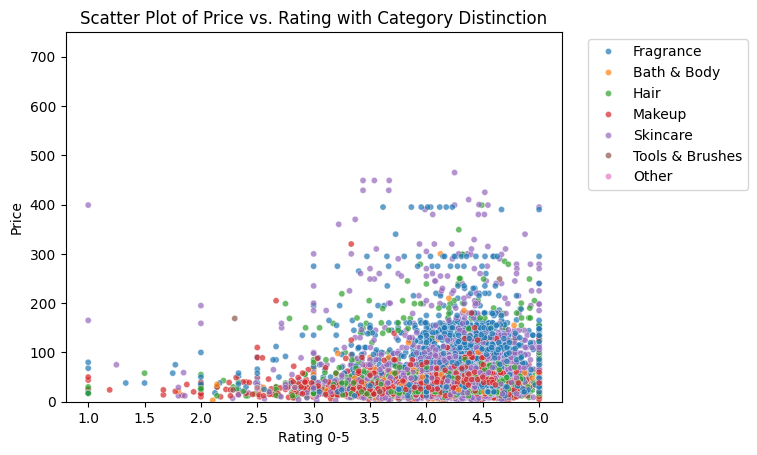

In [296]:
sns.scatterplot(data=final_df, x='rating', y='price_usd', hue='primary_category', alpha=0.7, s=20, legend=True)
plt.xlabel('Rating 0-5')
plt.ylim(0, 750)
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Scatter Plot of Price vs. Rating with Category Distinction')
plt.show()

Grid of subplots between ratings and price based on the category

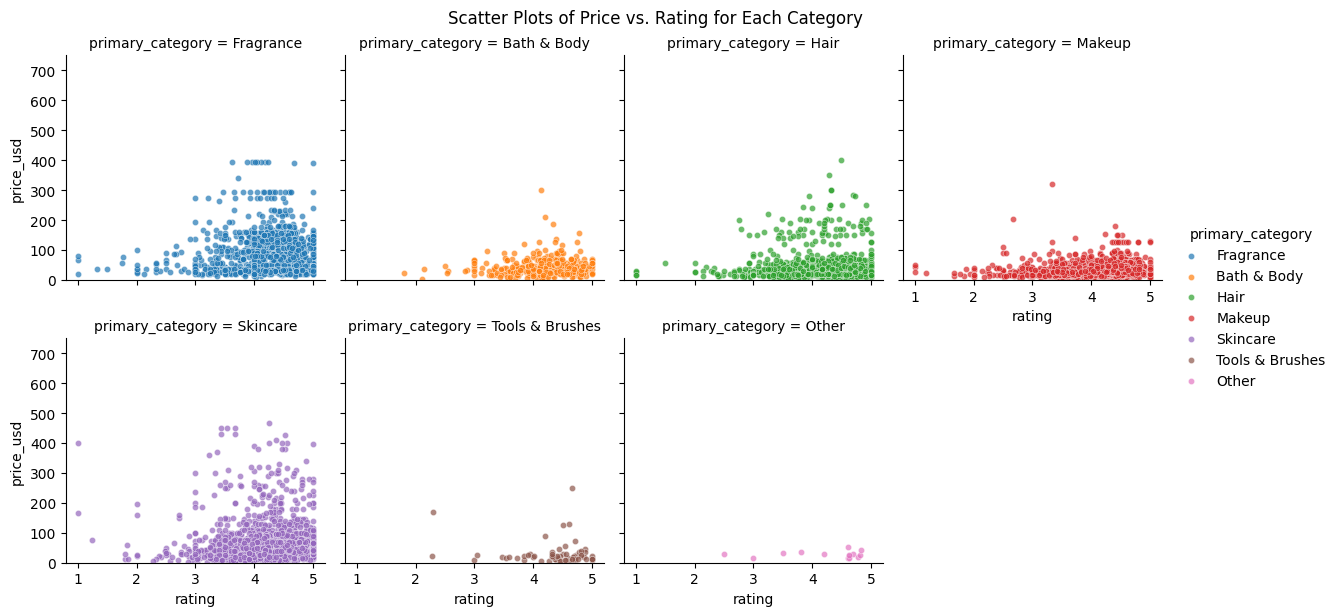

In [298]:
g = sns.FacetGrid(final_df, col='primary_category', hue='primary_category', col_wrap=4)
g.map(sns.scatterplot, 'rating', 'price_usd', alpha=0.7, s=20)
g.set(ylim=(0, 750))
g.add_legend()
plt.suptitle('Scatter Plots of Price vs. Rating for Each Category', y=1.02)
plt.show()

### Average Love Counts and Prices


This scatterplot visually explore the relationship between average love counts and average prices for each brand. Each point on the plot represents a beauty brand, and is differentiated by color and style.

x-axis: average love counts
y-axis: average price in USD

Note: I conducted an analysis of beauty product brands by calculating the average price and average love count for each brand using the 'final_df' dataset. The resulting 'brand_avg_stats' DataFrame captures these aggregate statistics. 


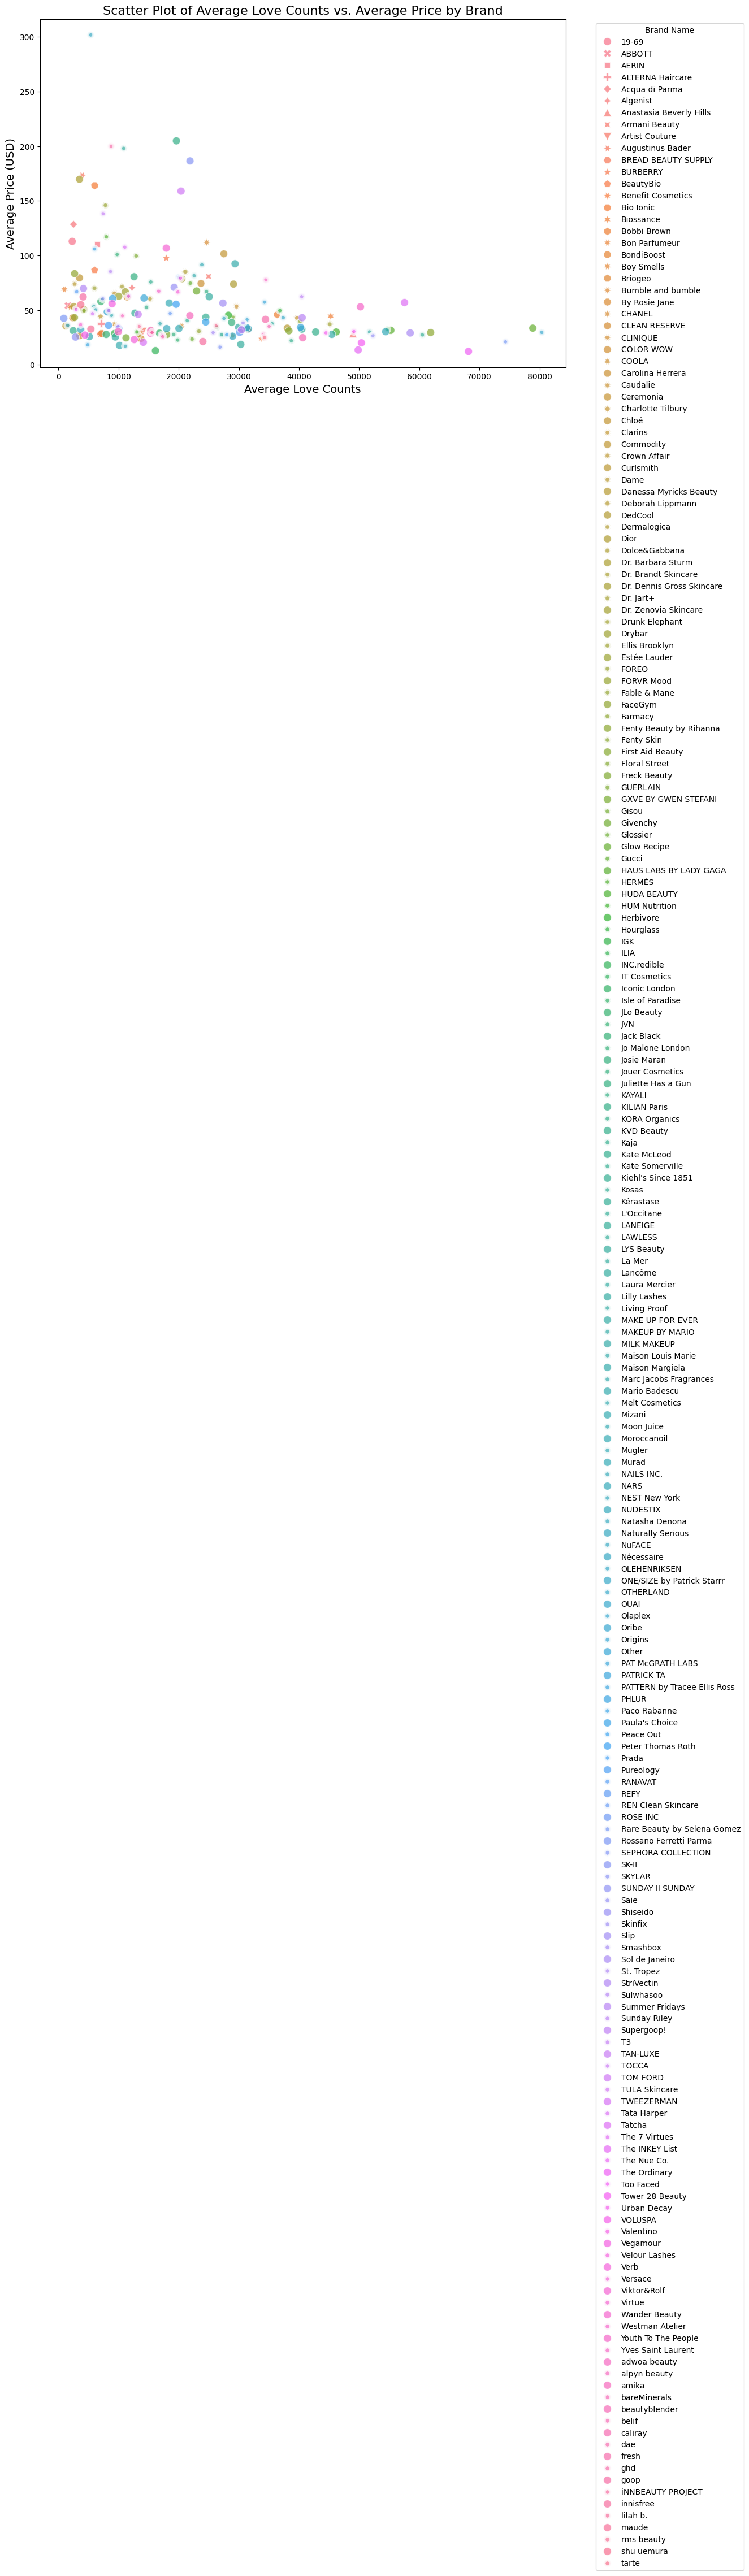

In [184]:
# Calculate average price and average love count for each brand
brand_avg_stats = final_df.groupby('brand_name').agg({'price_usd': 'mean', \
                                                      'loves_count': 'mean'}).reset_index()


plt.figure(figsize=(12, 8))

# Scatter plot for average love counts vs. average price
sns.scatterplot(data=brand_avg_stats, x='loves_count', y='price_usd', hue='brand_name', \
                style='brand_name', s=100, alpha=0.7)

plt.xlabel('Average Love Counts', fontsize=14)
plt.ylabel('Average Price (USD)', fontsize=14)
plt.title('Scatter Plot of Average Love Counts vs. Average Price by Brand', fontsize=16)
plt.legend(title='Brand Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This scatterplot visually explore the relationship between average love counts and average prices for the top ten most expensive and least expensive brands. The scatter plots are individually tailored for each brand, offering insights into how love counts correlate with prices. 

x-axis: average love counts
y-axis: average price in USD

Note: I calculated the average price for each brand from the 'final_df' dataset and sorted them in descending order to identify the most expensive brands. I then selected the top ten most expensive and least expensive brands based on their average prices. Within each iteration of the for loop, I filtered the dataset to include only data related to the current brand.

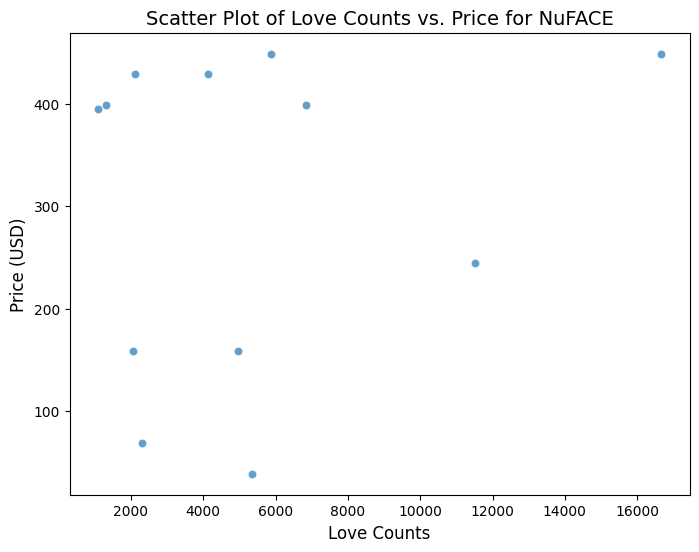

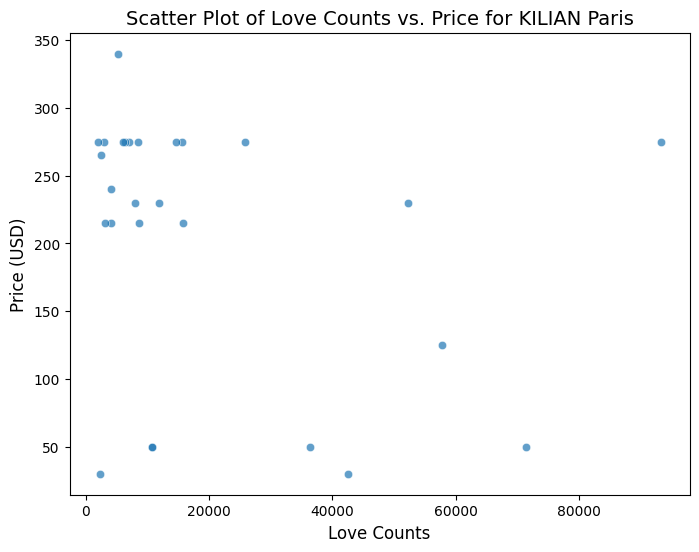

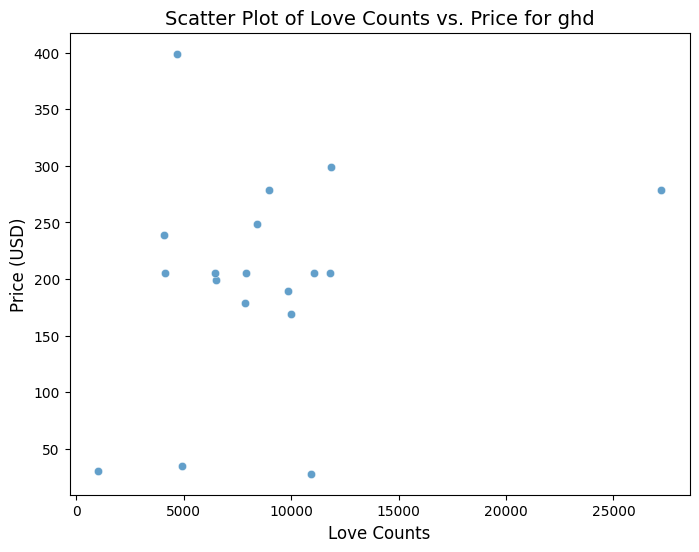

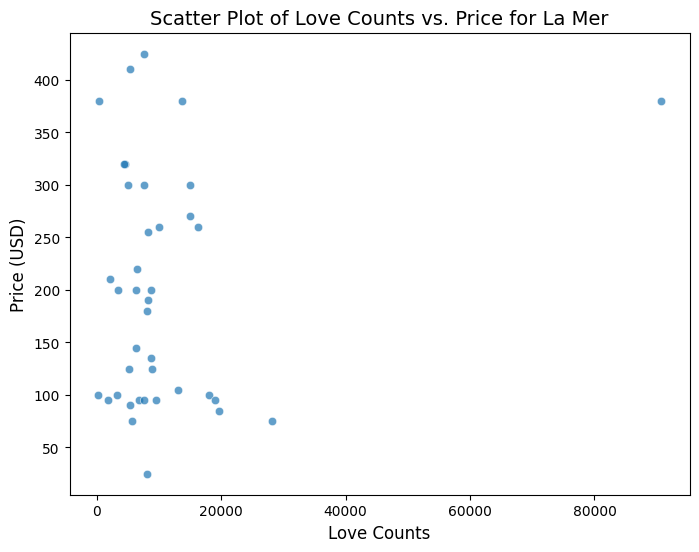

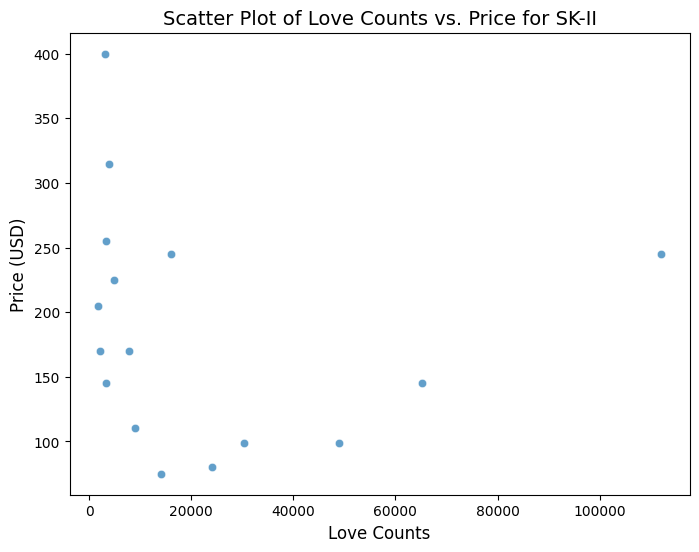

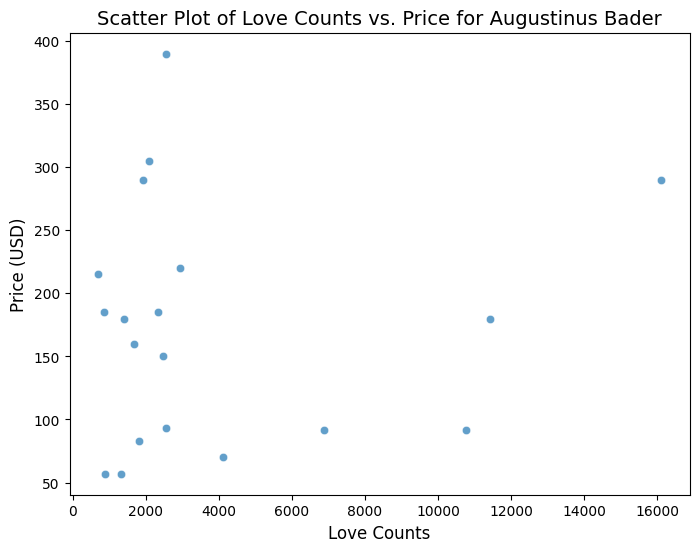

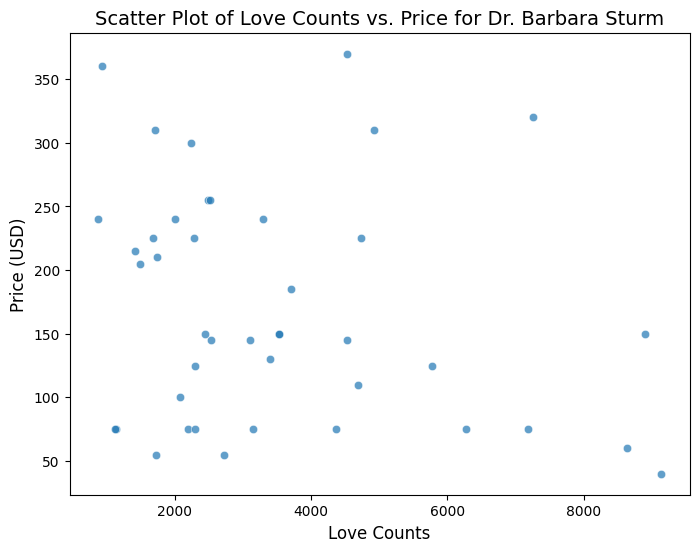

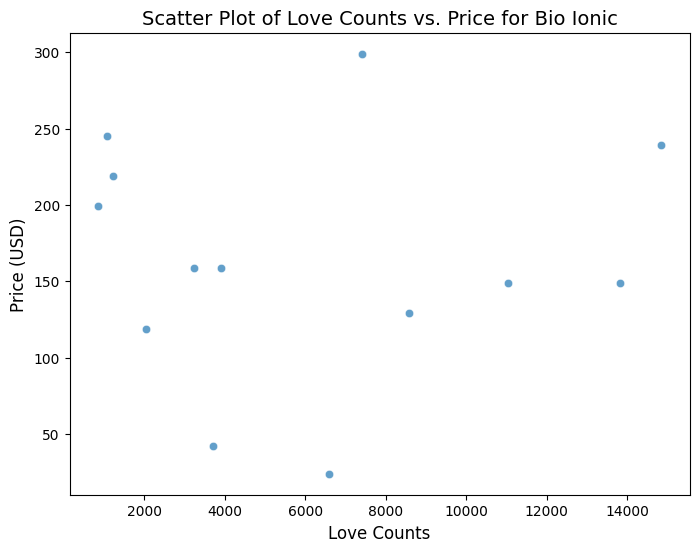

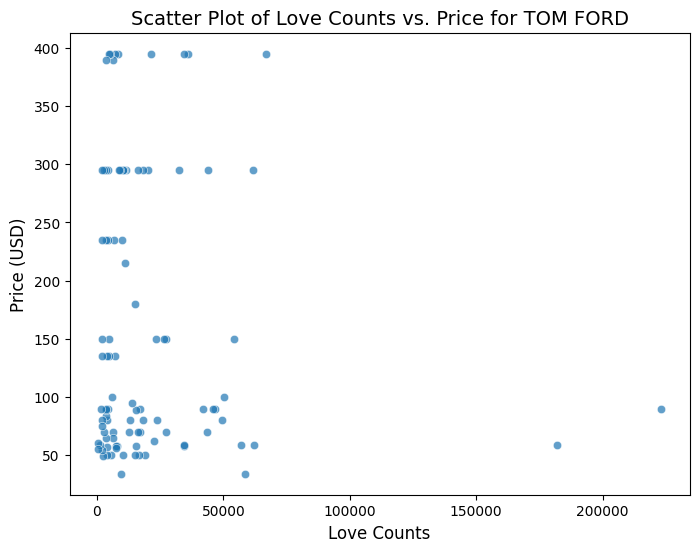

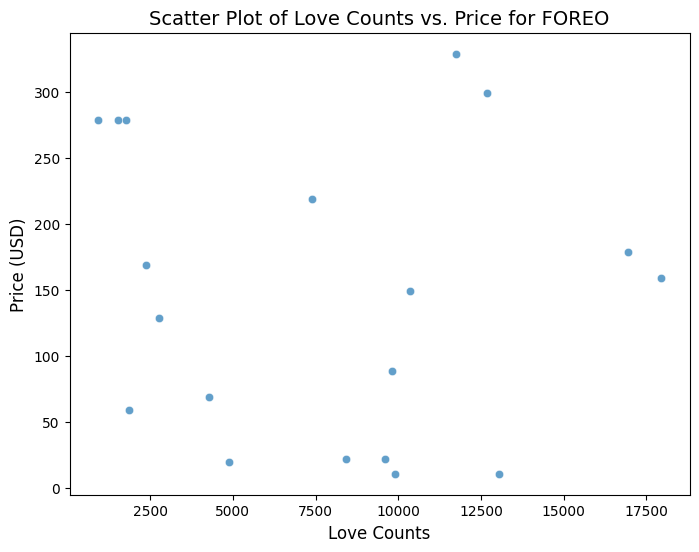

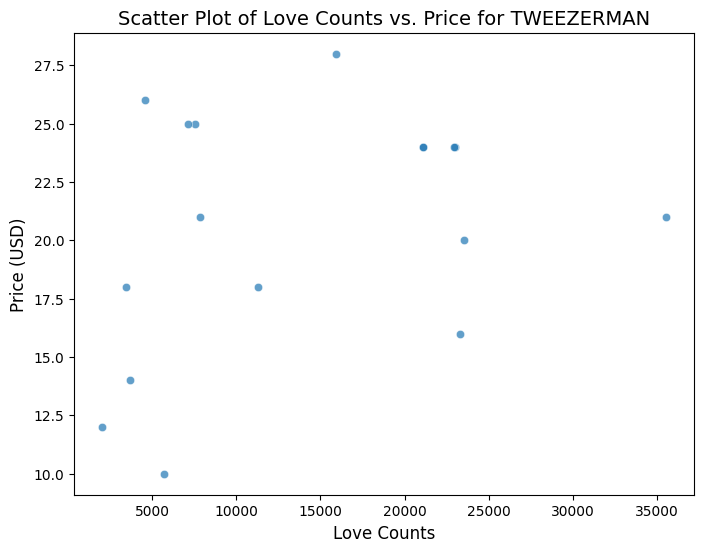

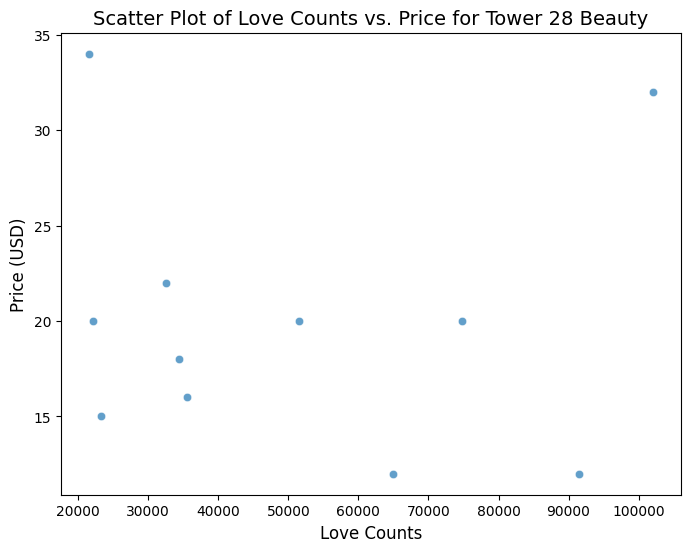

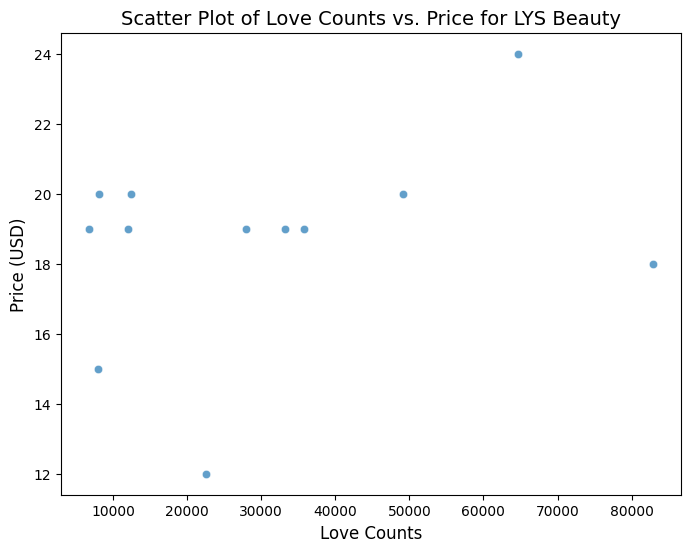

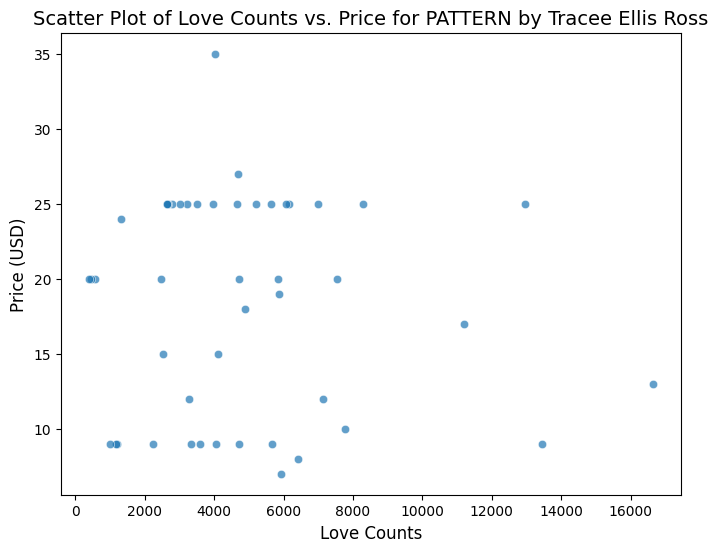

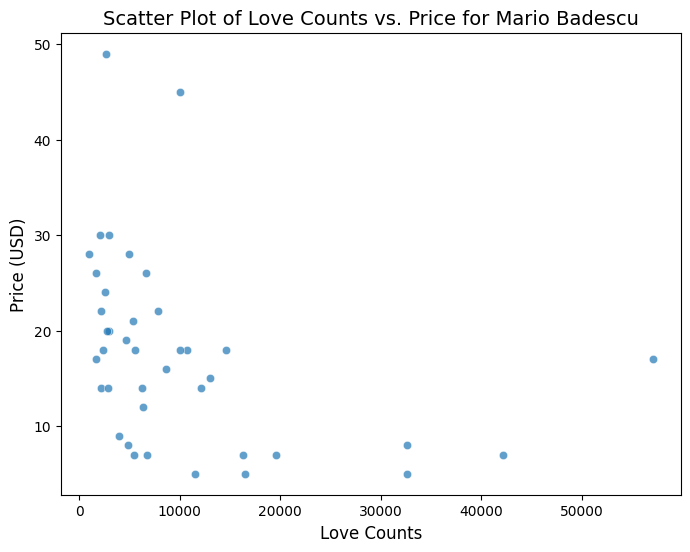

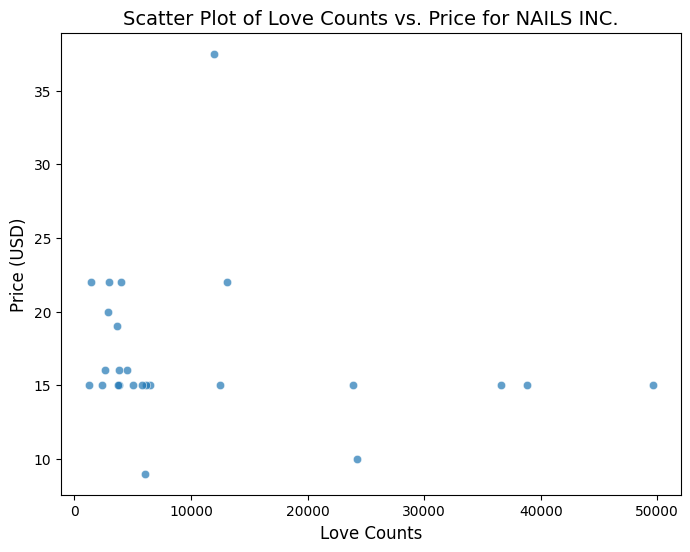

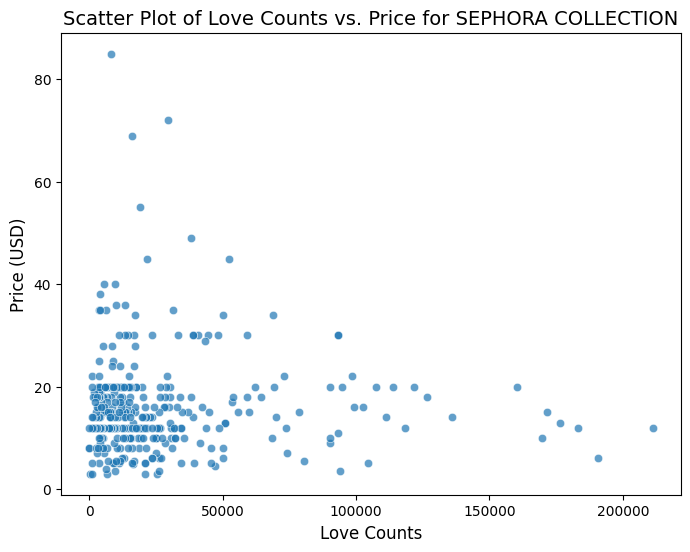

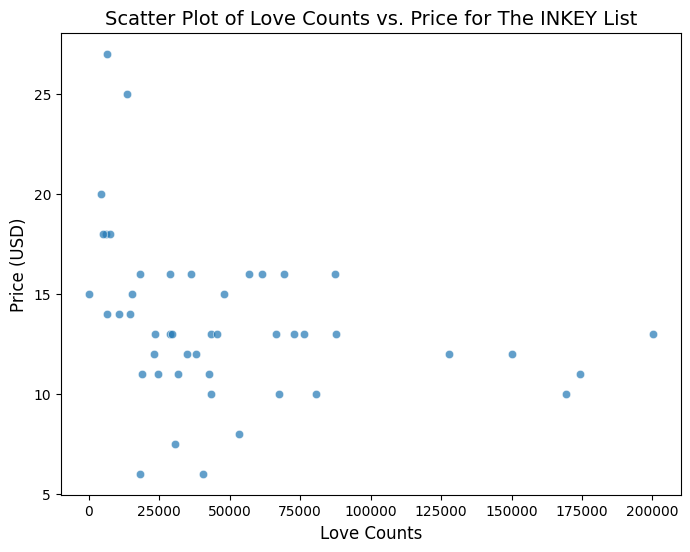

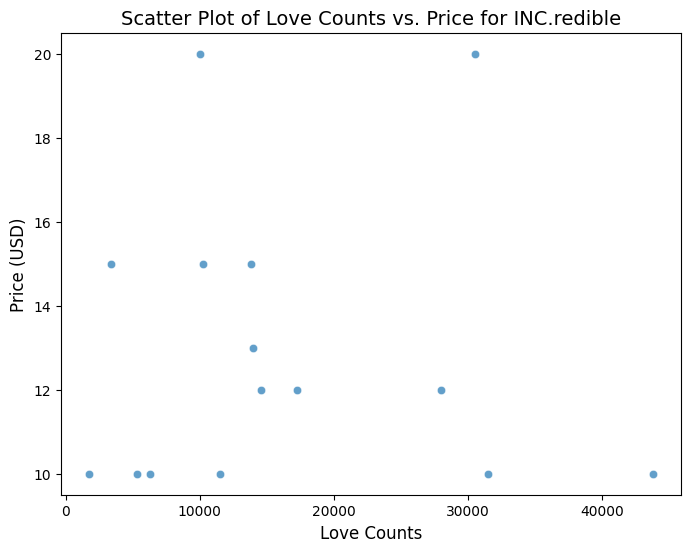

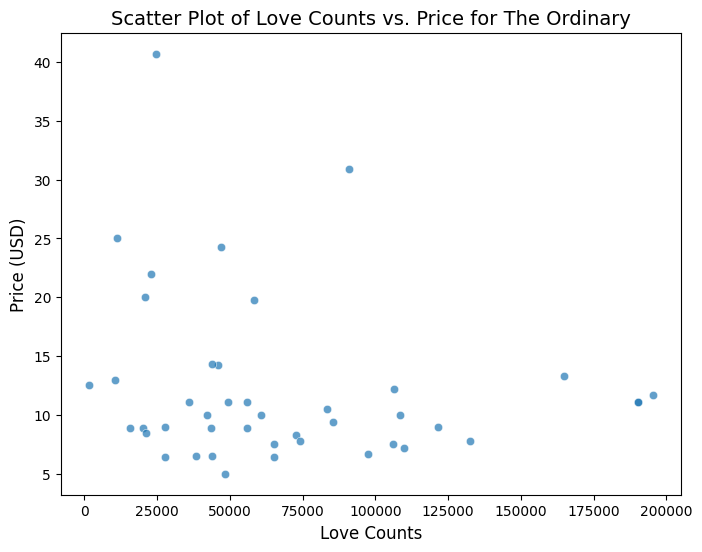

In [185]:
# Calculate average price for each brand
brand_avg_price = final_df.groupby('brand_name')['price_usd'].mean().sort_values(ascending=False)

# Select the top ten most expensive and least expensive brands
top_expensive_brands = brand_avg_price.head(10).index
top_cheapest_brands = brand_avg_price.tail(10).index

# Iterate through the top ten most expensive brands
for brand in top_expensive_brands:
    # Filter data for the current brand
    brand_data = final_df[final_df['brand_name'] == brand]
    
    plt.figure(figsize=(8, 6))

    # Scatter plot for love counts vs. price for the current brand
    sns.scatterplot(data=brand_data, x='loves_count', y='price_usd', alpha=0.7)

    plt.xlabel('Love Counts', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.title(f'Scatter Plot of Love Counts vs. Price for {brand}', fontsize=14)
    plt.show()

# Iterate through the top ten least expensive brands
for brand in top_cheapest_brands:
    # Filter data for the current brand
    brand_data = final_df[final_df['brand_name'] == brand]

    plt.figure(figsize=(8, 6))

    # Scatter plot for love counts vs. price for the current brand
    sns.scatterplot(data=brand_data, x='loves_count', y='price_usd', alpha=0.7)

    plt.xlabel('Love Counts', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.title(f'Scatter Plot of Love Counts vs. Price for {brand}', fontsize=14)
    plt.show()


Average Love Counts and Ratings for Top Ten Most Expensive and Top Ten Least Expensive Brands Together

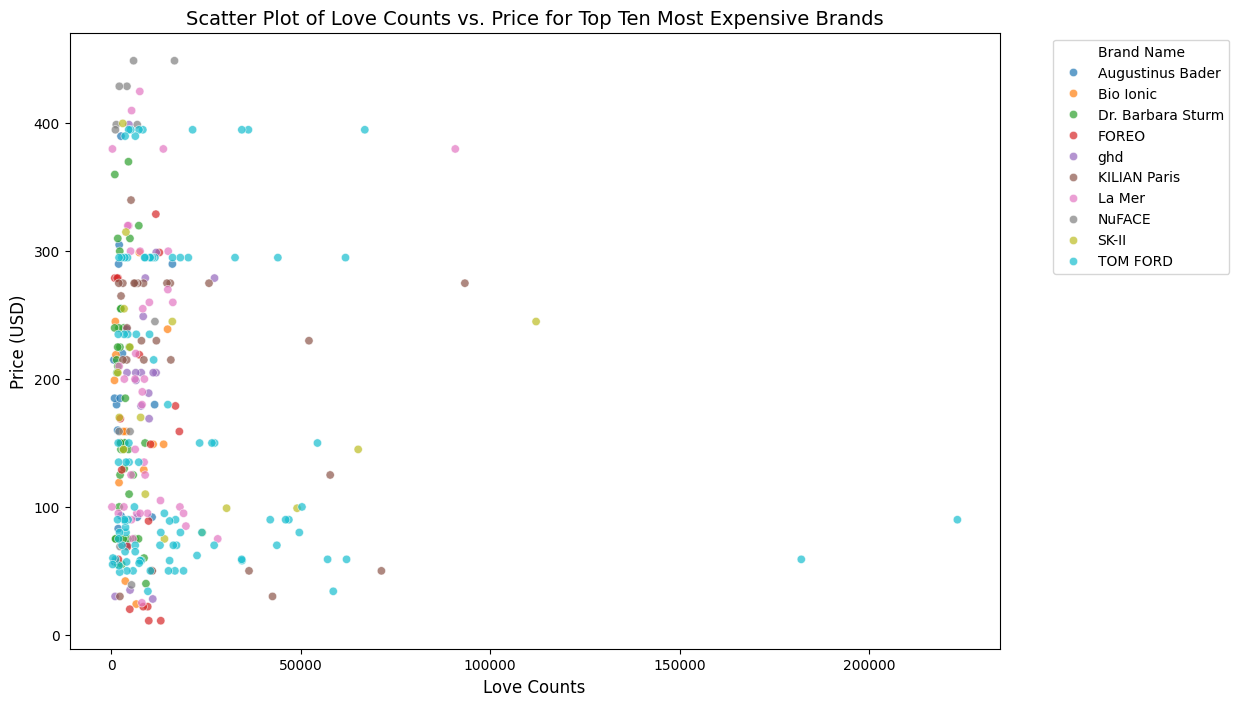

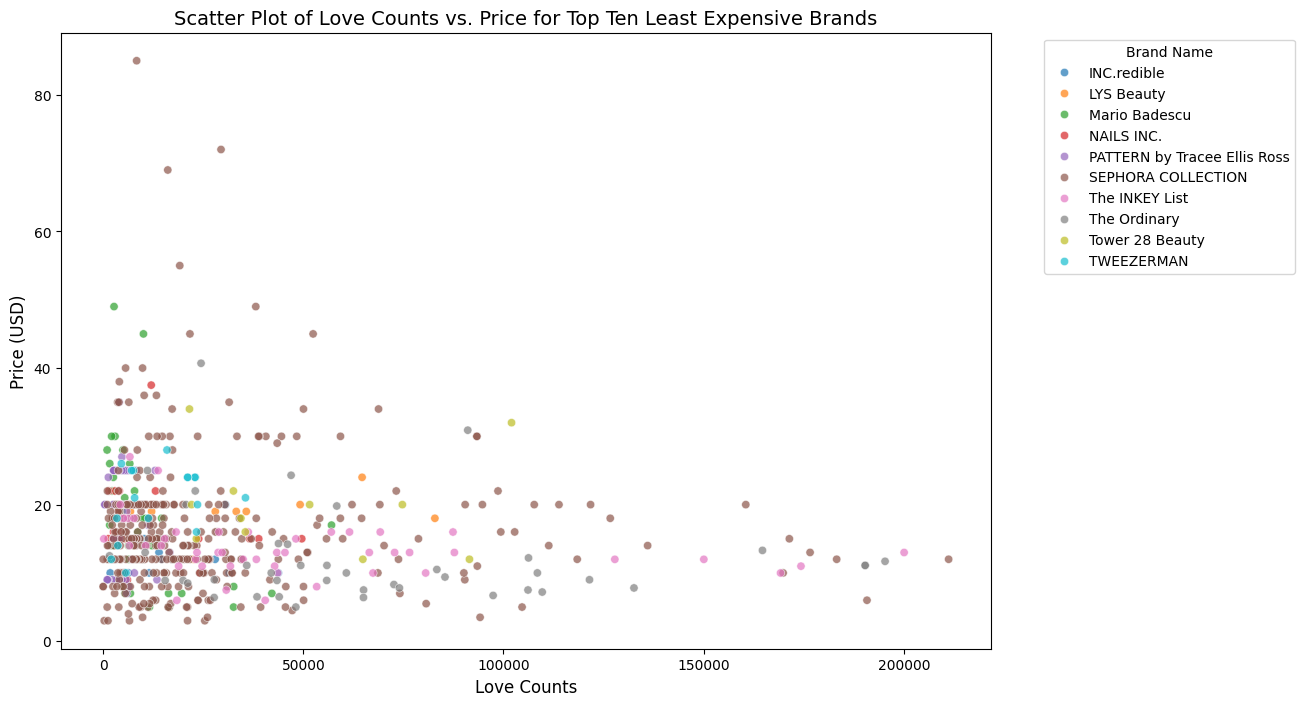

In [186]:
# Calculate average price for each brand
brand_avg_price = final_df.groupby('brand_name')['price_usd'].mean().sort_values(ascending=False)

# Select the top ten most expensive and least expensive brands
top_expensive_brands = brand_avg_price.head(10).index
top_cheapest_brands = brand_avg_price.tail(10).index

# Filter data for the top ten most expensive and least expensive brands
top_expensive_data = final_df[final_df['brand_name'].isin(top_expensive_brands)]
top_cheapest_data = final_df[final_df['brand_name'].isin(top_cheapest_brands)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Scatter plot for the top ten most expensive brands
sns.scatterplot(data=top_expensive_data, x='loves_count', y='price_usd', hue='brand_name', alpha=0.7)

plt.xlabel('Love Counts', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.title('Scatter Plot of Love Counts vs. Price for Top Ten Most Expensive Brands', fontsize=14)
plt.legend(title='Brand Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Set up another matplotlib figure for the top ten least expensive brands
plt.figure(figsize=(12, 8))

# Scatter plot for the top ten least expensive brands
sns.scatterplot(data=top_cheapest_data, x='loves_count', y='price_usd', hue='brand_name', alpha=0.7)

plt.xlabel('Love Counts', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.title('Scatter Plot of Love Counts vs. Price for Top Ten Least Expensive Brands', fontsize=14)
plt.legend(title='Brand Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Part 5: Data Description <a name="datadescription"></a>

### Motivation <a name="motivation"></a>

This dataset was created because the creator was interested in learning more about what factors correlate to price on Sephora products. can contribute to overall customer preference, behavior, and satisfaction with Amazon’s services. This dataset can help with finding patterns in product categories, regular and discount prices, brand popularity, the impact of different characteristics on price, and ingredient trends

### Credits and values of Data source <a name="credit"></a>
Nady Inky has some expertise in web scraping data datasets through their Silver Medal in Kaggle Dataset.

### Data collection and Data processing <a name="datacollection"></a>

This dataset was collected via Python scraper in March 2023 and contains: information about all beauty products (over 8,000) from the Sephora online store, including product and brand names, prices, ingredients, ratings, and all features and user reviews (about 1 million on over 2,000 products) of all products from the Skincare category, including user appearances, and review ratings by other users. One limitation is that newer products that came out after March 2023 would not be part of the data analysis.

### Observations and Attributes (rows and columns) <a name="observations"></a>

* product_id= The unique identifier for the product from the site
* product_name= The full name of the product
* brand_id= The unique identifier for the product brand from the site
* brand_name= The full name of the product brand
* loves_count= The number of people who have marked this product as a favorite
* rating= The average rating of the product based on user reviews
* reviews= The number of user reviews for the product
* size= The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type
* variation_type= The type of variation parameter for the product (e.g. Size, Color)
* variation_value= The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)
* variation_desc= A description of the variation parameter for the product (e.g. tone for fairest skin)
* ingredients= A list of ingredients included in the product, for example: [‘Product variation 1:’, ‘Water, Glycerin’, ‘Product variation 2:’, ‘Talc, Mica’] or if no variations [‘Water, Glycerin’]
* price_usd= The price of the product in US dollars
* value_price_usd= The potential cost savings of the product, presented on the site next to the regular price
* sale_price_usd= The sale price of the product in US dollars
* limited_edition= Indicates whether the product is a limited edition or not (1-true, 0-false)
* new= Indicates whether the product is new or not (1-true, 0-false)
* online_only= Indicates whether the product is only sold online or not (1-true, 0-false)
* out_of_stock= Indicates whether the product is currently out of stock or not (1 if true, 0 if false)
* sephora_exclusive= Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false)
* highlights= A list of tags or features that highlight the product's attributes (e.g. [‘Vegan’, ‘Matte Finish’])
* primary_category= First category in the breadcrumb section
* secondary_category= Second category in the breadcrumb section
* tertiary_category= Third category in the breadcrumb section
* child_count= The number of variations of the product available
* child_max_price= The highest price among the variations of the product
* child_min_price= The lowest price among the variations of the product

The creator web scraped from the Sephora site. The raw dataset can be found in the following link: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/data

## Part 6: Preregistration statements <a name="preregistration"></a>
**Hypothesis**

Following exploratory data analysis (EDA), I am interested in constructing a price prediction model after observing the correlations between selected variables and price. To validate the inclusion of these variables in the model and double check if any of the correlations would be noise, I want to double check their statistical significance and correlation with the target variable.

Significance level α = 0.05

A) For Brand Name:
- Null Hypothesis: There is no significant correlation between brand name and the price of products.
- Alternative Hypothesis: There is a significant correlation between brand name and the price of products.

B) For Rating:
- Null Hypothesis: There is no significant correlation between rating  and the price of products.
- Alternative Hypothesis: There is a significant correlation between rating and the price of products.

C) For Category:
- Null Hypothesis: There is no significant correlation between category  and the price of products.
- Alternative Hypothesis: There is a significant correlation between category and the price of products.

I decided to use permutation testing because it is a good choice for assessing correlations when dealing with both continuous and categorical values. I specifically chose the Kendall tau rank correlation coefficient, as it is applicable to both types of variables. The function prints out the correlation/ranking and the p-value between the chosen variables and the price of products.

In [426]:
# Function to perform permutation test with Kendall's correlation
def permutation_test(data, variable, target, num_permutations=1000):
    # Calculate observed correlation
    observed_corr, _ = kendalltau(data[variable], data[target])
    permuted_corrs = np.zeros(num_permutations)
    # Permutation test
    for i in range(num_permutations):
        shuffled_variable = np.random.permutation(data[variable])
        permuted_corr, _ = kendalltau(shuffled_variable, data[target])
        permuted_corrs[i] = permuted_corr

    # Calculate p-value
    p_value = np.sum(np.abs(permuted_corrs) >= np.abs(observed_corr)) / num_permutations

    # Results
    print(f'Variable: {variable}')
    print(f'Observed Correlation: {observed_corr}')
    print(f'Permutation Test p-value: {p_value}')
    print('\n')

# Compute permutation test for brand_name, rating, and primary_category
permutation_test(final_df, 'brand_name', 'price_usd')
permutation_test(final_df, 'rating', 'price_usd')
permutation_test(final_df, 'primary_category', 'price_usd')

Variable: brand_name
Observed Correlation: -0.07825232387941398
Permutation Test p-value: 0.0


Variable: rating
Observed Correlation: 0.1022999978872673
Permutation Test p-value: 0.0


Variable: primary_category
Observed Correlation: -0.06796023488784612
Permutation Test p-value: 0.0




**Analysis and Interpretation:** 

There is a statistically significant negative correlation of approximately -0.078 between 'brand_name' and 'price_usd.' This suggests that, on average, as the brand name changes, there is a decrease in the price of the products. 

There is a statistically significant positive correlation of approximately 0.102 between 'rating' and 'price_usd.' This indicates that, on average, as the rating increases, there is an increase in the price of the products.

There is a statistically significant negative correlation of approximately -0.0679 between 'primary_category' and 'price_usd.' This suggests that, on average, as the primary category changes, there is a decrease in the price of the products.

P-Values:

For each variable, the p-value is 0.0, indicating that the observed correlation is highly unlikely to have occurred by random chance. In other words, the relationships observed are statistically significant. This means that we have to reject all the null hypotheses and accept the alternative that all three variables play a significant role in determining product prices. As a result, all of these variables will be included in the price prediction model.
    

## Part 7: Price Prediction Model <a name="pricepredictionmodel"></a>

I decided to exclude the variable 'love counts' from the model-building process due to the inherent limitation of predicting the price of a product that has not been released yet. 'Love counts' typically reflect consumer engagement and popularity, and their values would not be available for unreleased products. Including 'love counts' in the model could introduce noise and inaccuracies, as the variable lacks relevance for products without a prior presence in the market. Therefore, for the purpose of predicting future product prices, I opted for a model that focuses on predictors available at the time of model training, excluding 'love counts' to ensure a more accurate and practical estimation of pricing.

### Data Preprocessing 

In [303]:
# Change primary_category to dummy variables

dummies_1 = pd.get_dummies(final_df.primary_category).astype(int)
dummies_1.head()


Bath & Body  Fragrance  Hair  Makeup  Other  Skincare  Tools & Brushes
0            0          1     0       0      0         0                0
1            0          1     0       0      0         0                0
2            0          1     0       0      0         0                0
3            0          1     0       0      0         0                0
4            0          1     0       0      0         0                0

In [304]:
# Combine to original dataframe and drop 'Other' as a reference variable
combined_df_1= pd.concat([final_df,dummies_1.drop('Other',axis='columns')],axis='columns')
combined_df_1.head()

product_name brand_name  loves_count  rating  price_usd  \
0    Fragrance Discovery Set      19-69         6320    3.64      35.00   
1    La Habana Eau de Parfum      19-69         3827    4.15     195.00   
2  Rainbow Bar Eau de Parfum      19-69         3253    4.25     195.00   
3       Kasbah Eau de Parfum      19-69         3018    4.48     195.00   
4  Purple Haze Eau de Parfum      19-69         2691    3.23     195.00   

  primary_category  Bath & Body  Fragrance  Hair  Makeup  Skincare  \
0        Fragrance            0          1     0       0         0   
1        Fragrance            0          1     0       0         0   
2        Fragrance            0          1     0       0         0   
3        Fragrance            0          1     0       0         0   
4        Fragrance            0          1     0       0         0   

   Tools & Brushes  
0                0  
1                0  
2                0  
3                0  
4                0

In [305]:
# Change brand_name to dummy variables
dummies_2 = pd.get_dummies(final_df.brand_name).astype(int)
dummies_2.head()

19-69  ABBOTT  AERIN  ALTERNA Haircare  Acqua di Parma  Algenist  \
0      1       0      0                 0               0         0   
1      1       0      0                 0               0         0   
2      1       0      0                 0               0         0   
3      1       0      0                 0               0         0   
4      1       0      0                 0               0         0   

   Anastasia Beverly Hills  Armani Beauty  Artist Couture  Augustinus Bader  \
0                        0              0               0                 0   
1                        0              0               0                 0   
2                        0              0               0                 0   
3                        0              0               0                 0   
4                        0              0               0                 0   

   ...  fresh  ghd  goop  iNNBEAUTY PROJECT  innisfree  lilah b.  maude  \
0  ...      0    0     0                  0          0         0      0   
1  ...      0    0     0                  0          0         0      0   
2  ...      0    0     0                  0          0         0      0   
3  ...      0    0     0                  0          0         0      0   
4  ...      0    0     0                  0          0         0      0   

   rms beauty  shu uemura  tarte  
0           0           0      0  
1           0           0      0  
2           0           0      0  
3           0           0      0  
4           0           0      0  

[5 rows x 214 columns]

In [306]:
# Combine to original dataframe and drop 'Other' as a reference variable
combined_df_2= pd.concat([combined_df_1,dummies_2.drop('Other',axis='columns')],axis='columns')
combined_df_2.head()

product_name brand_name  loves_count  rating  price_usd  \
0    Fragrance Discovery Set      19-69         6320    3.64      35.00   
1    La Habana Eau de Parfum      19-69         3827    4.15     195.00   
2  Rainbow Bar Eau de Parfum      19-69         3253    4.25     195.00   
3       Kasbah Eau de Parfum      19-69         3018    4.48     195.00   
4  Purple Haze Eau de Parfum      19-69         2691    3.23     195.00   

  primary_category  Bath & Body  Fragrance  Hair  Makeup  ...  fresh  ghd  \
0        Fragrance            0          1     0       0  ...      0    0   
1        Fragrance            0          1     0       0  ...      0    0   
2        Fragrance            0          1     0       0  ...      0    0   
3        Fragrance            0          1     0       0  ...      0    0   
4        Fragrance            0          1     0       0  ...      0    0   

   goop  iNNBEAUTY PROJECT  innisfree  lilah b.  maude  rms beauty  \
0     0                  0          0         0      0           0   
1     0                  0          0         0      0           0   
2     0                  0          0         0      0           0   
3     0                  0          0         0      0           0   
4     0                  0          0         0      0           0   

   shu uemura  tarte  
0           0      0  
1           0      0  
2           0      0  
3           0      0  
4           0      0  

[5 rows x 225 columns]

In [309]:
# Drop the old columns

model_df = combined_df_2.drop(['primary_category', 'brand_name'], axis='columns')
model_df.head()

product_name  loves_count  rating  price_usd  Bath & Body  \
0    Fragrance Discovery Set         6320    3.64      35.00            0   
1    La Habana Eau de Parfum         3827    4.15     195.00            0   
2  Rainbow Bar Eau de Parfum         3253    4.25     195.00            0   
3       Kasbah Eau de Parfum         3018    4.48     195.00            0   
4  Purple Haze Eau de Parfum         2691    3.23     195.00            0   

   Fragrance  Hair  Makeup  Skincare  Tools & Brushes  ...  fresh  ghd  goop  \
0          1     0       0         0                0  ...      0    0     0   
1          1     0       0         0                0  ...      0    0     0   
2          1     0       0         0                0  ...      0    0     0   
3          1     0       0         0                0  ...      0    0     0   
4          1     0       0         0                0  ...      0    0     0   

   iNNBEAUTY PROJECT  innisfree  lilah b.  maude  rms beauty  shu uemura  \
0                  0          0         0      0           0           0   
1                  0          0         0      0           0           0   
2                  0          0         0      0           0           0   
3                  0          0         0      0           0           0   
4                  0          0         0      0           0           0   

   tarte  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 223 columns]

### Train/Test Set

In [391]:
# Create feature matrix (X) by excluding columns related to the target variable and irrelevant features

X = model_df.drop(['price_usd', 'product_name', 'loves_count'],axis='columns')
X.head()


rating  Bath & Body  Fragrance  Hair  Makeup  Skincare  Tools & Brushes  \
0    3.64            0          1     0       0         0                0   
1    4.15            0          1     0       0         0                0   
2    4.25            0          1     0       0         0                0   
3    4.48            0          1     0       0         0                0   
4    3.23            0          1     0       0         0                0   

   19-69  ABBOTT  AERIN  ...  fresh  ghd  goop  iNNBEAUTY PROJECT  innisfree  \
0      1       0      0  ...      0    0     0                  0          0   
1      1       0      0  ...      0    0     0                  0          0   
2      1       0      0  ...      0    0     0                  0          0   
3      1       0      0  ...      0    0     0                  0          0   
4      1       0      0  ...      0    0     0                  0          0   

   lilah b.  maude  rms beauty  shu uemura  tarte  
0         0      0           0           0      0  
1         0      0           0           0      0  
2         0      0           0           0      0  
3         0      0           0           0      0  
4         0      0           0           0      0  

[5 rows x 220 columns]

In [392]:
# Create target variable (y) by selecting the 'price_usd' column

y = model_df.price_usd
y.head()

0    35.00
1   195.00
2   195.00
3   195.00
4   195.00
Name: price_usd, dtype: float64

In [393]:
# Created train/test set with 0.7/0.3 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Residual Plots

On the training set, I checked for heteroskedascity with residual plots. I found that most of the residual distributions do not have cone shapes and are randomly scattered, which means I do not need to transform. However, I will implement a log transformation for ratings.

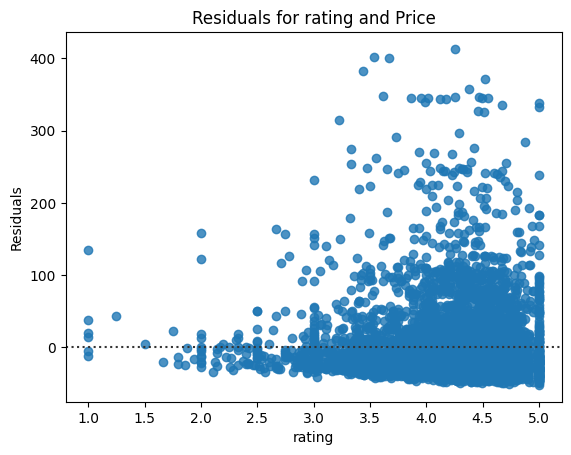

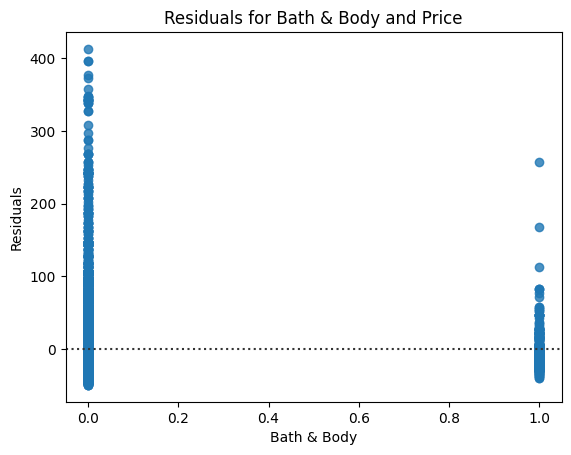

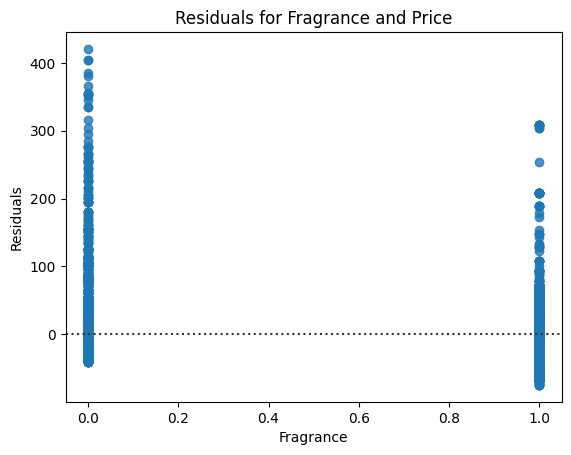

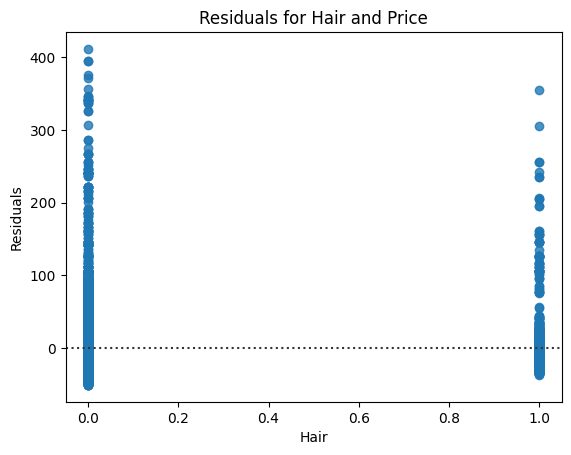

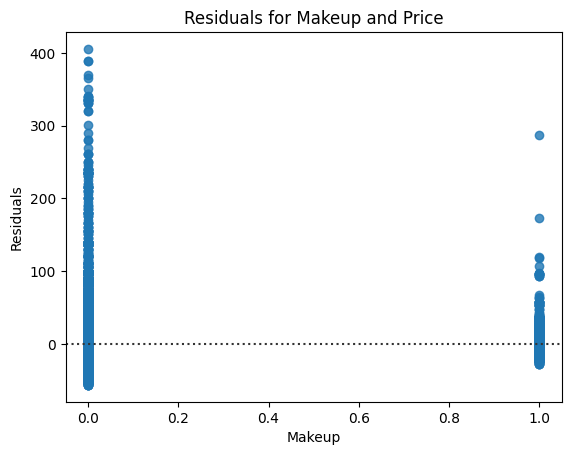

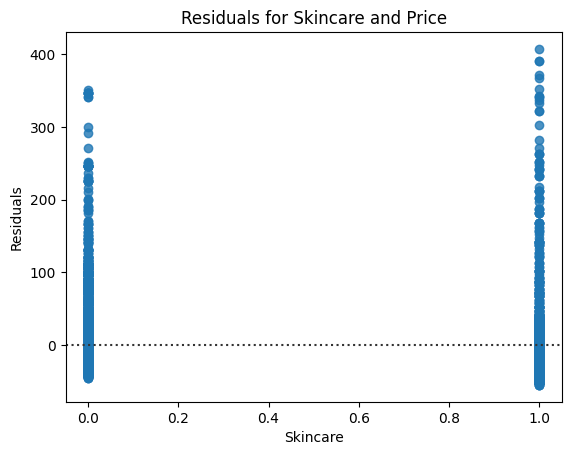

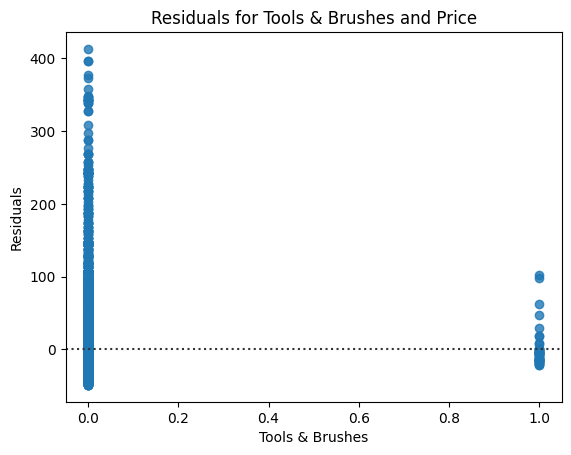

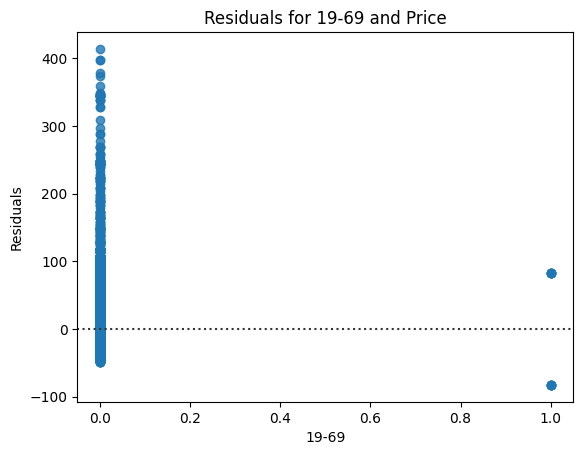

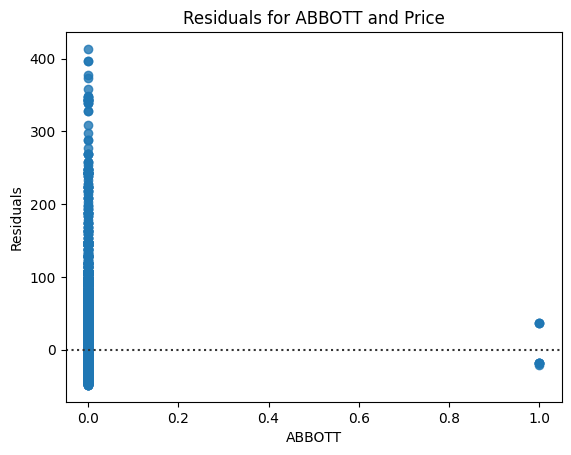

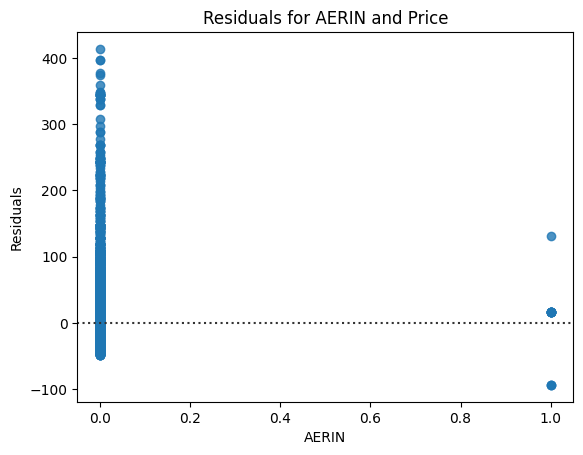

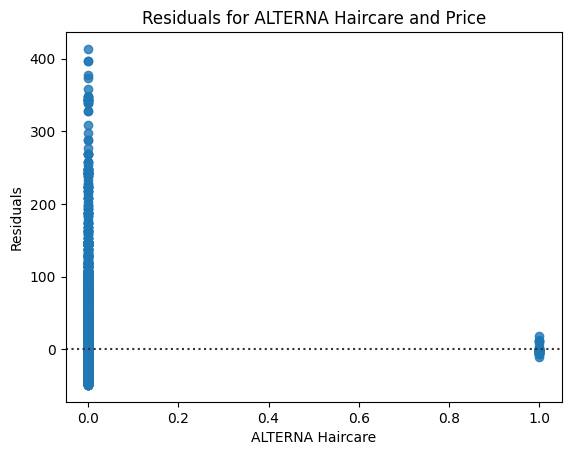

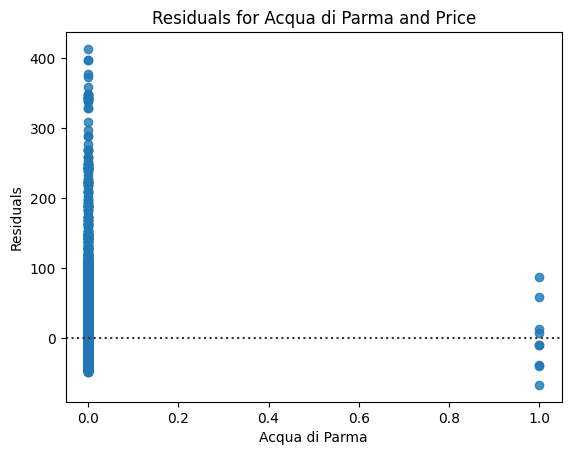

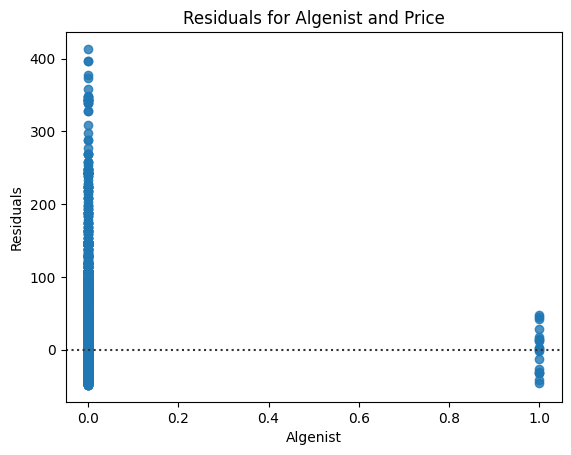

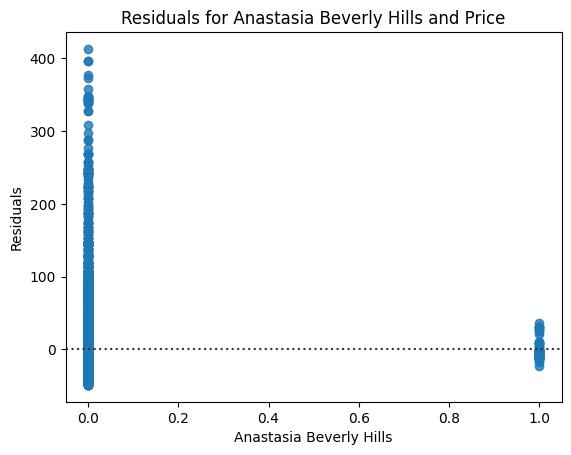

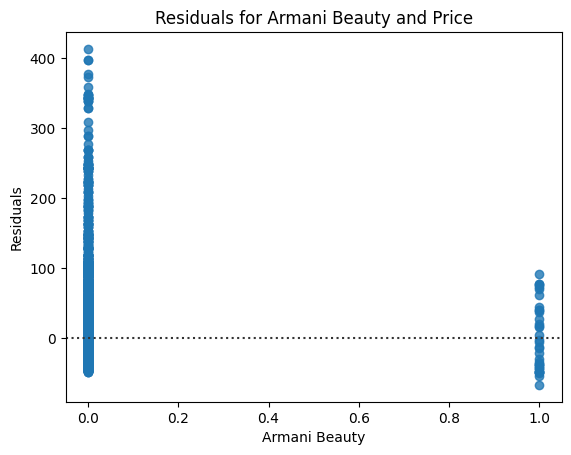

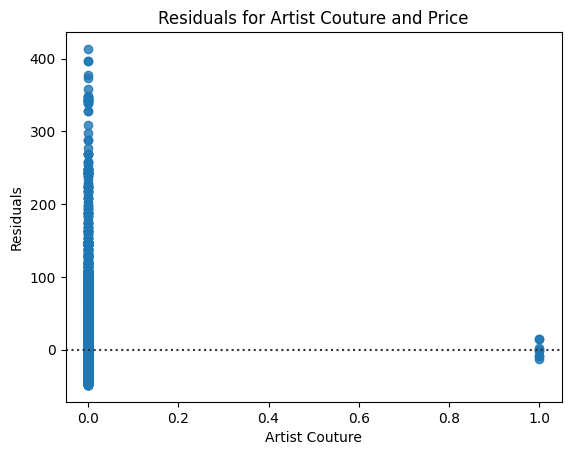

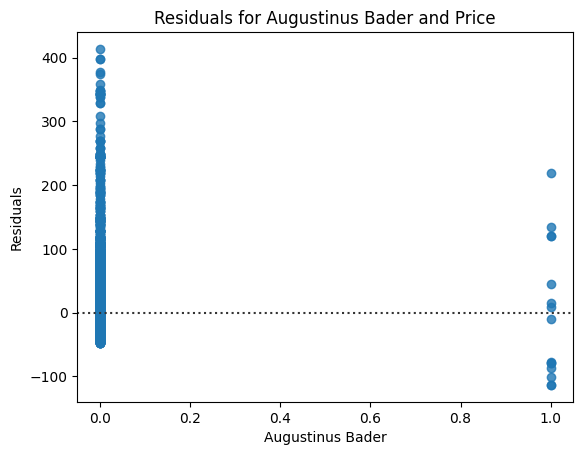

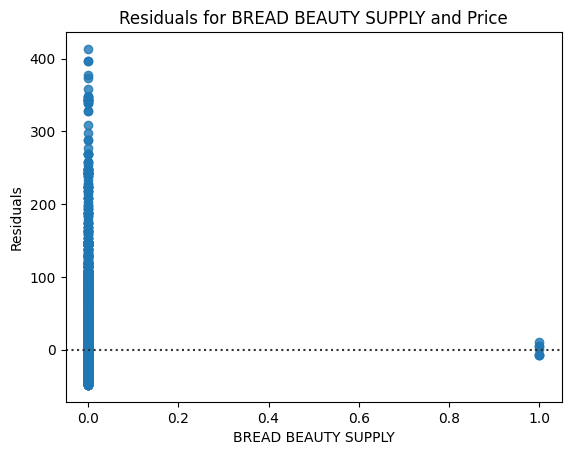

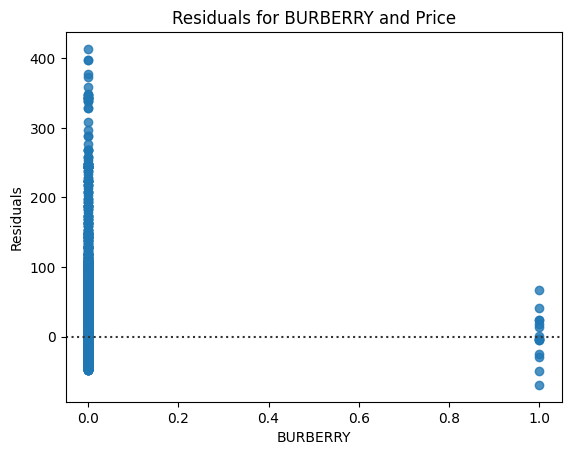

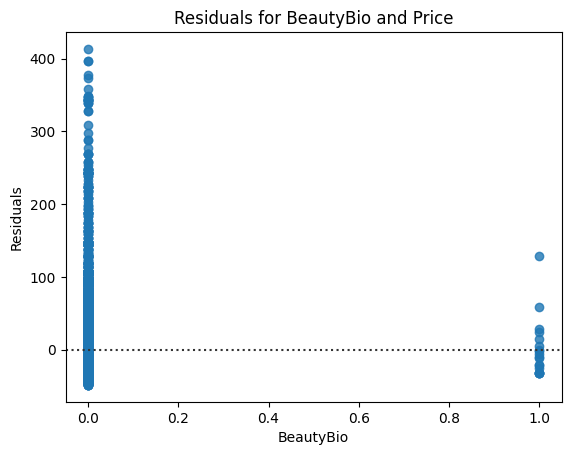

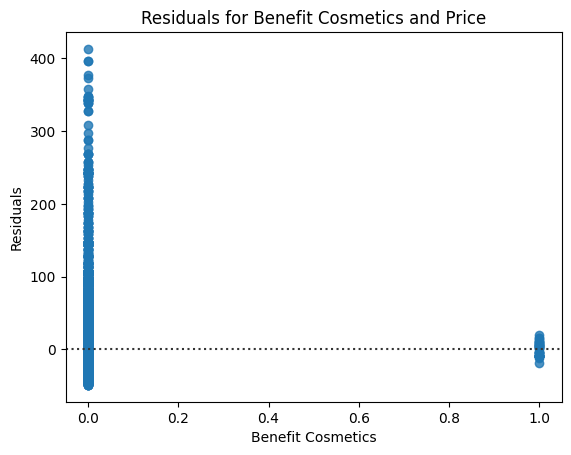

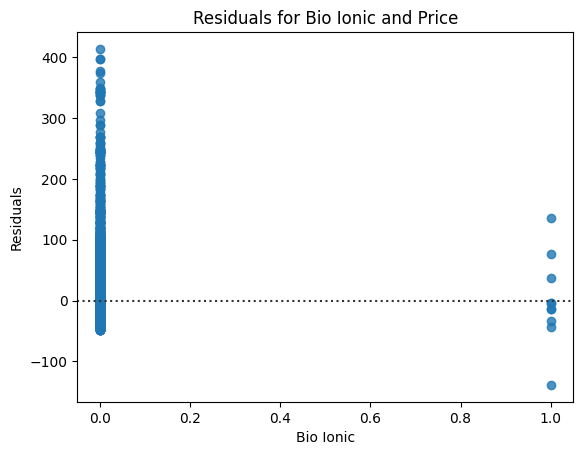

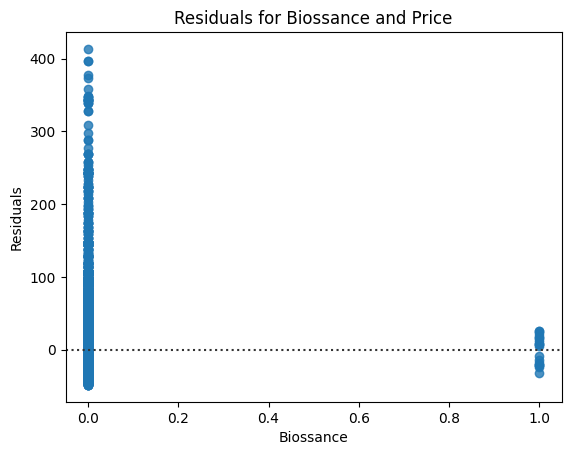

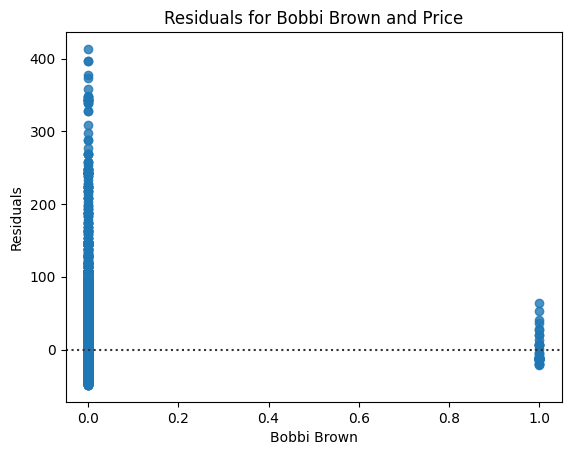

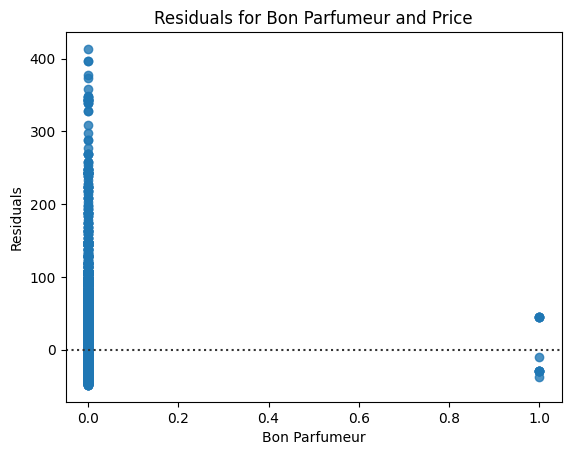

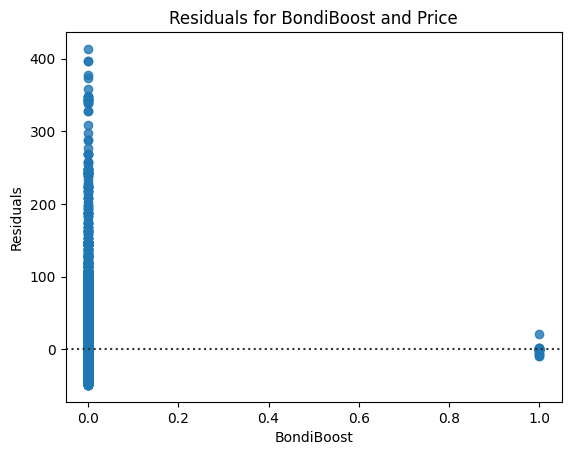

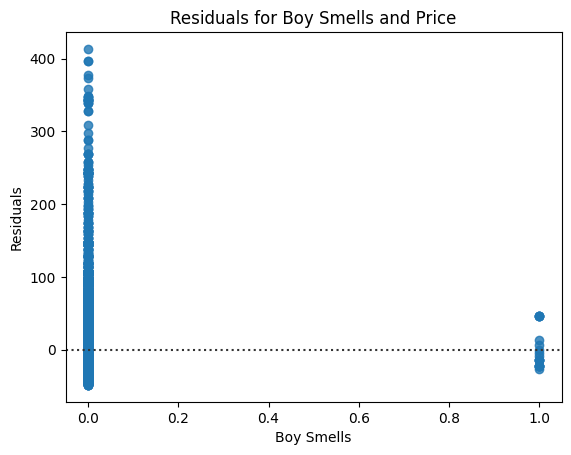

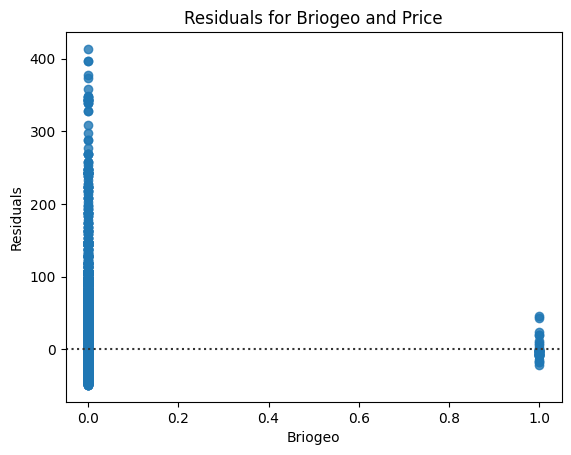

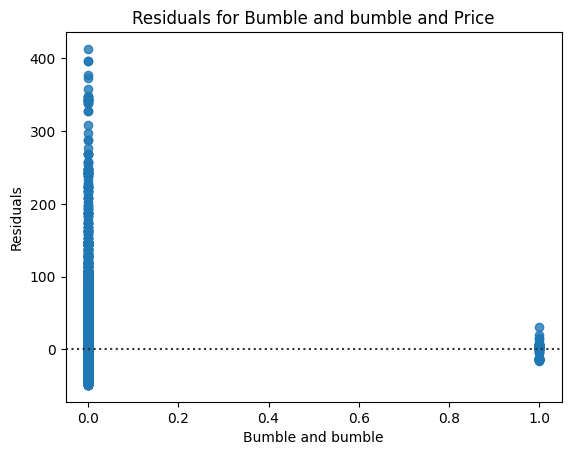

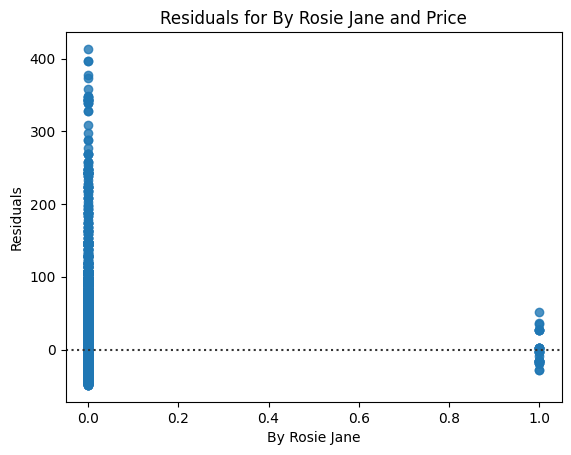

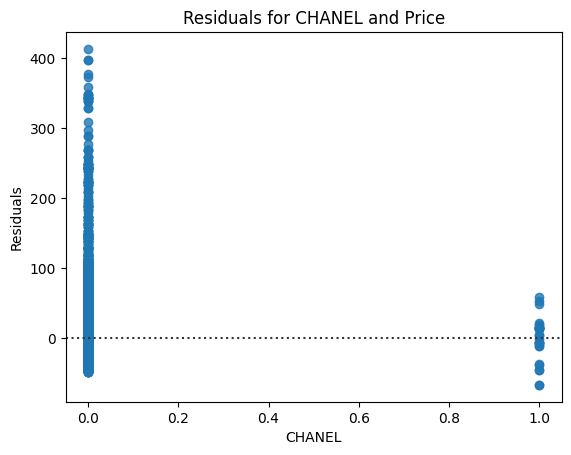

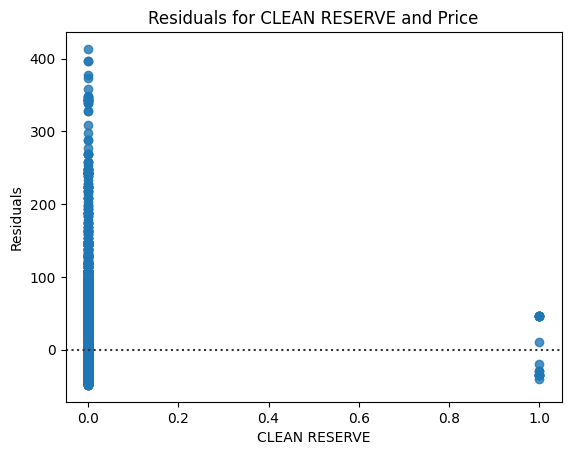

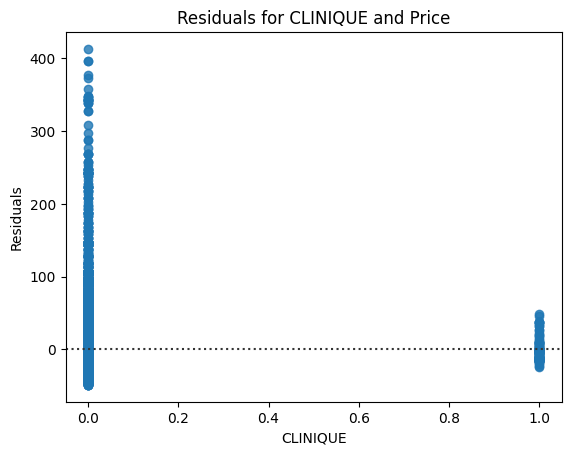

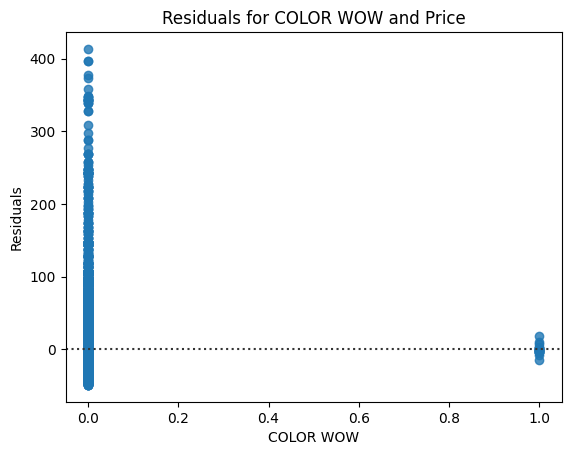

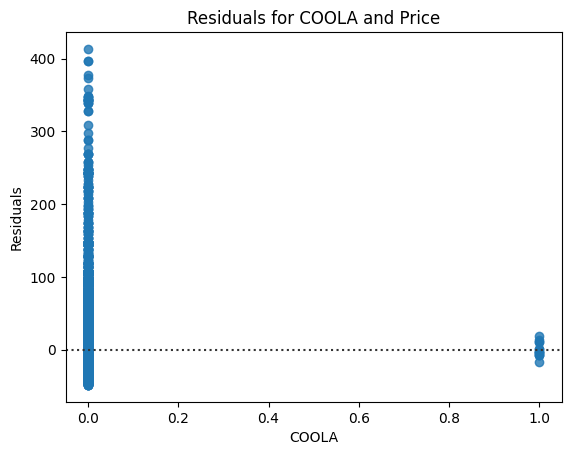

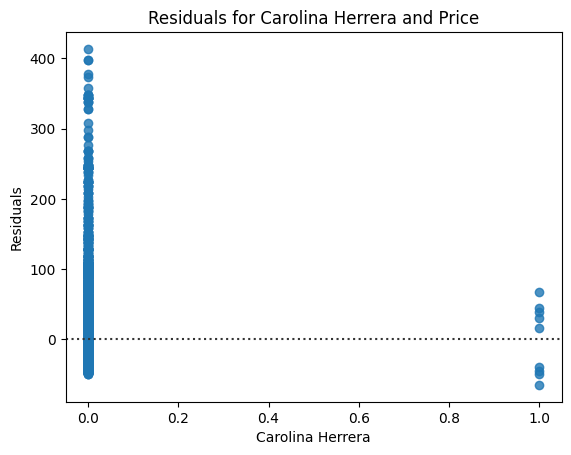

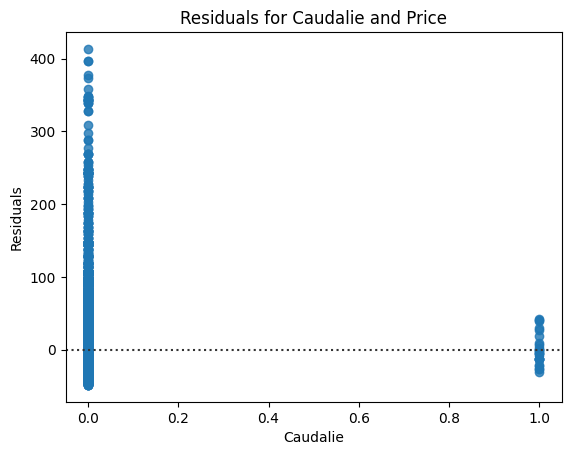

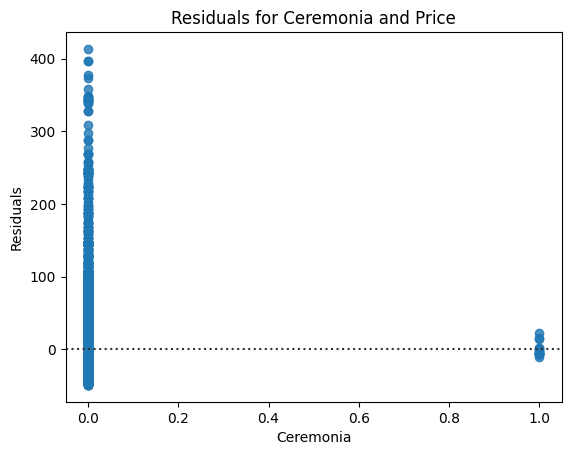

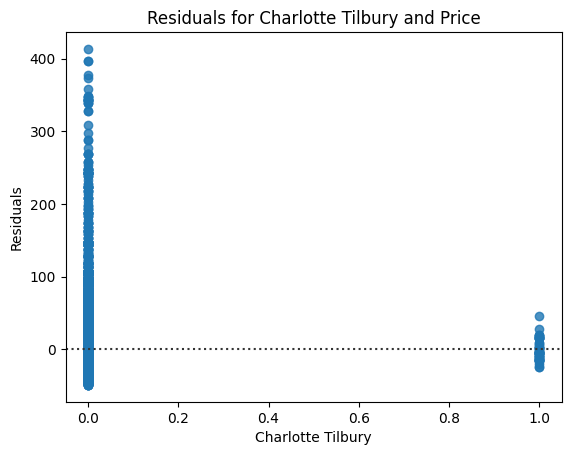

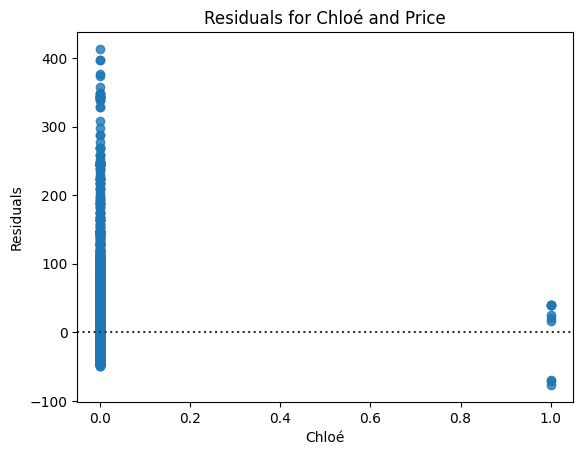

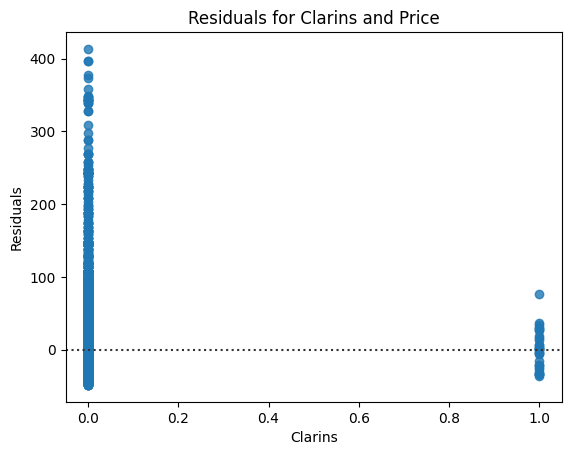

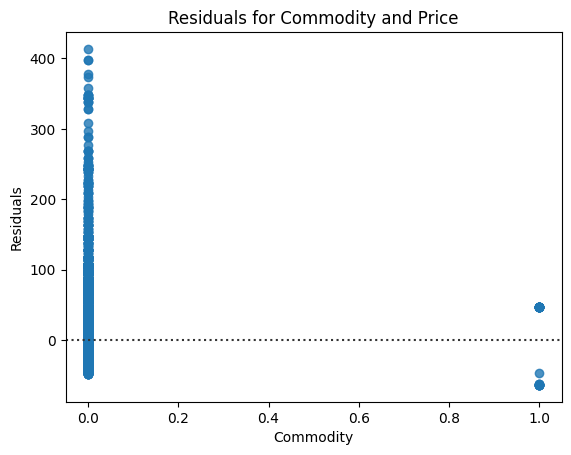

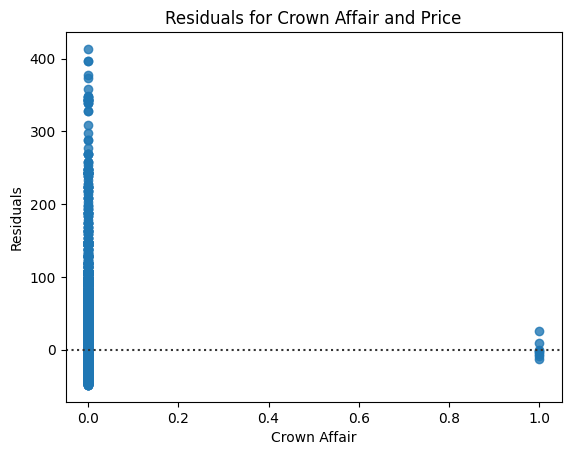

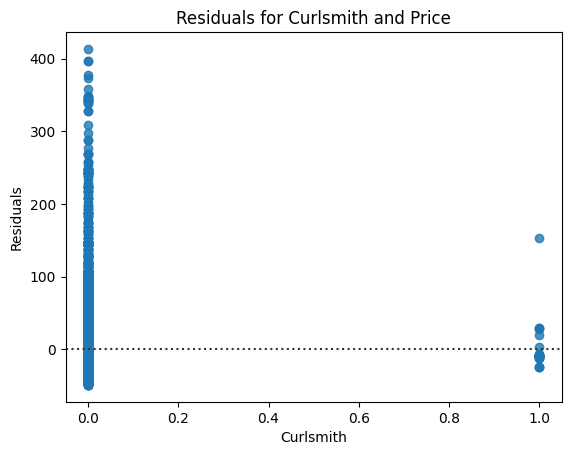

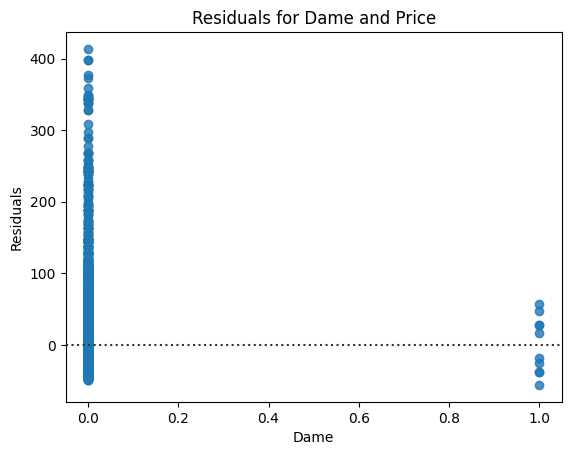

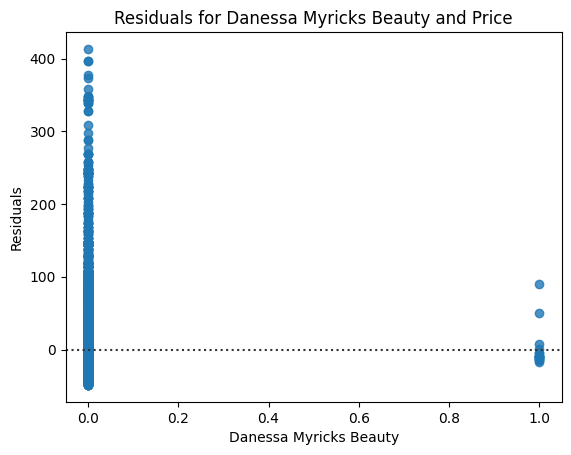

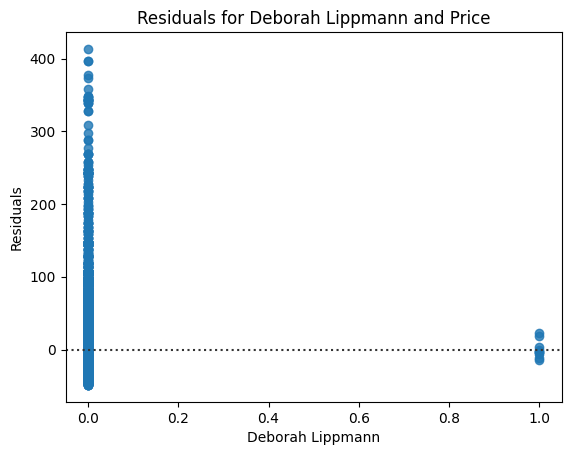

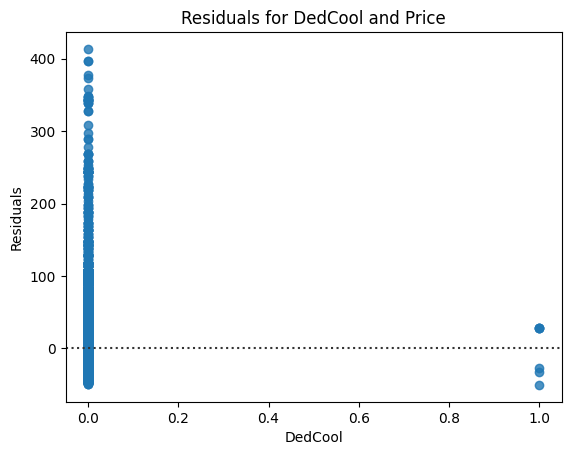

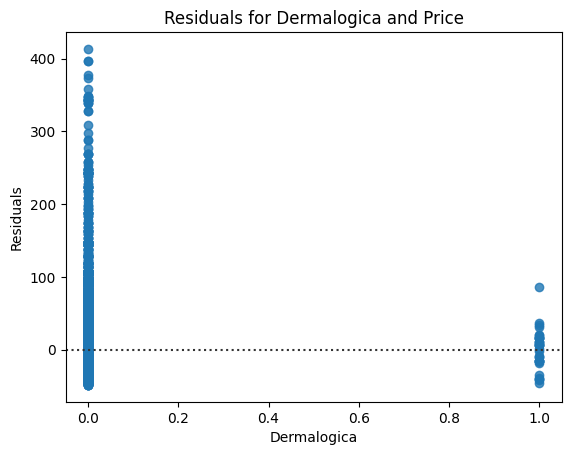

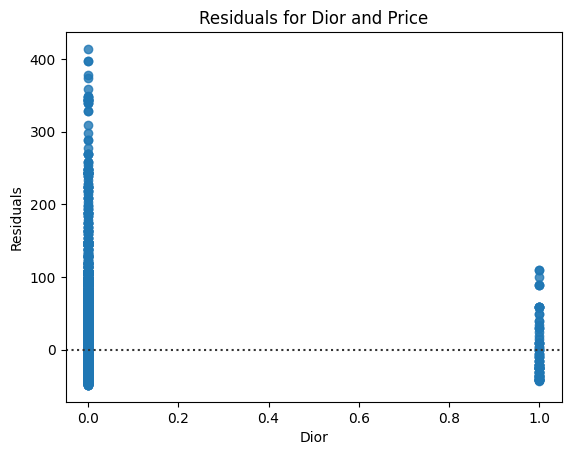

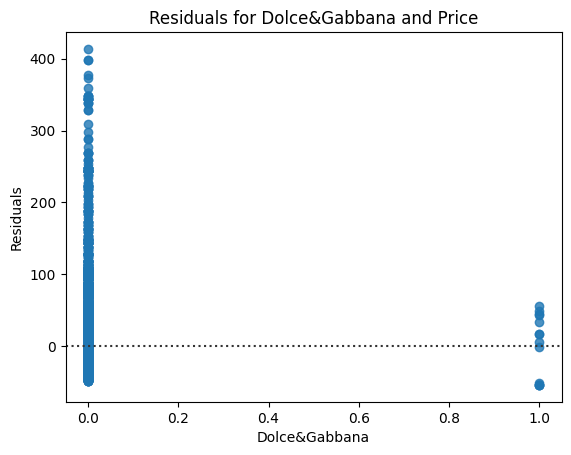

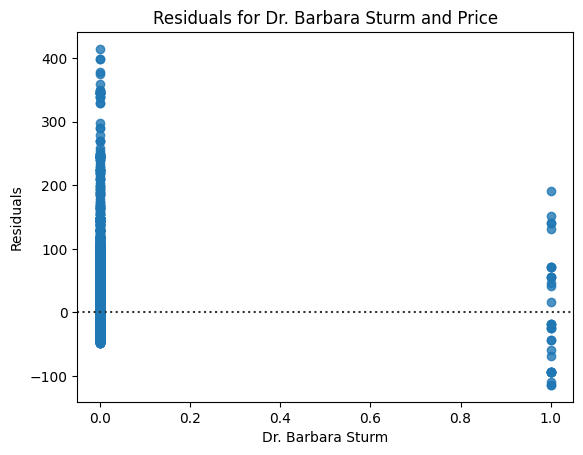

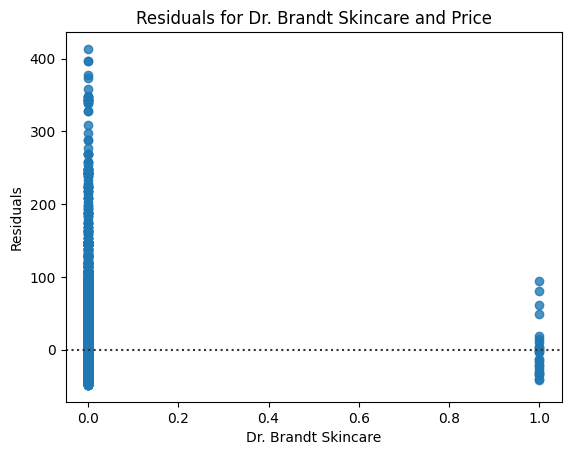

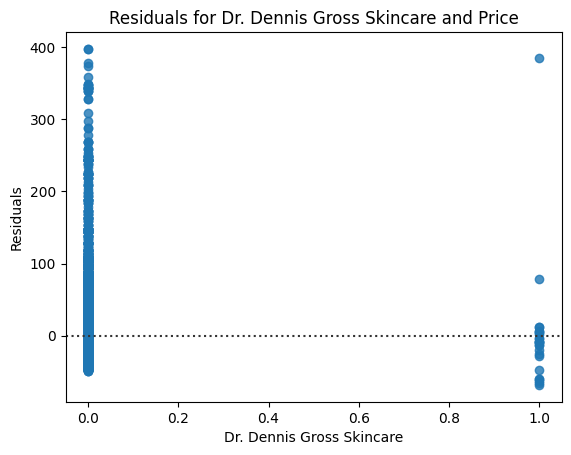

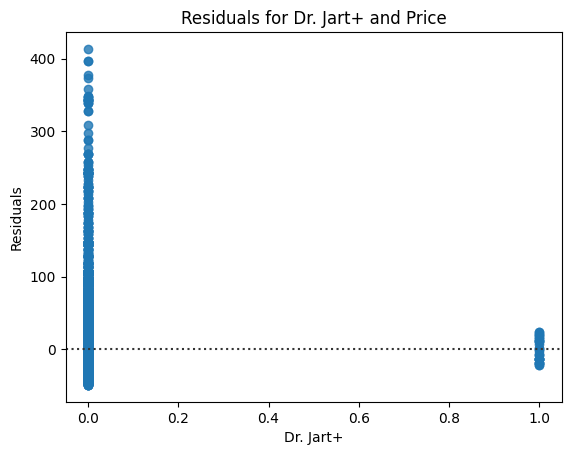

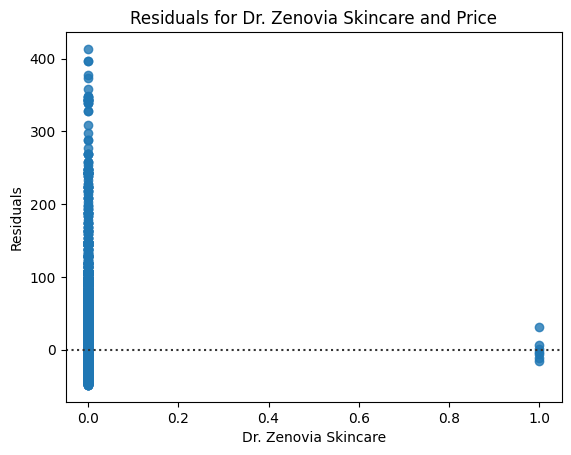

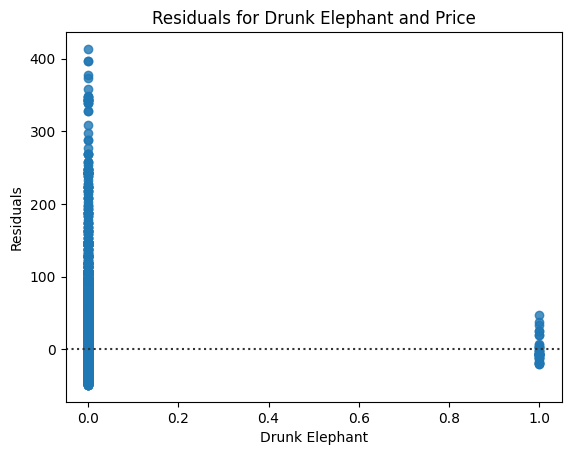

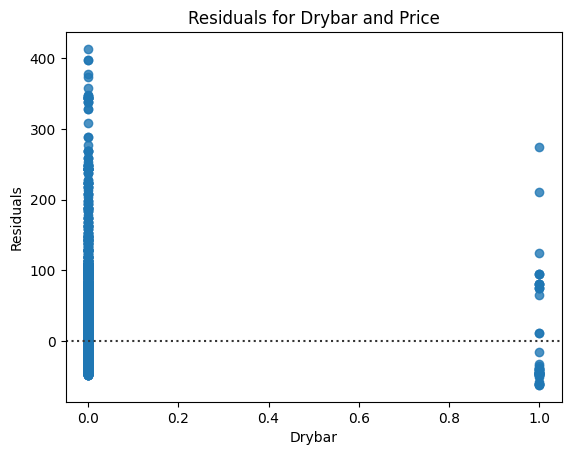

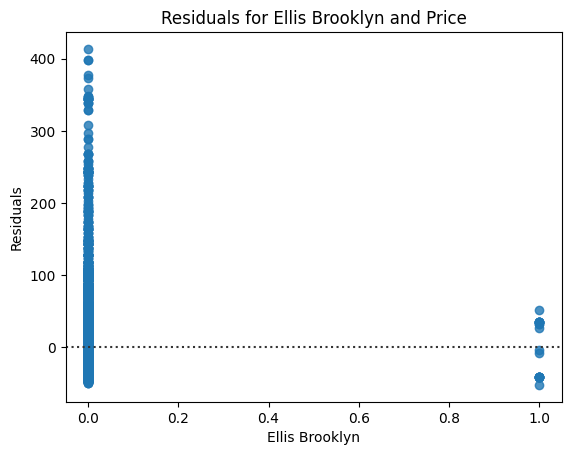

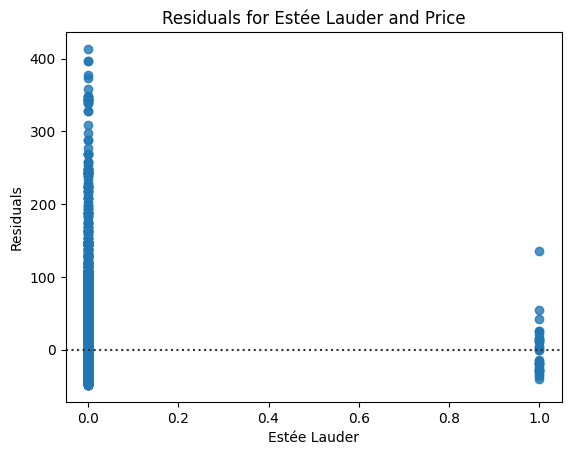

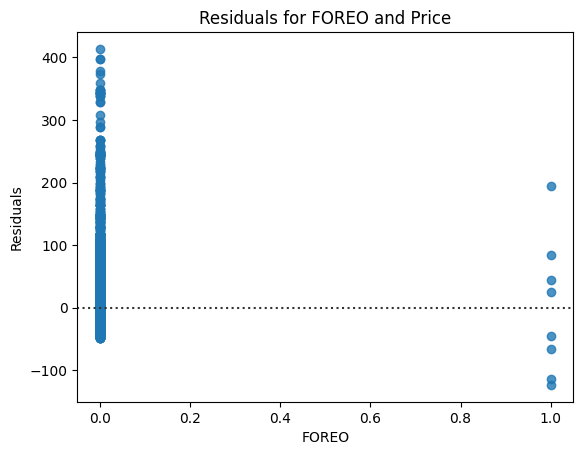

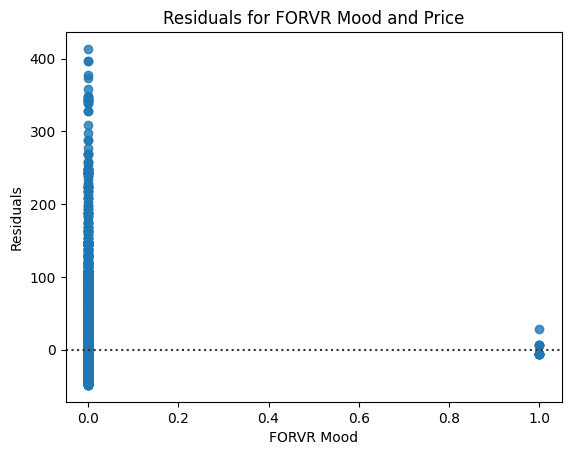

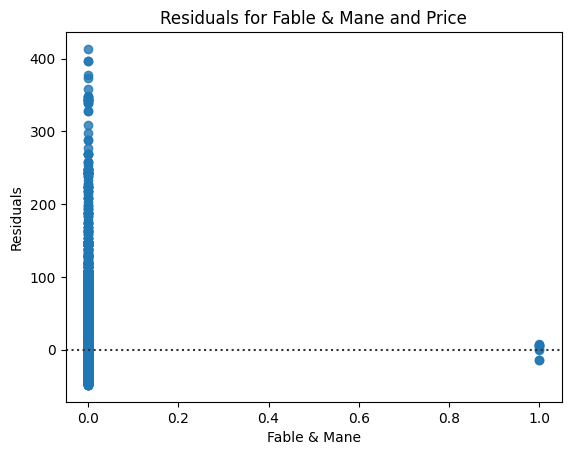

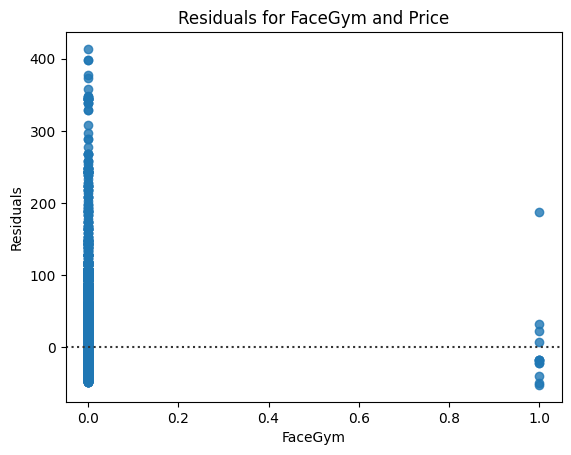

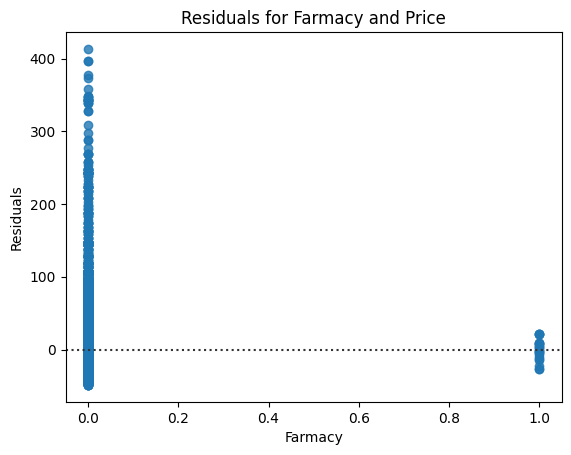

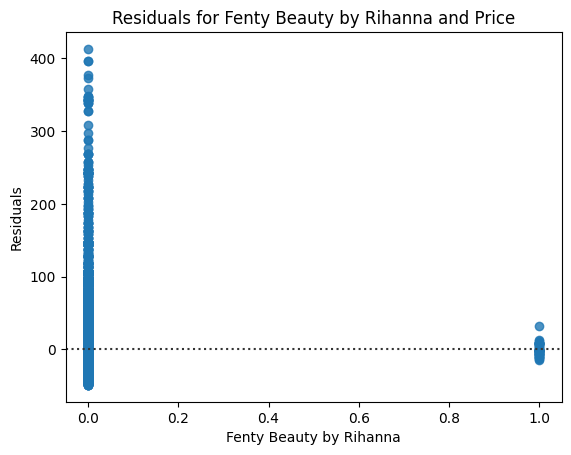

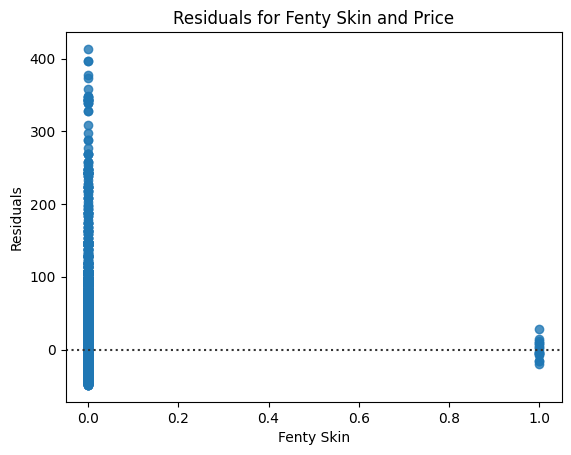

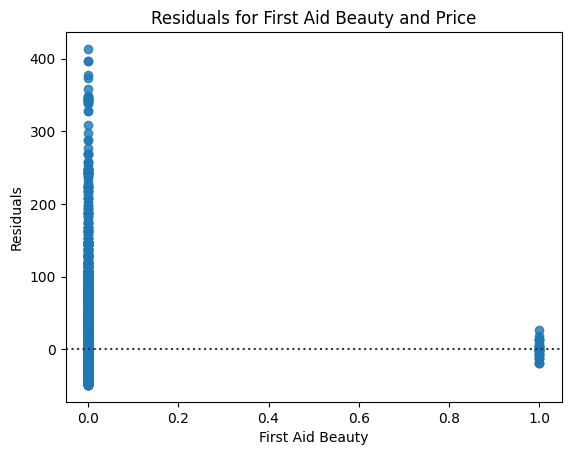

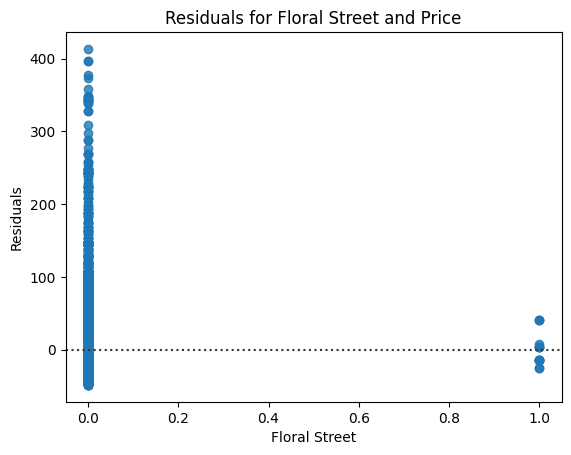

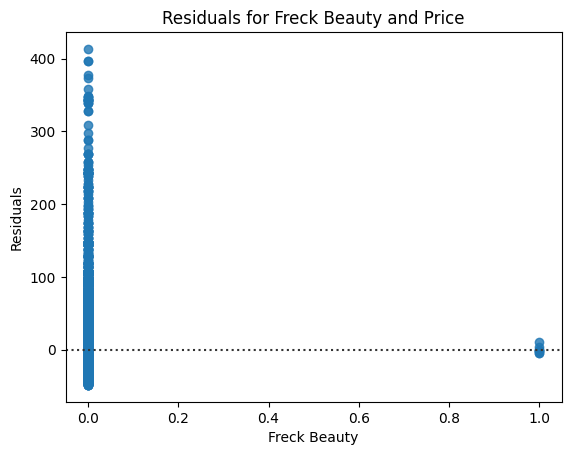

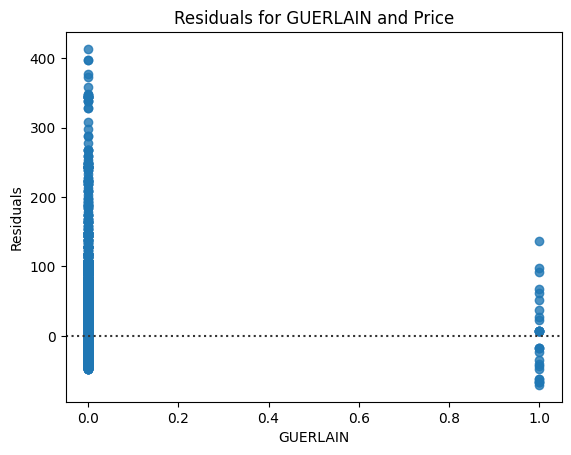

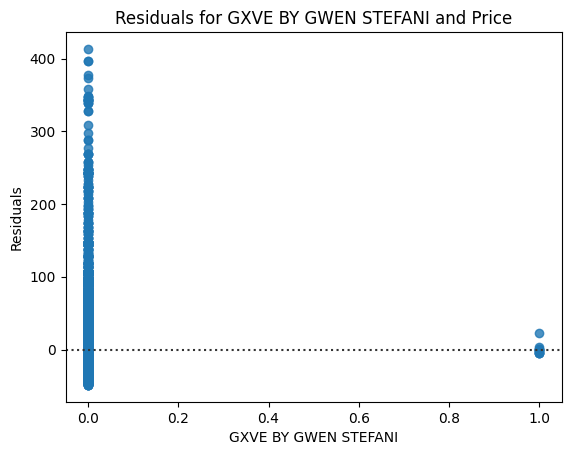

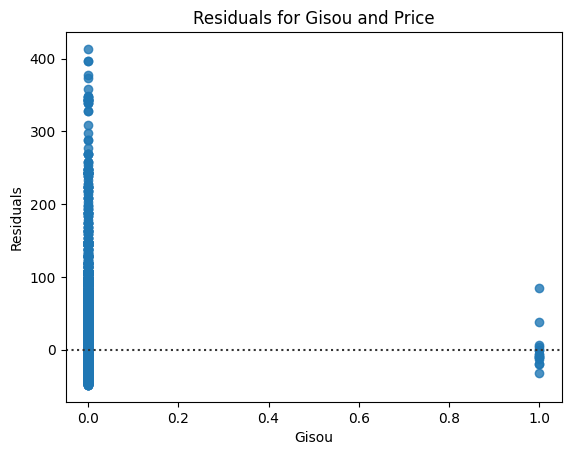

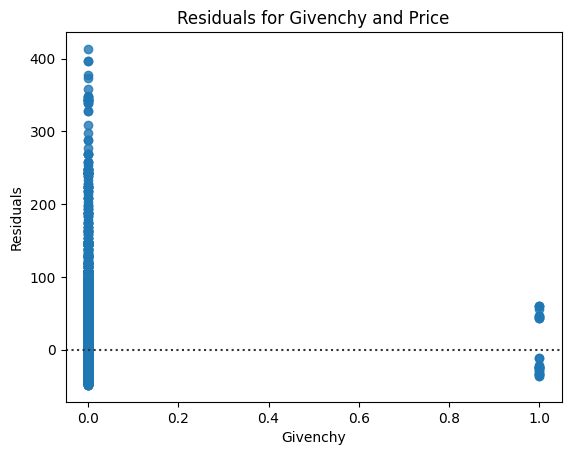

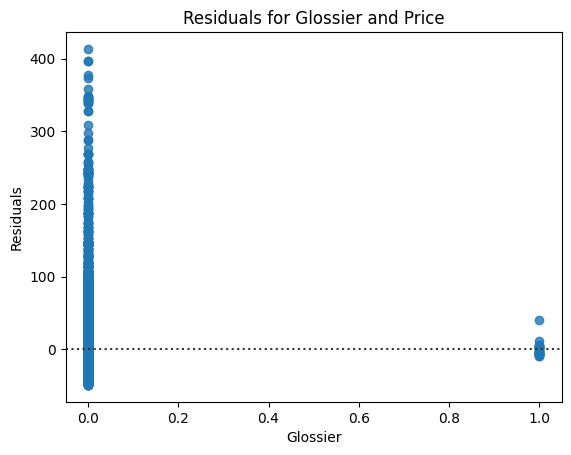

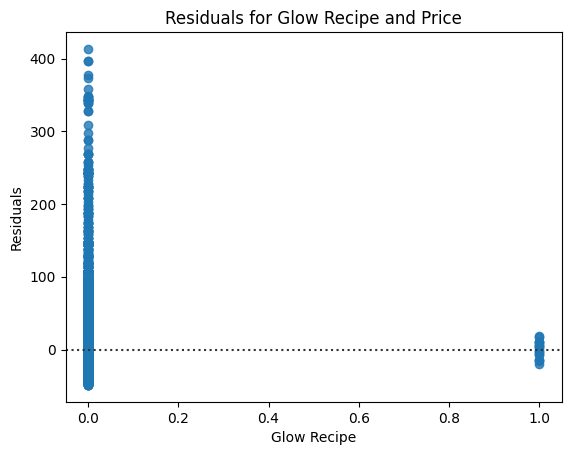

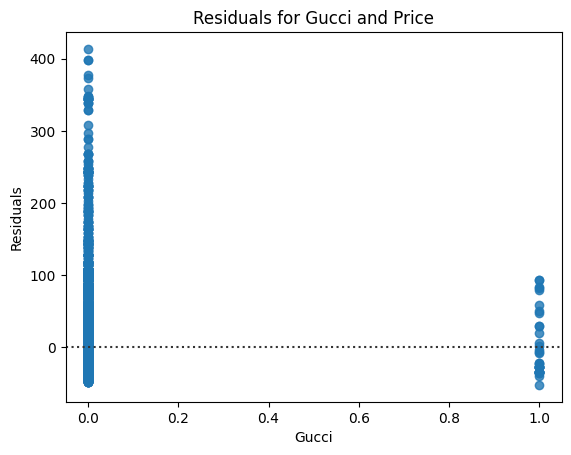

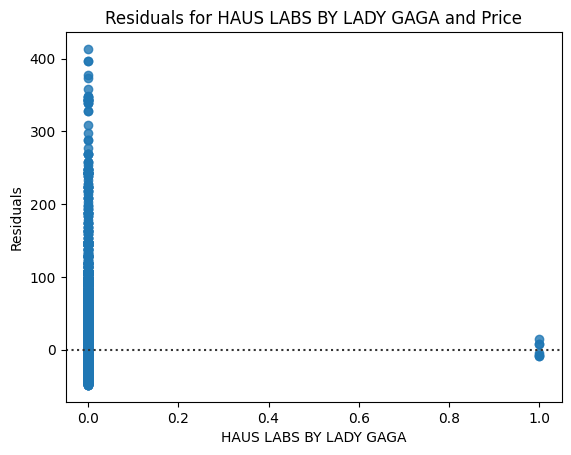

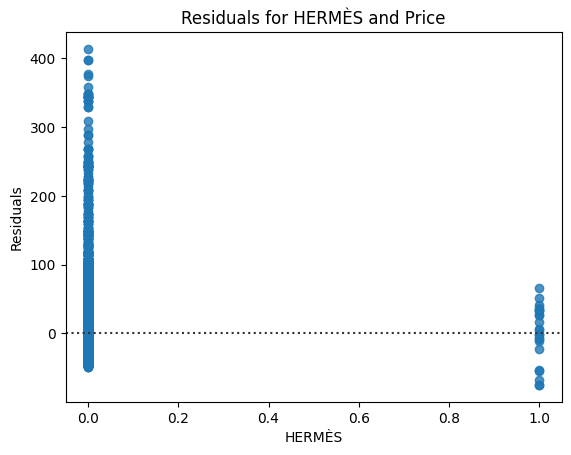

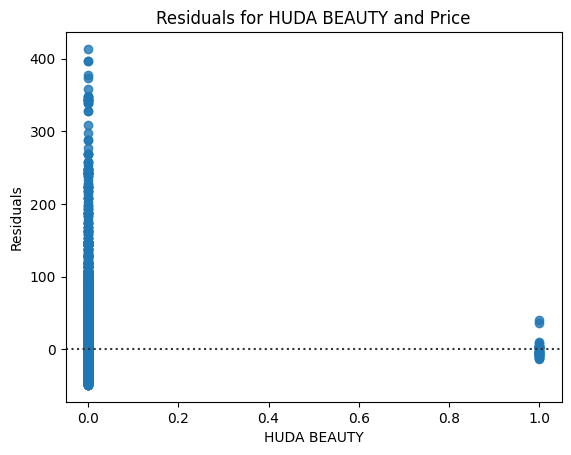

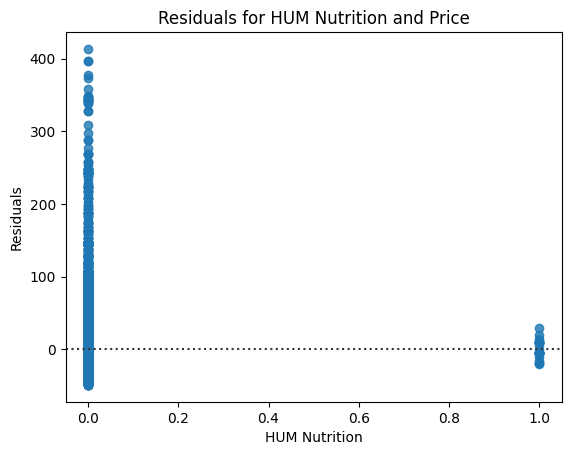

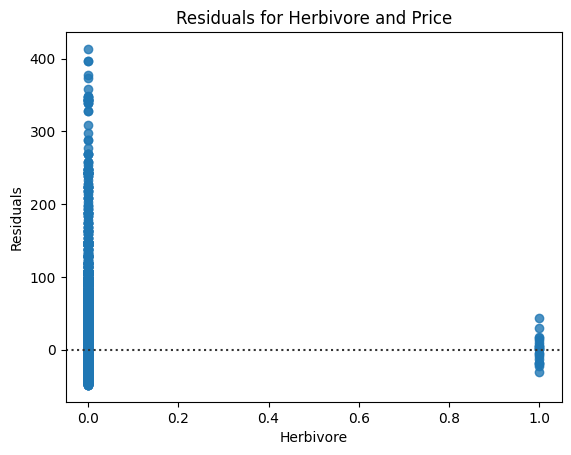

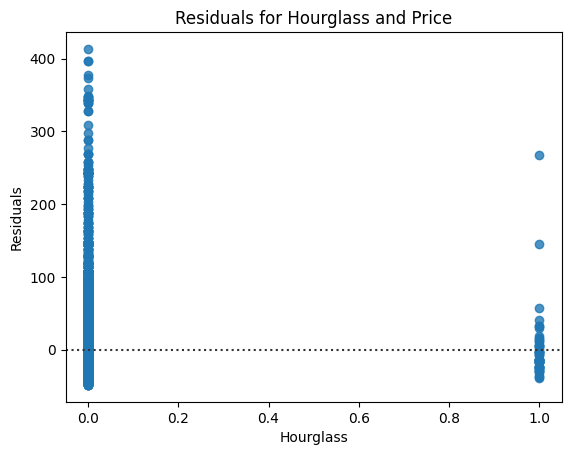

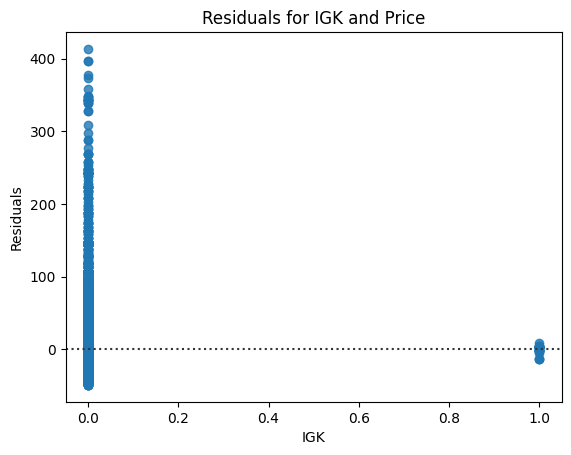

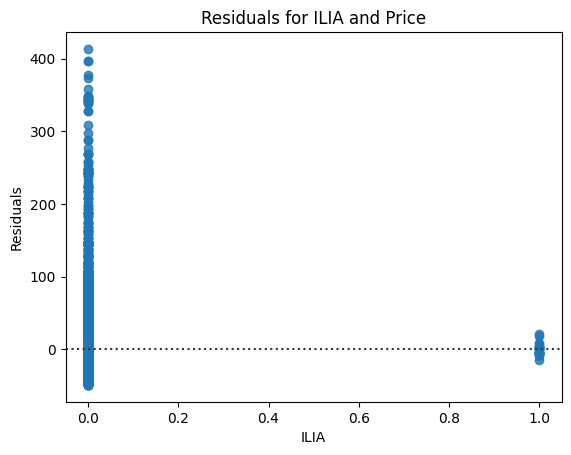

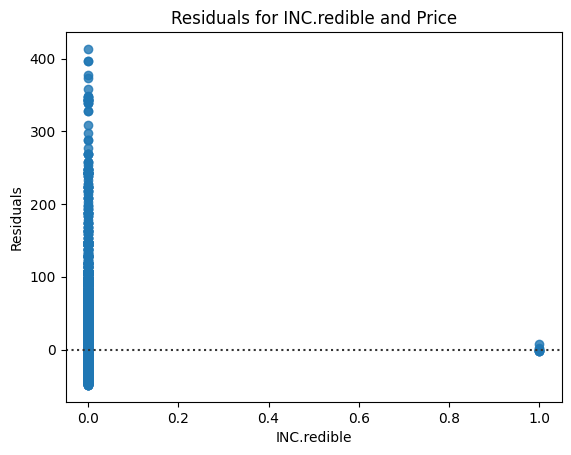

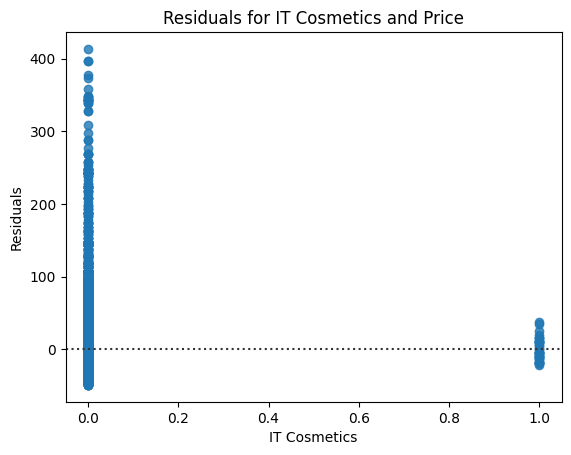

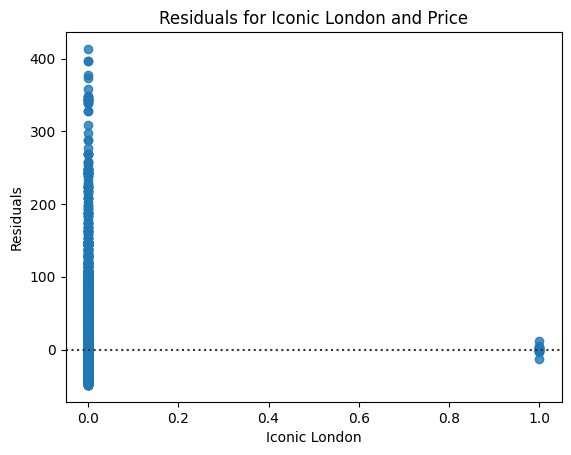

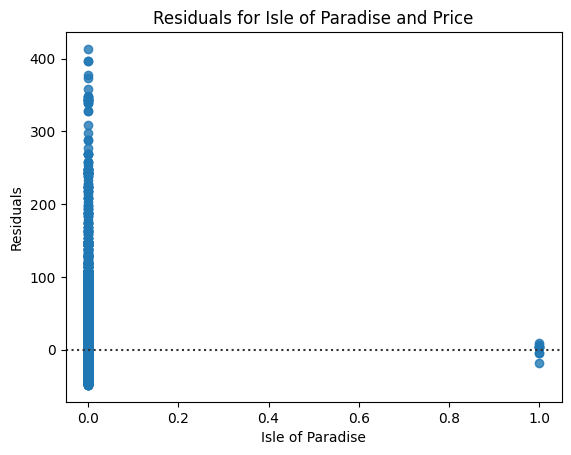

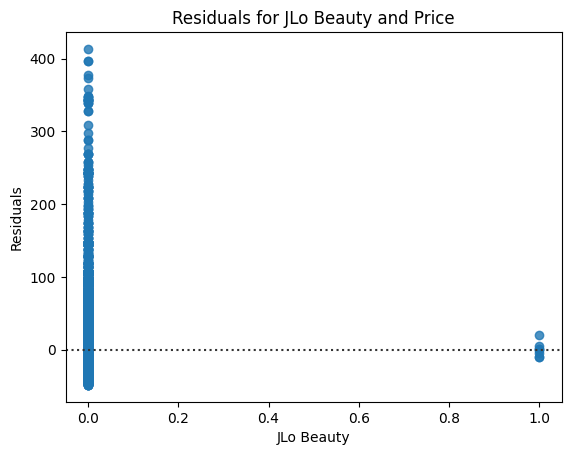

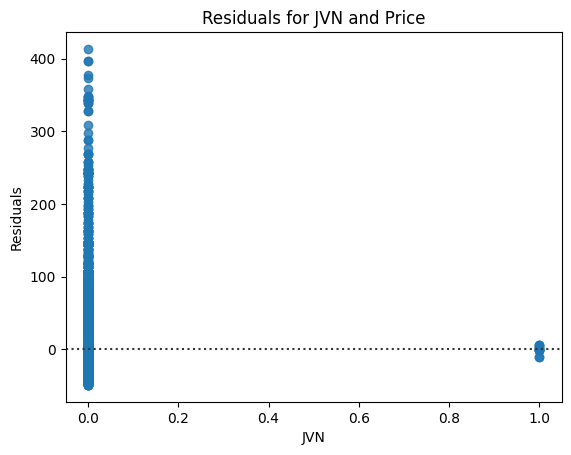

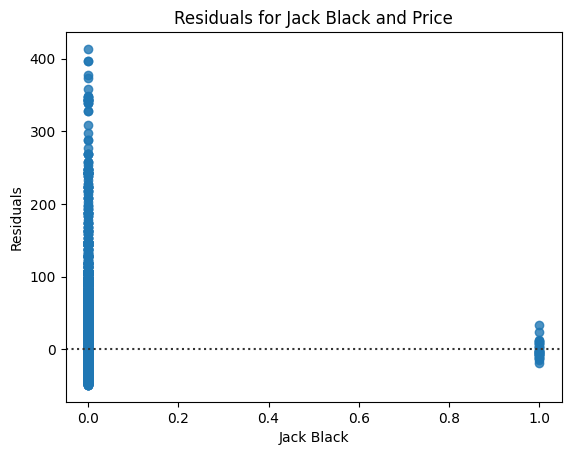

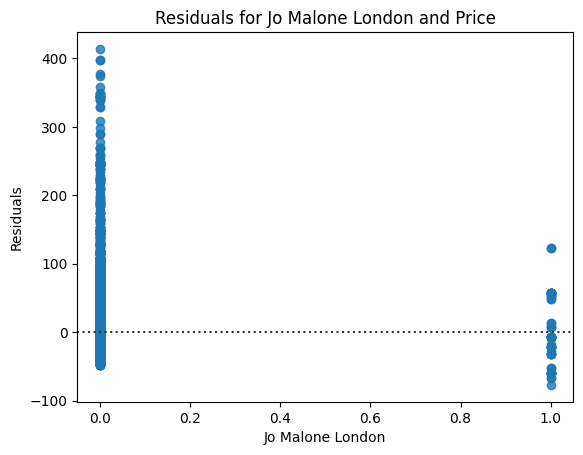

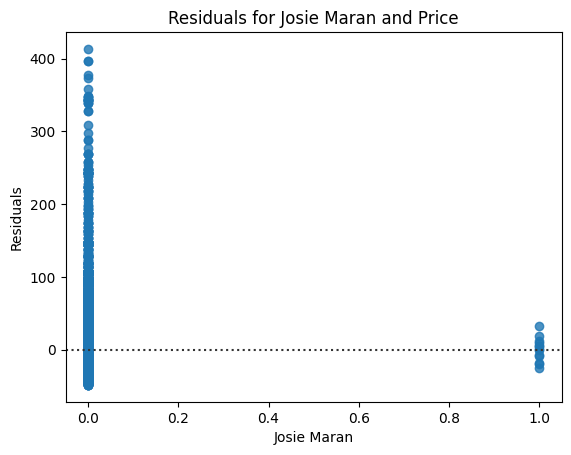

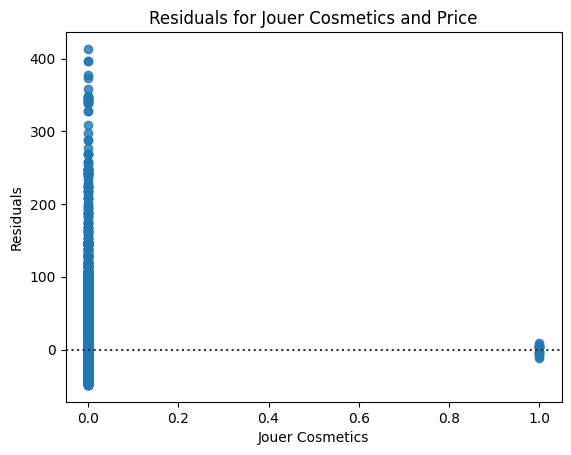

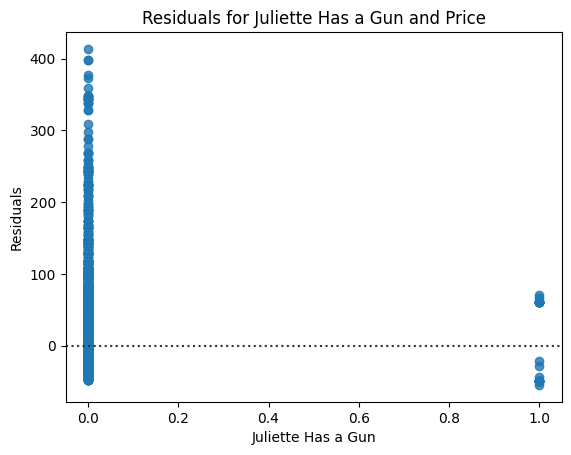

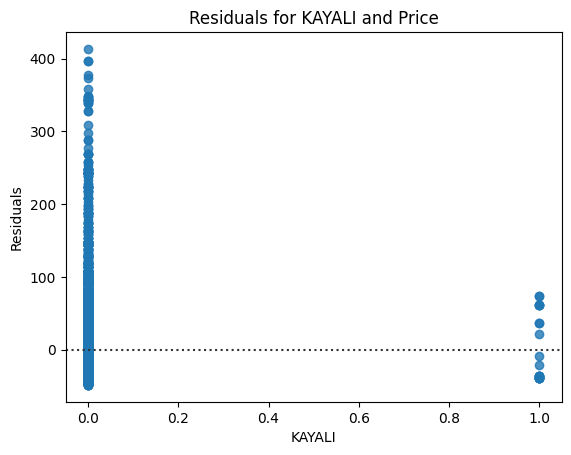

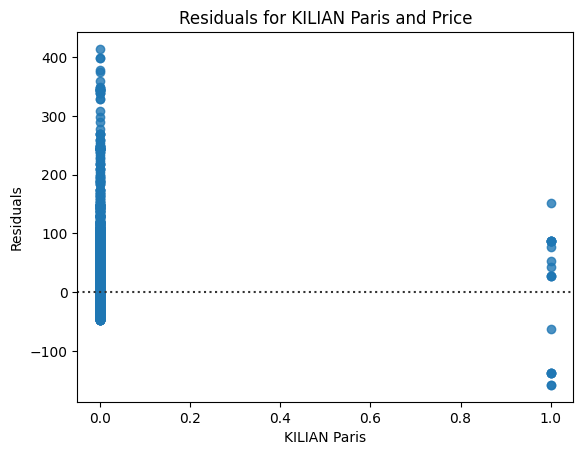

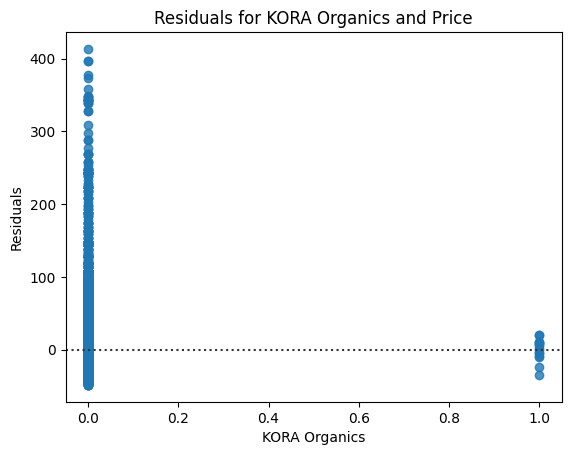

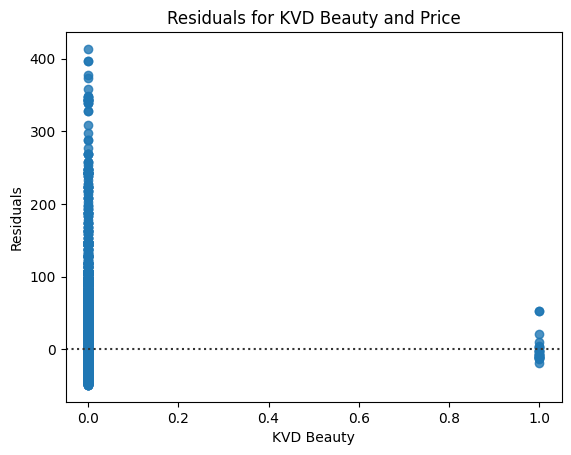

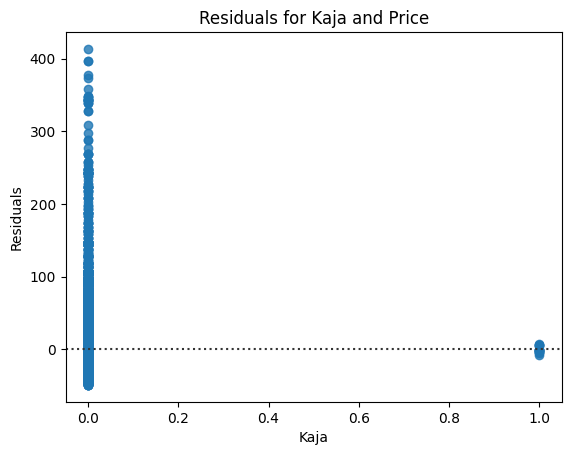

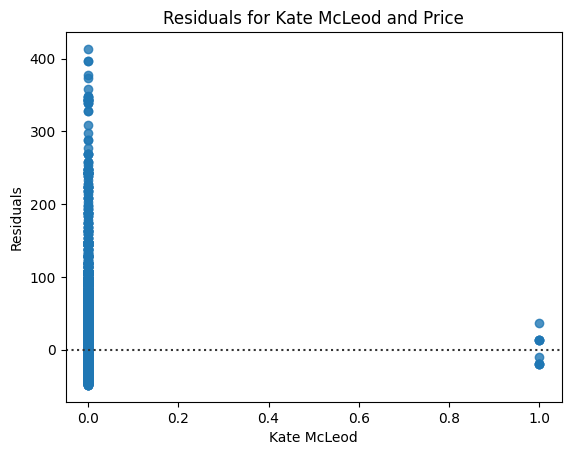

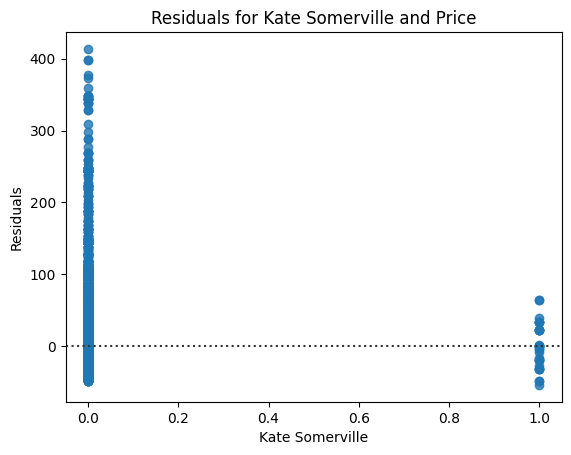

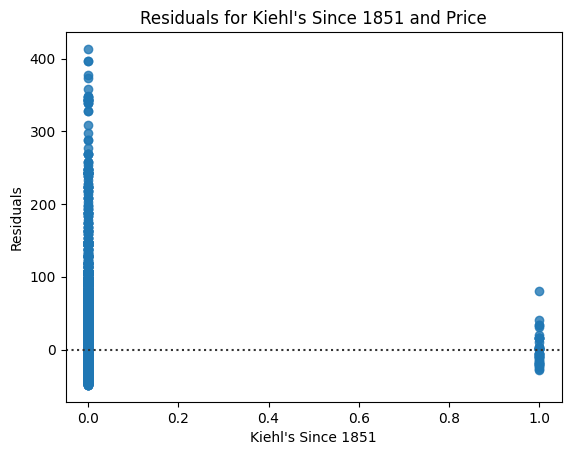

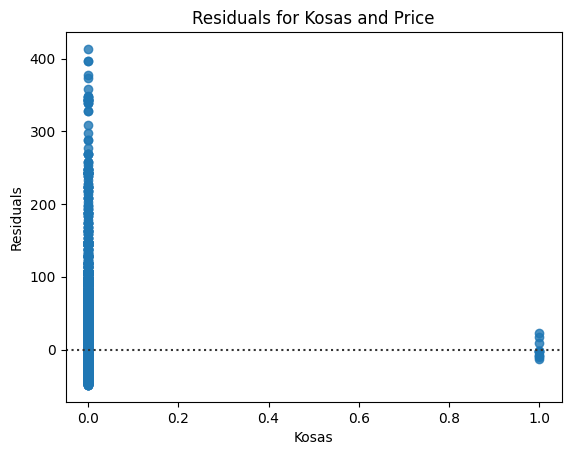

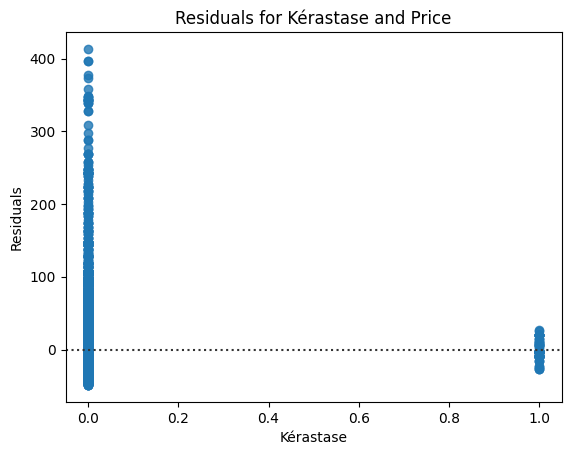

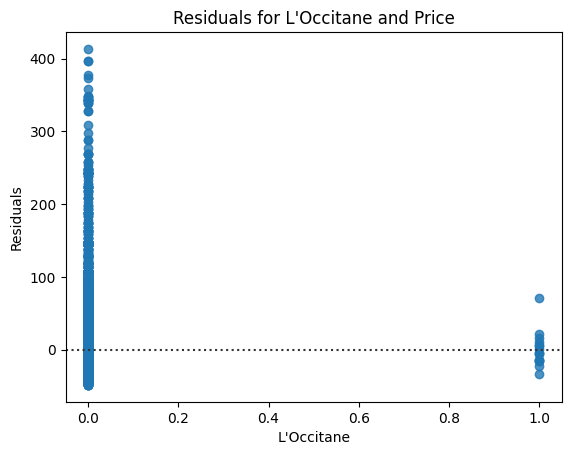

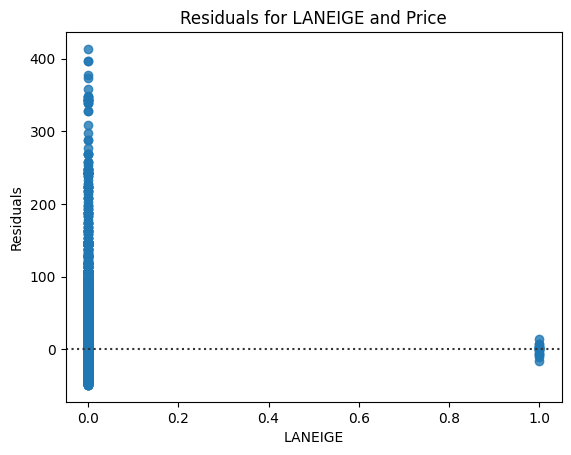

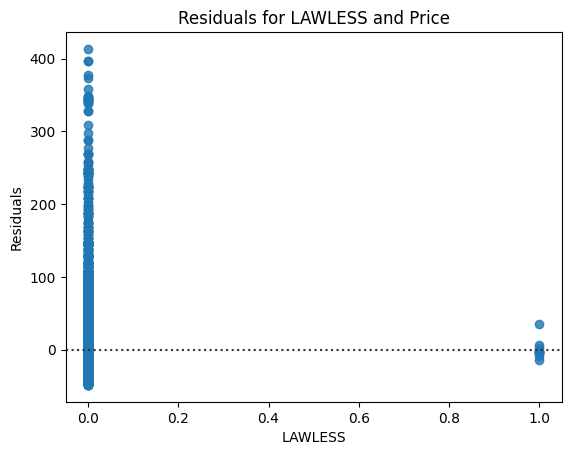

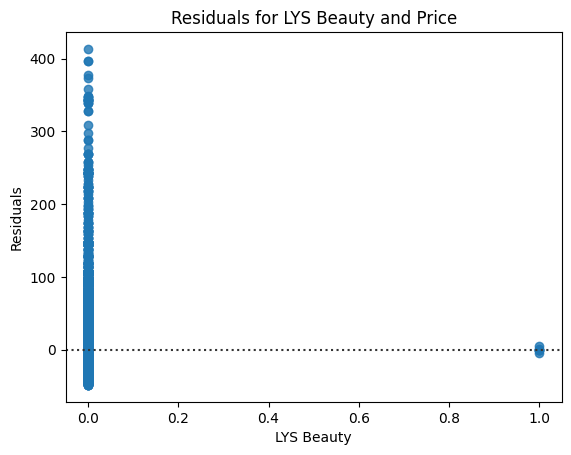

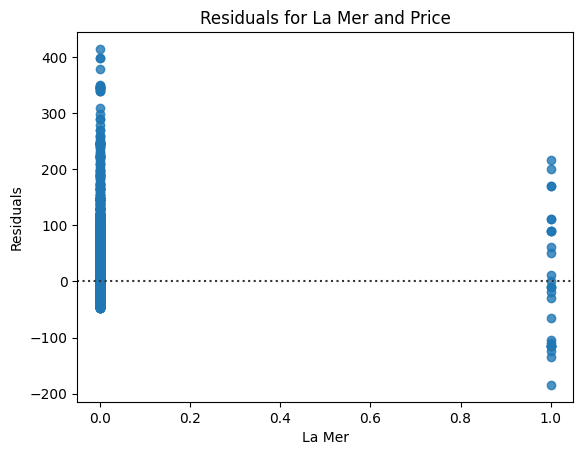

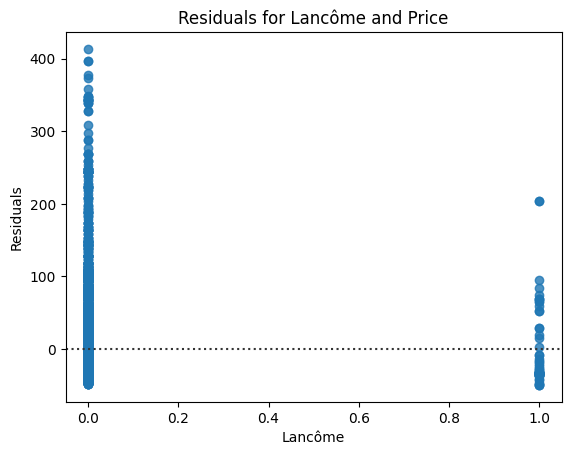

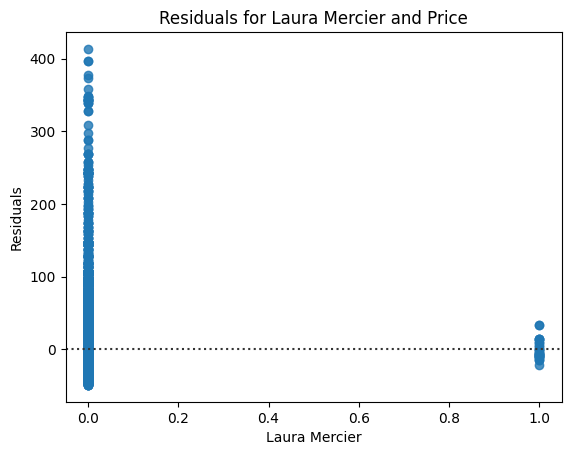

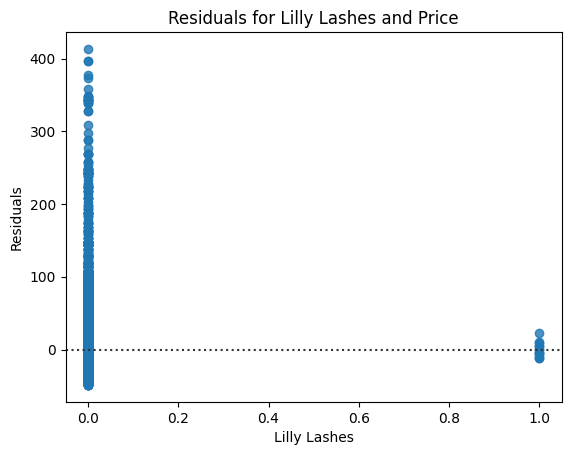

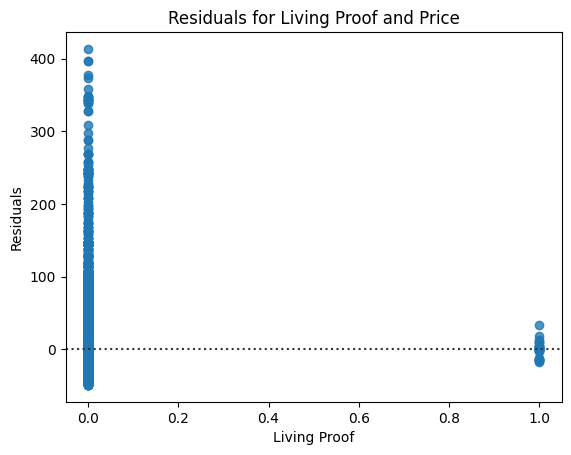

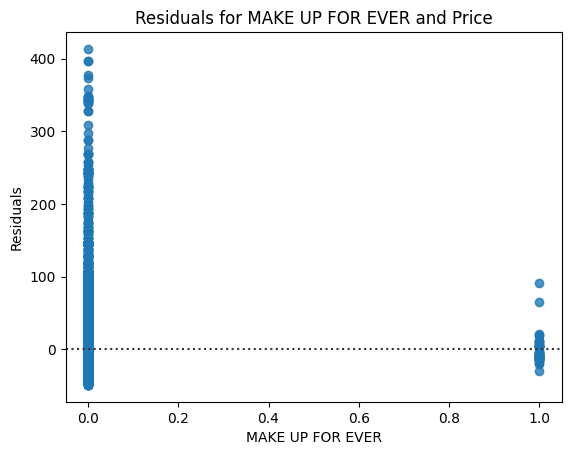

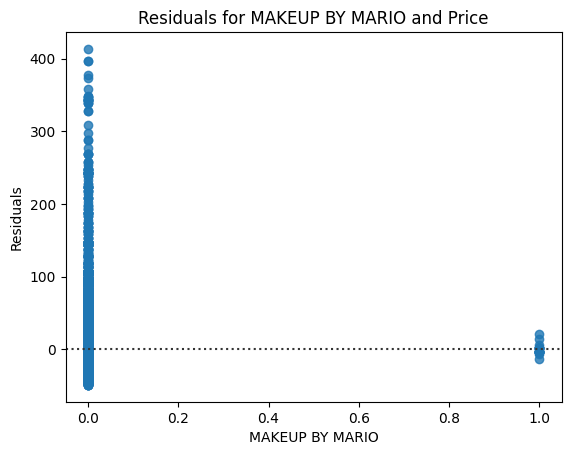

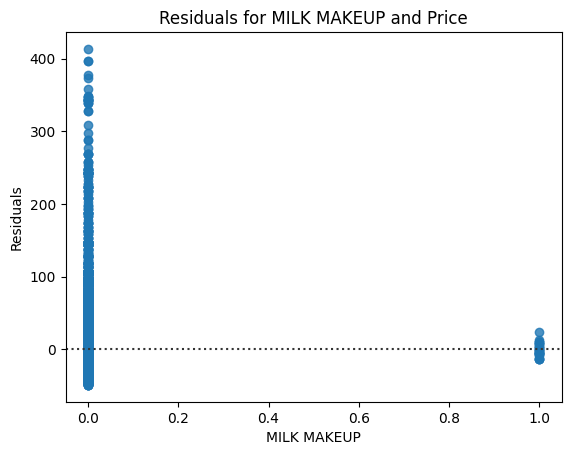

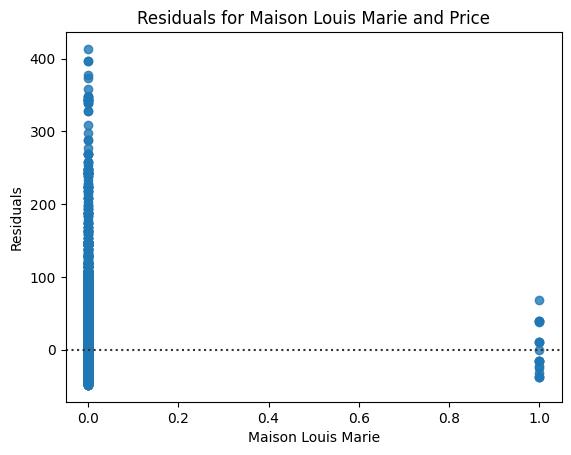

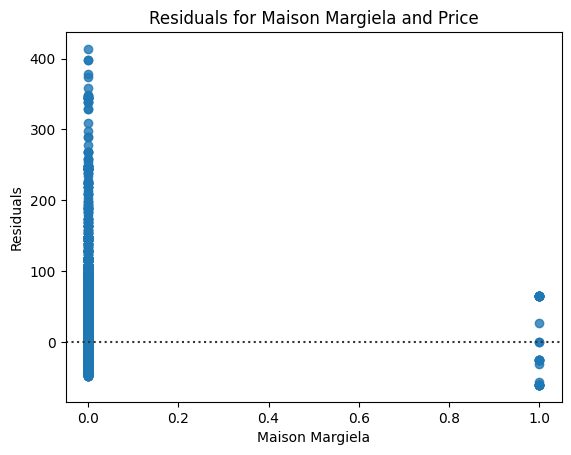

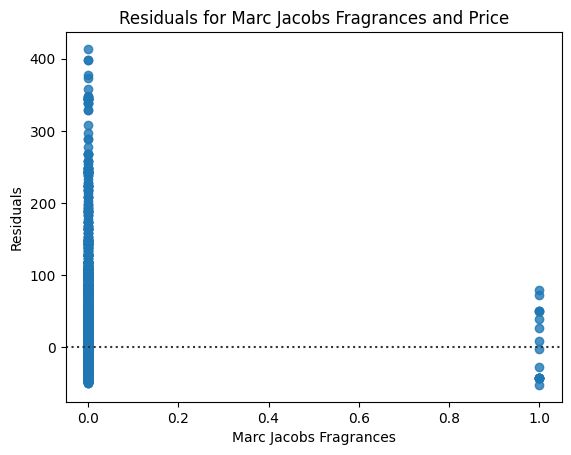

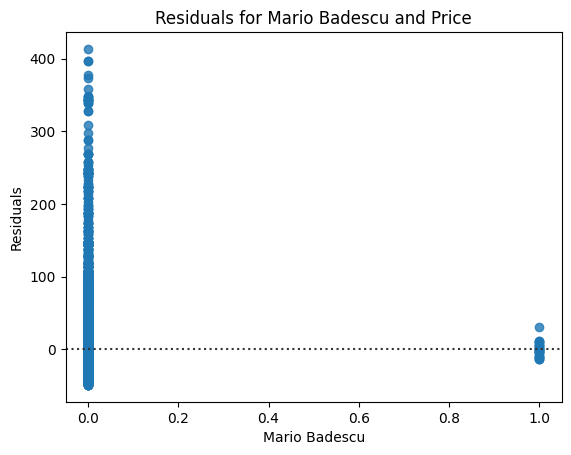

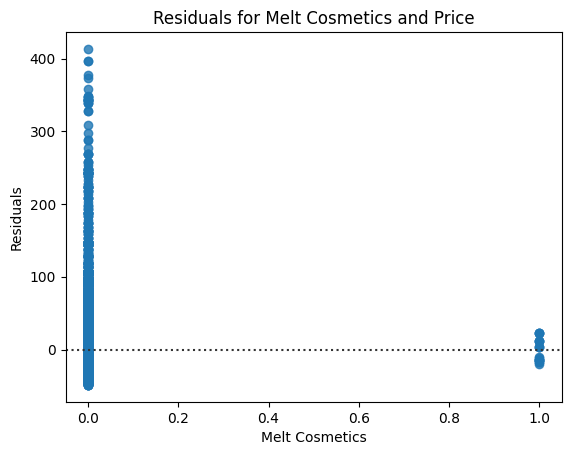

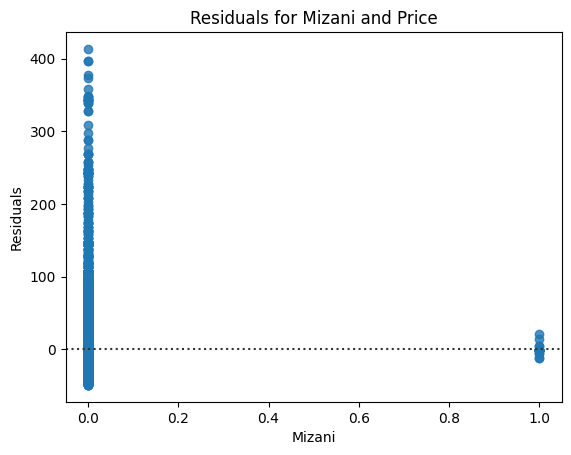

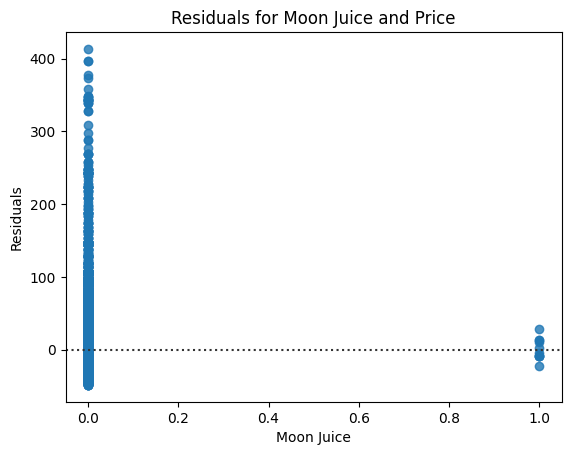

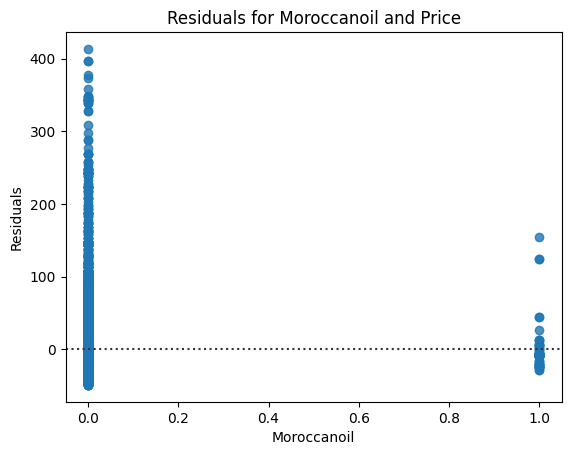

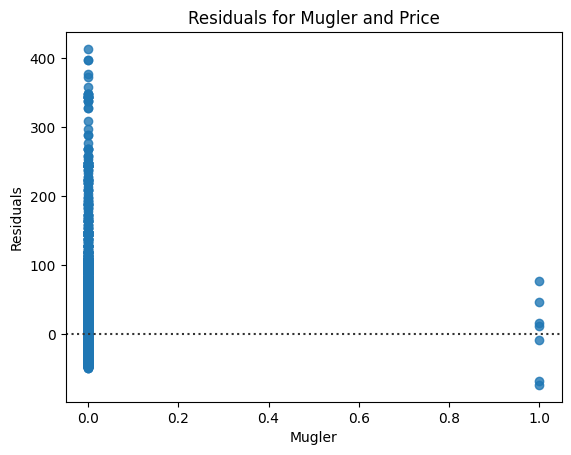

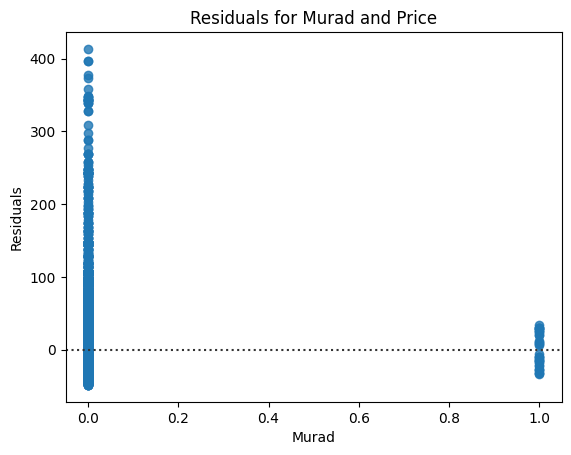

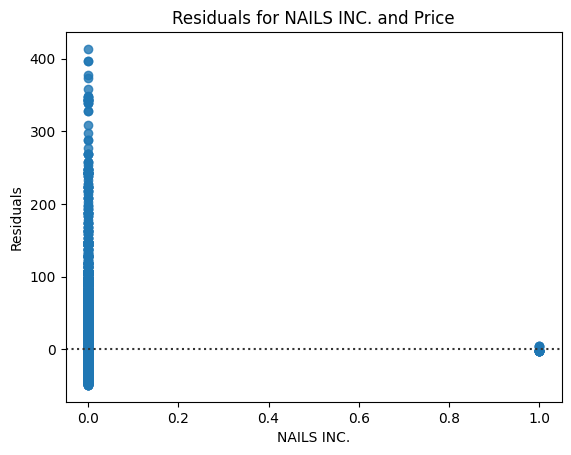

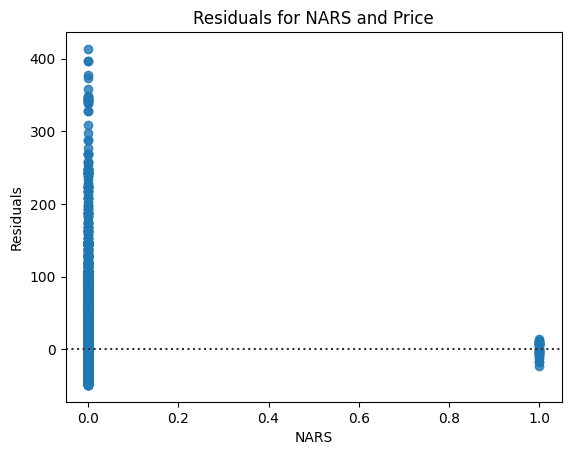

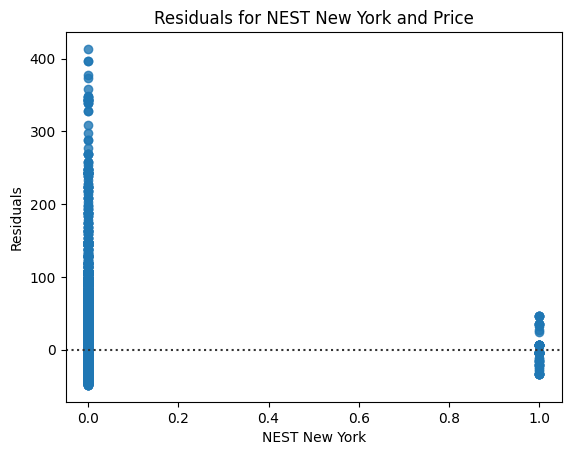

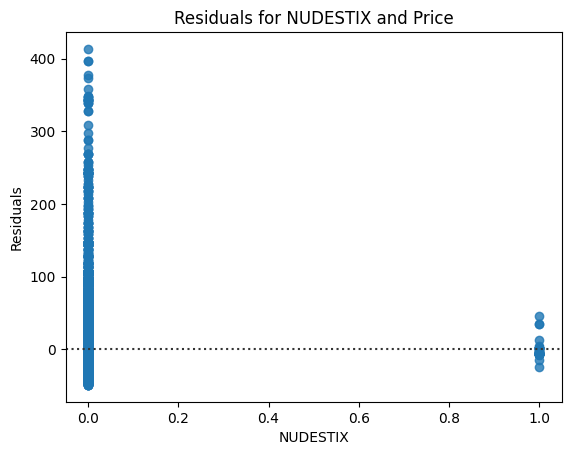

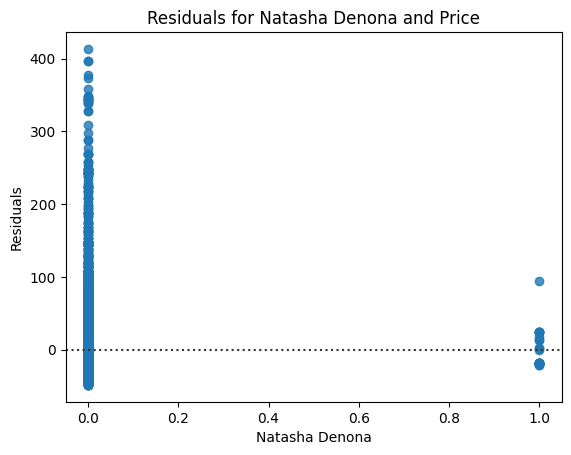

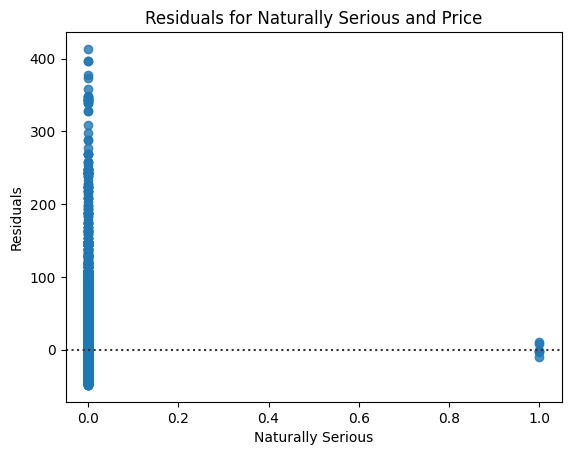

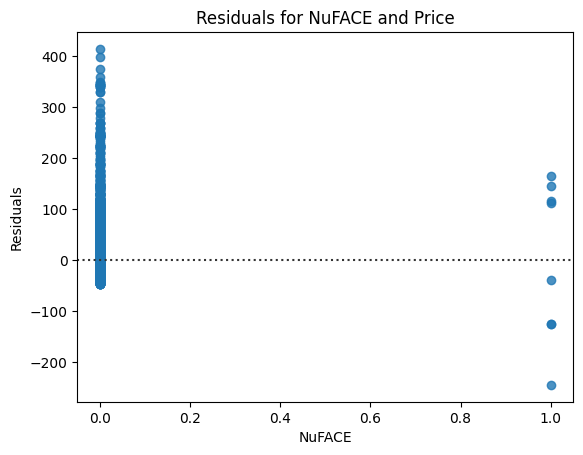

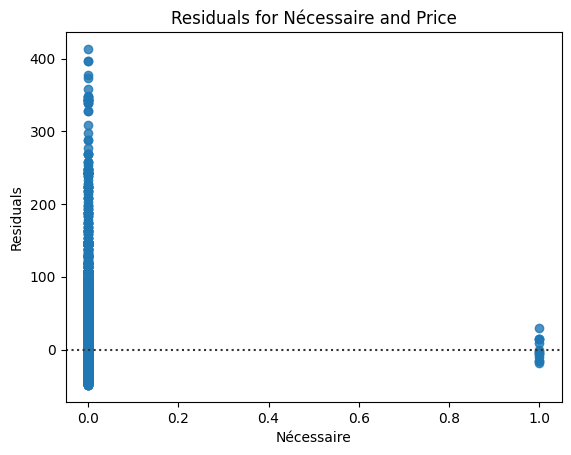

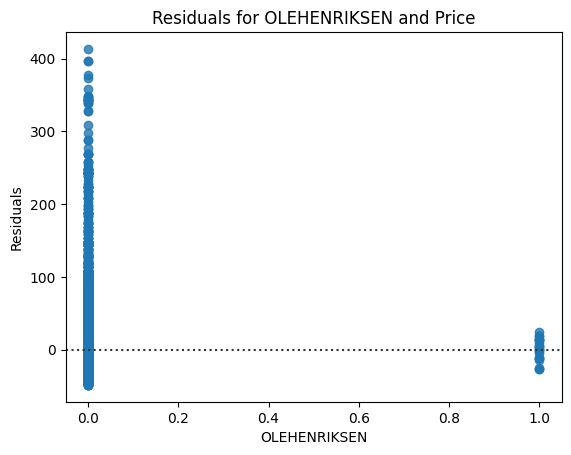

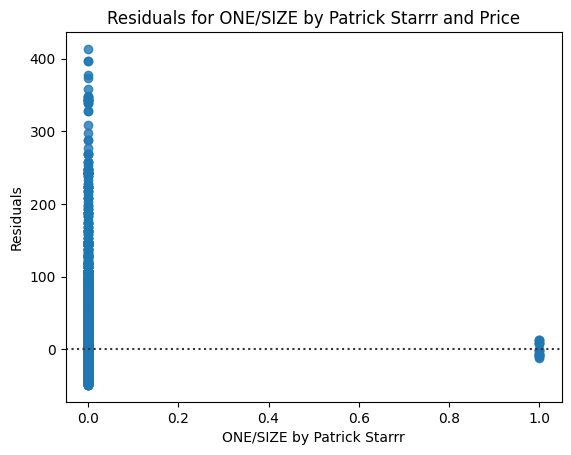

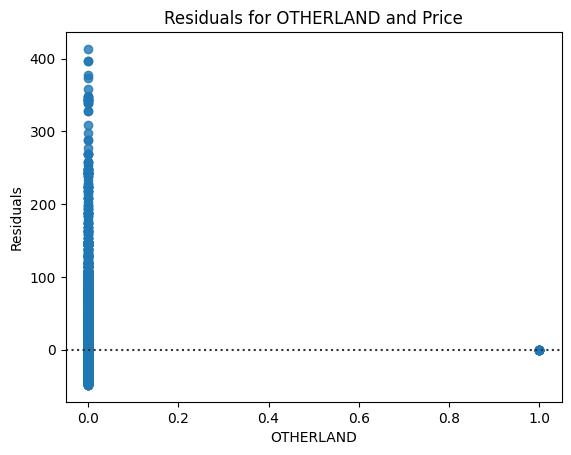

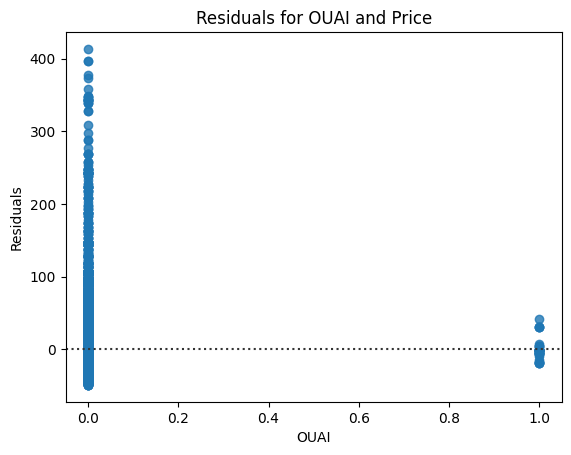

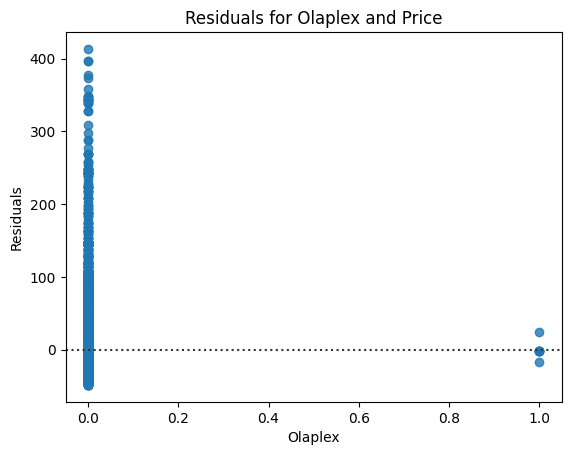

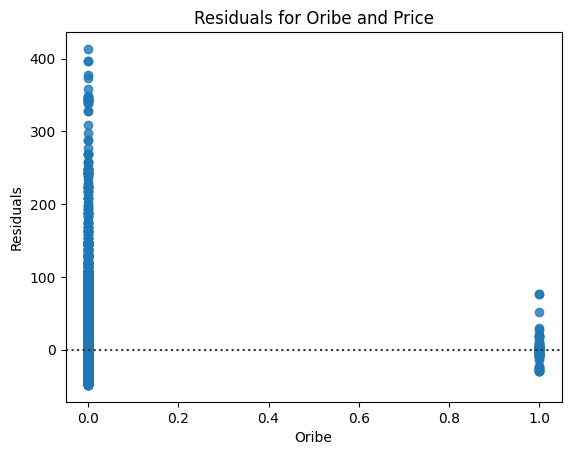

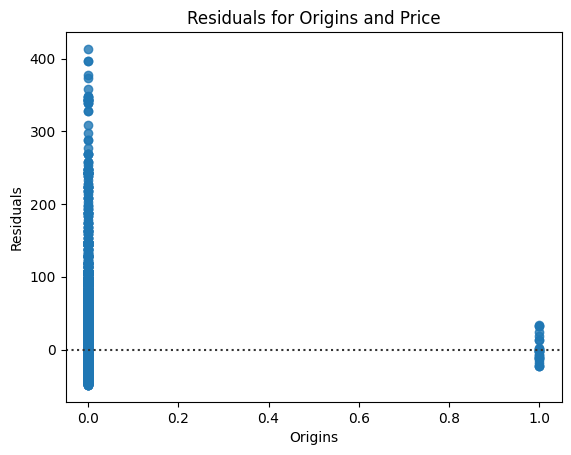

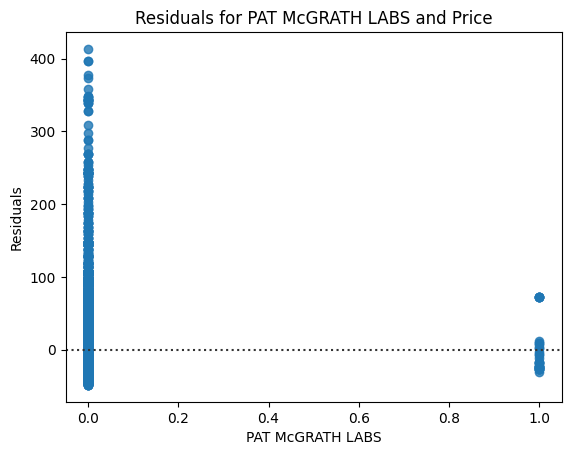

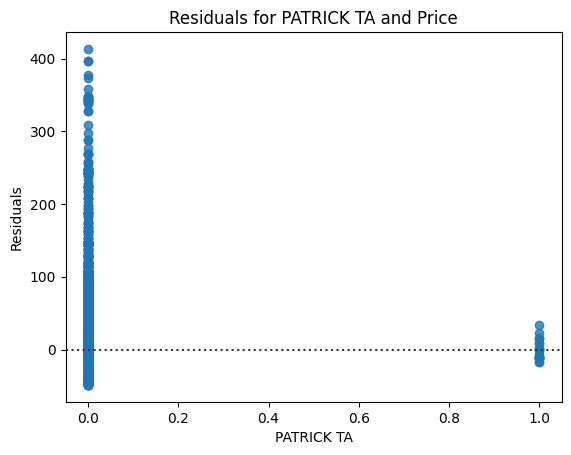

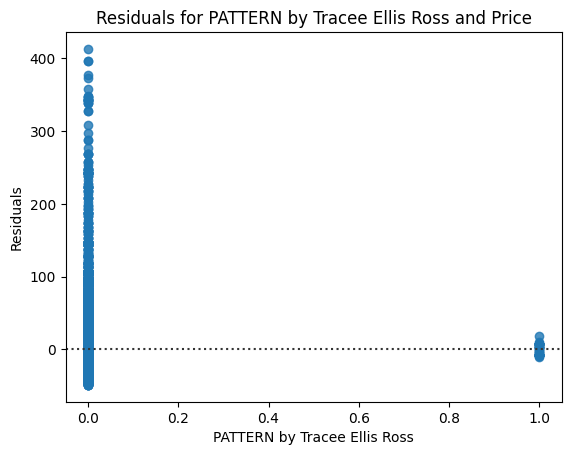

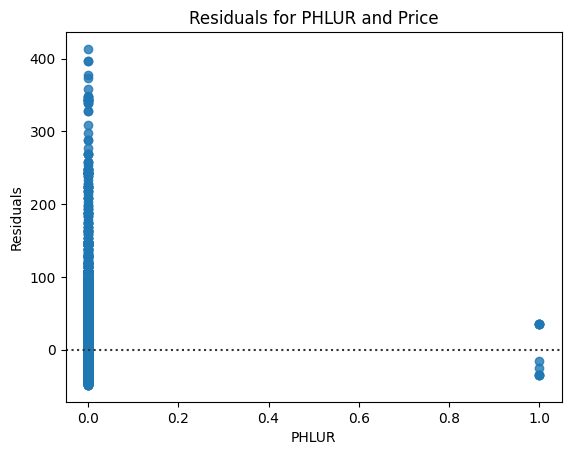

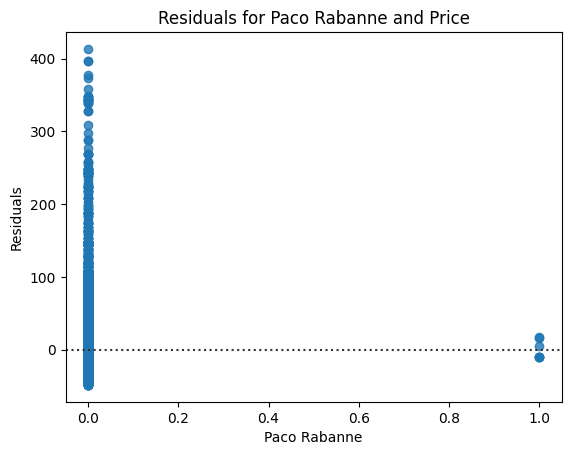

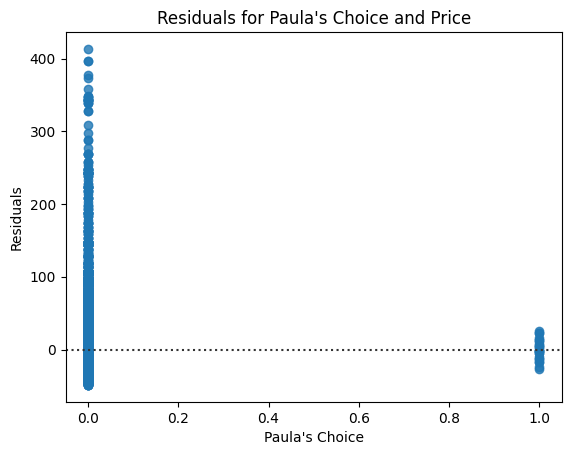

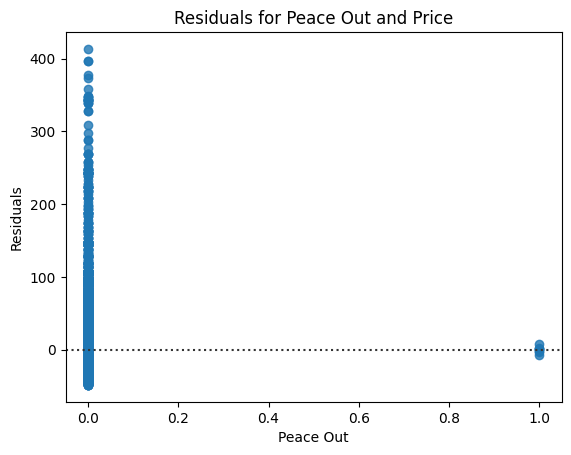

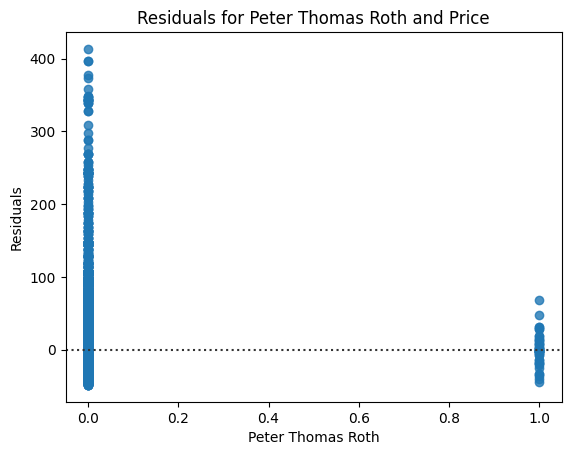

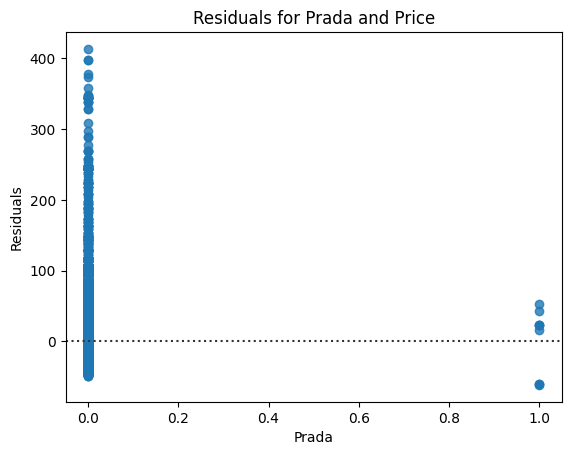

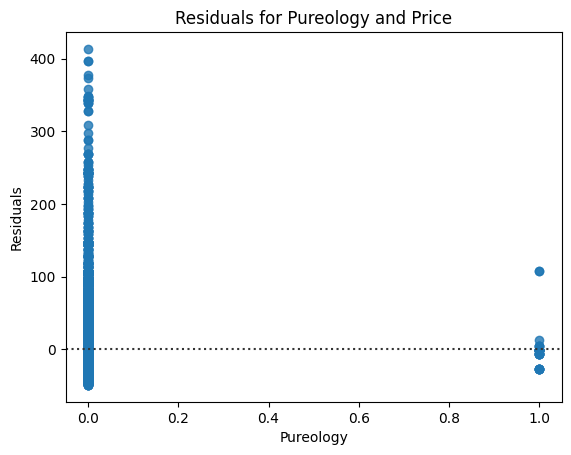

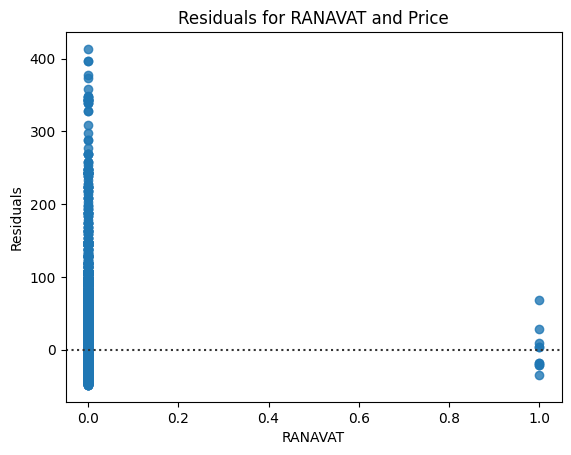

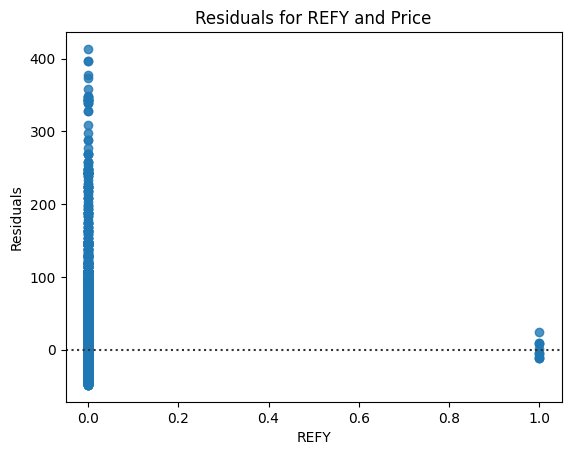

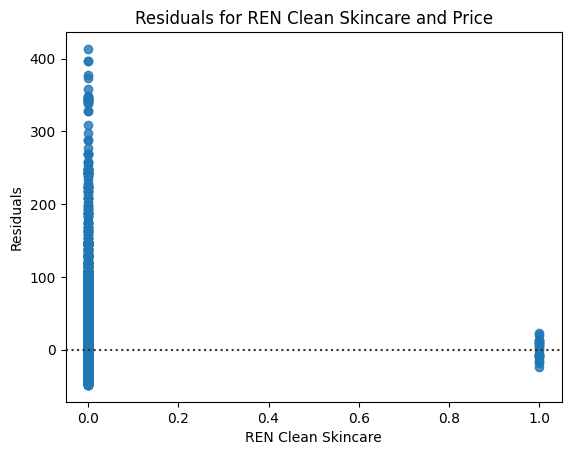

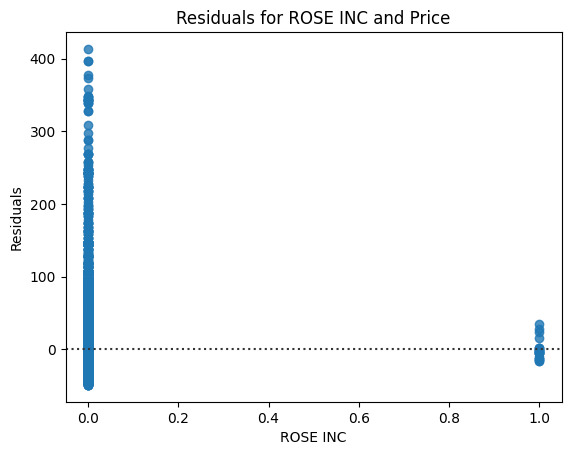

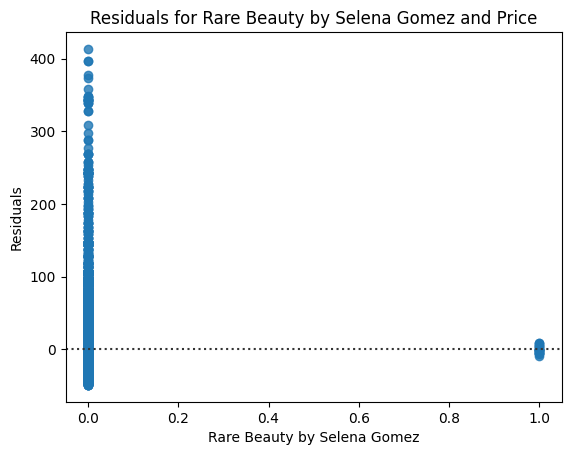

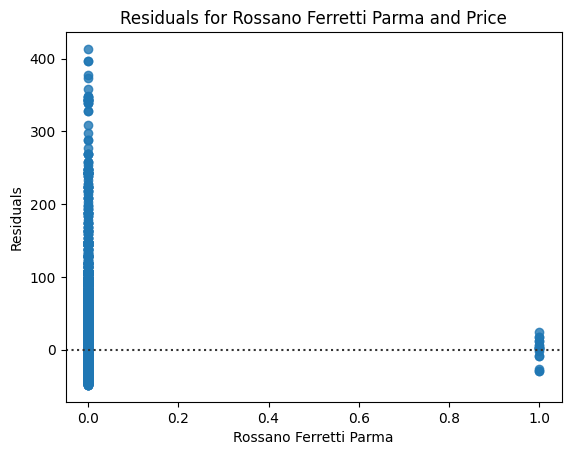

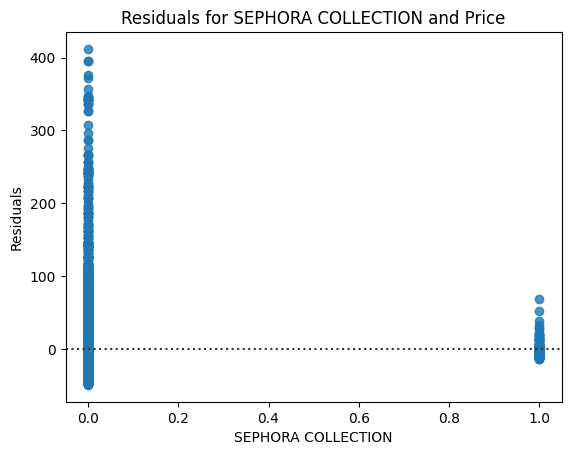

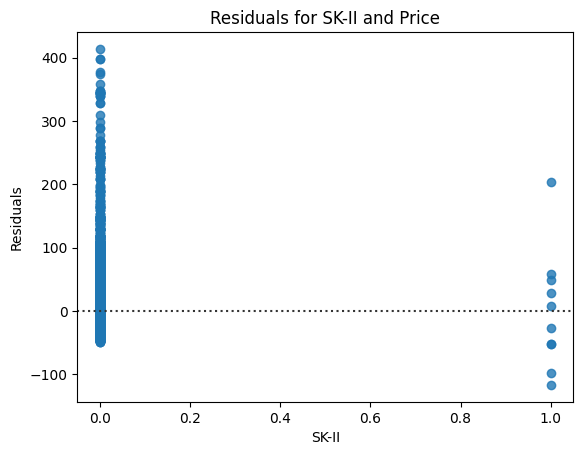

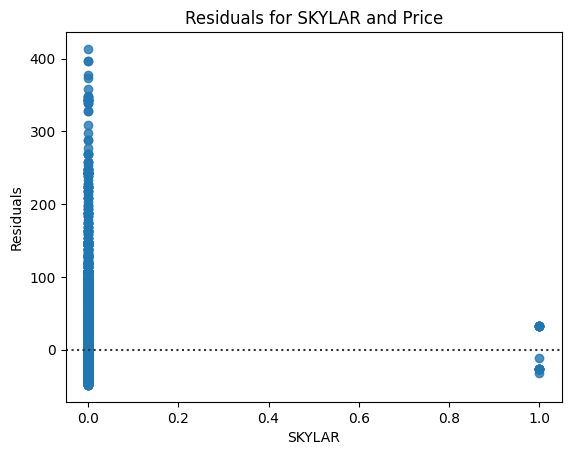

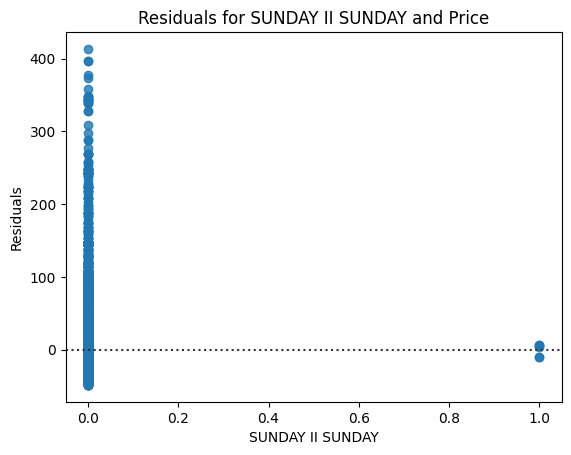

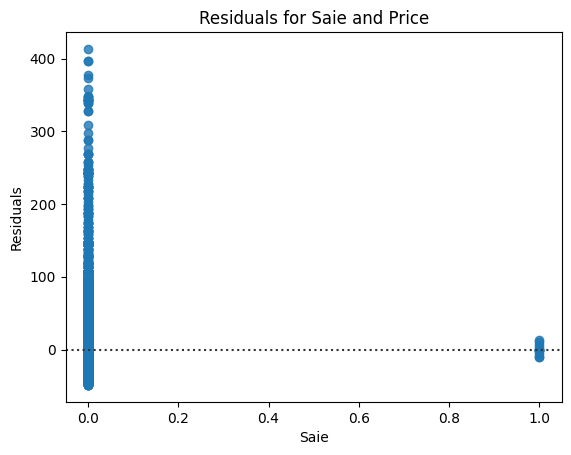

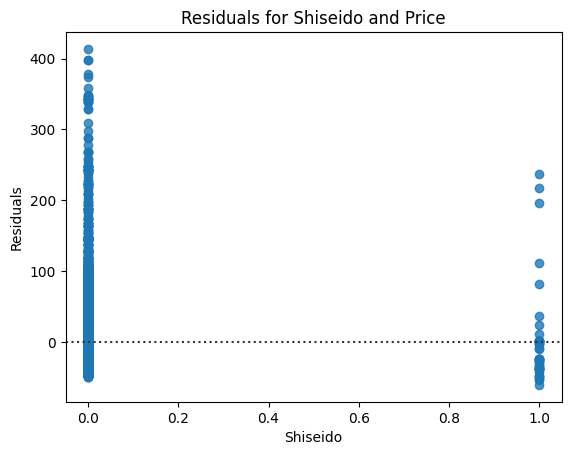

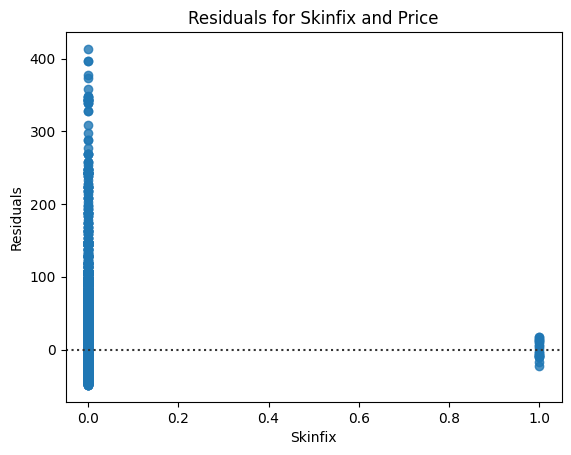

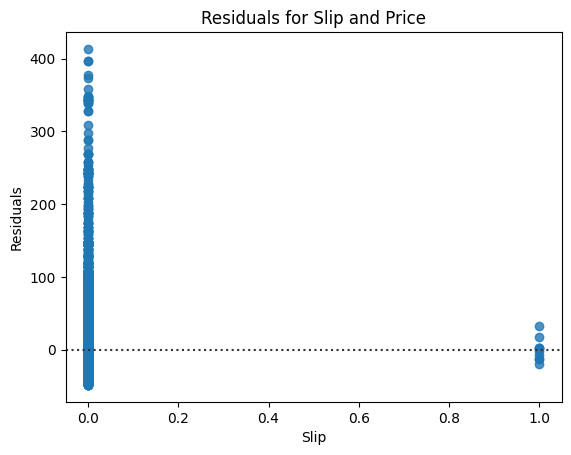

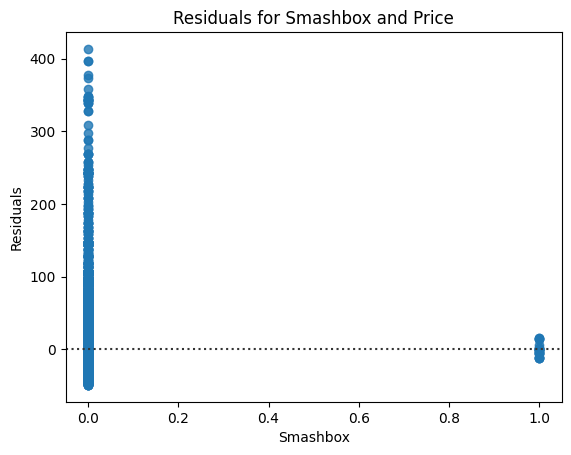

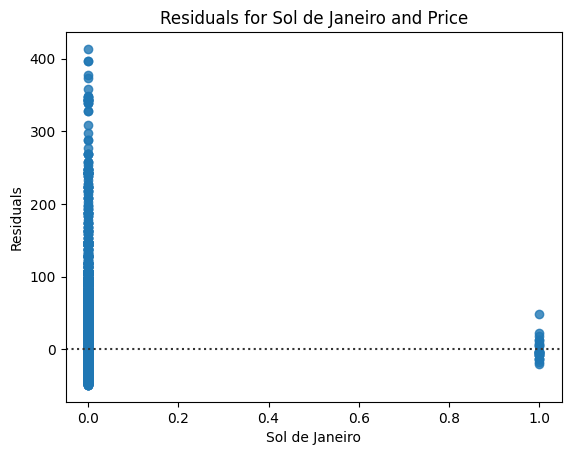

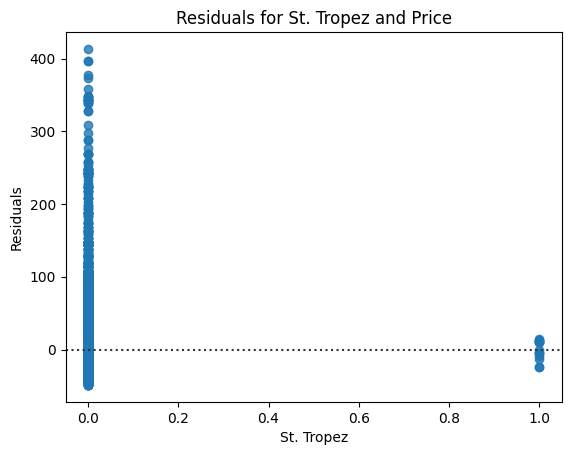

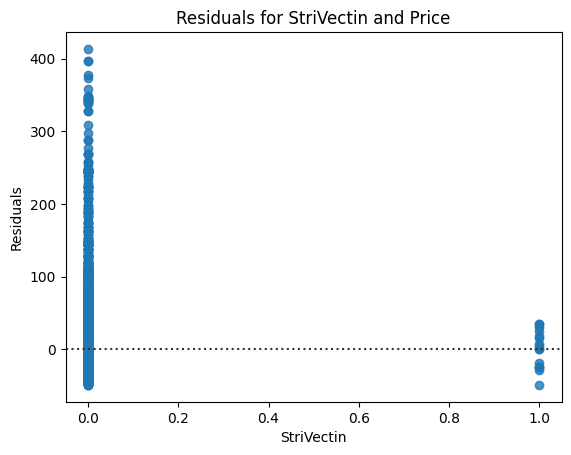

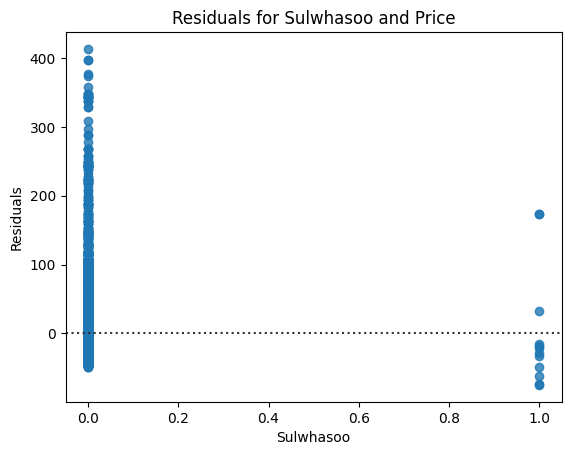

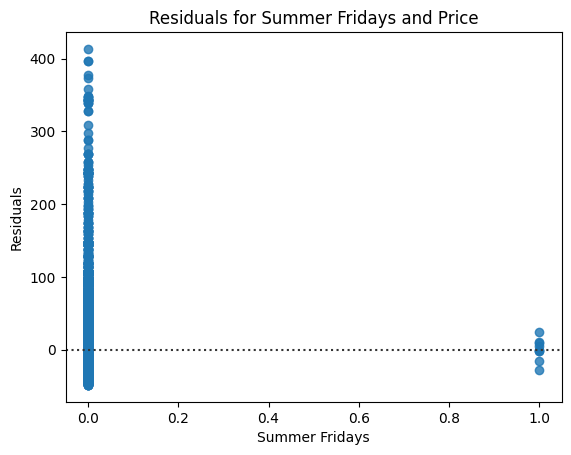

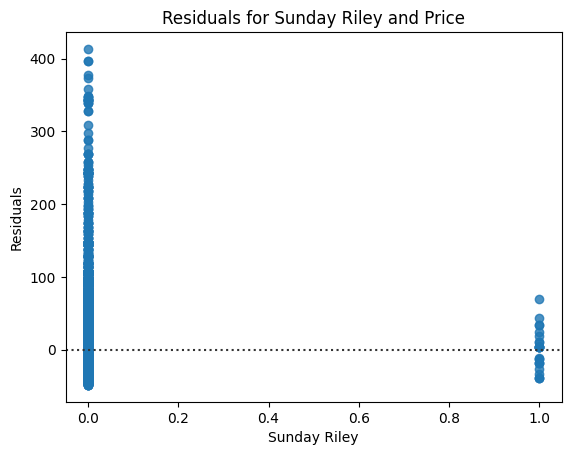

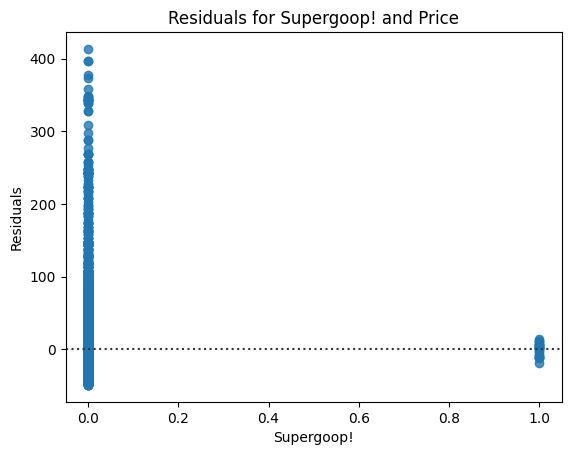

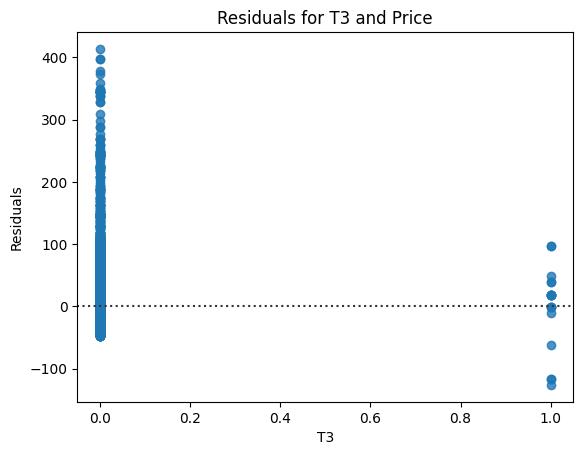

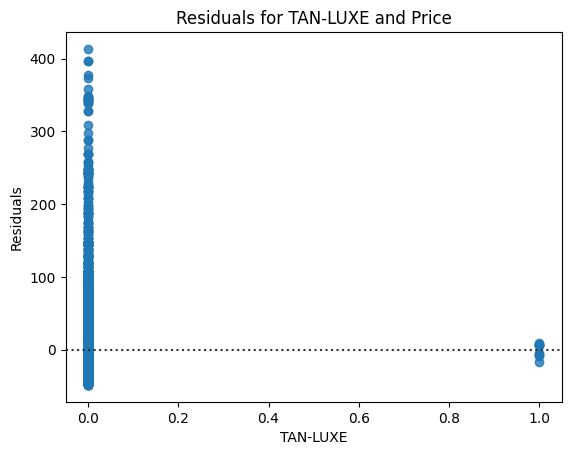

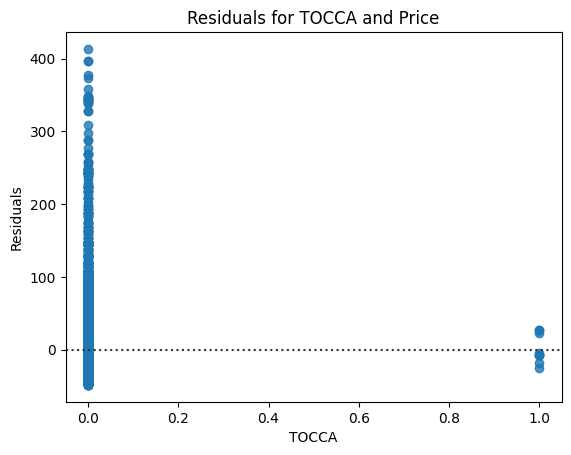

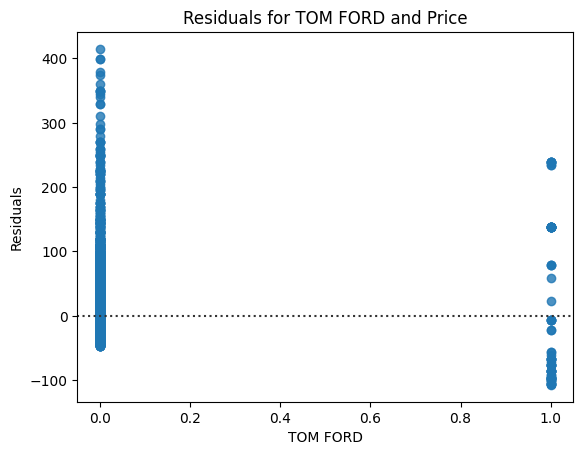

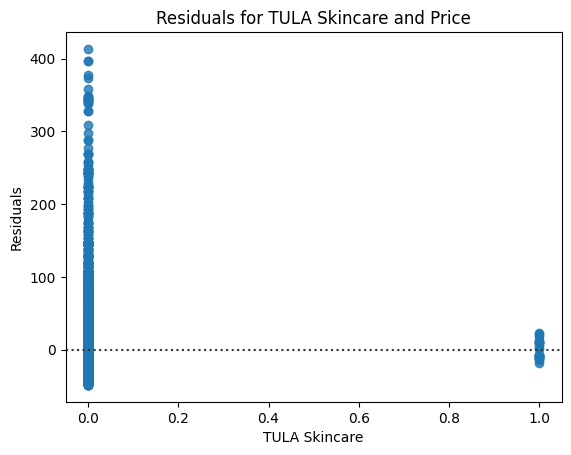

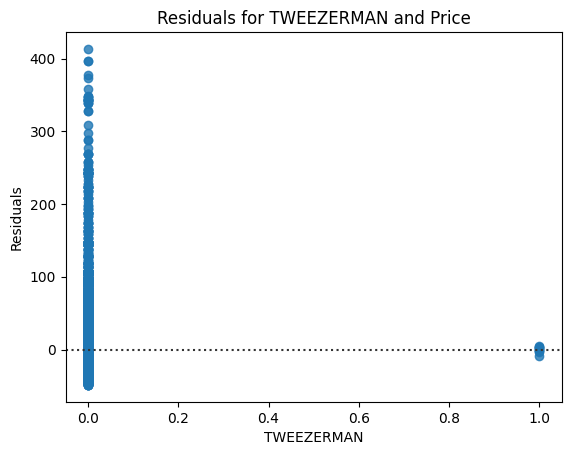

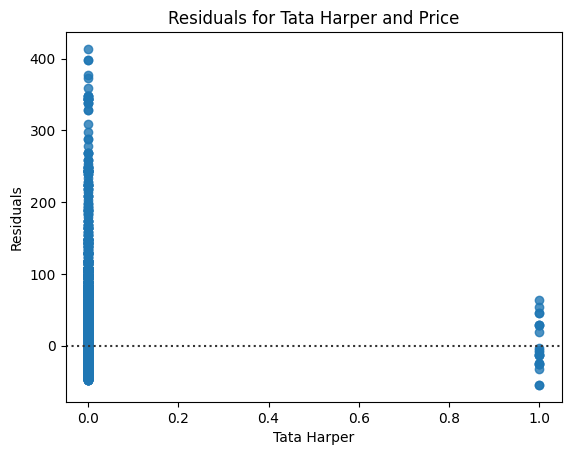

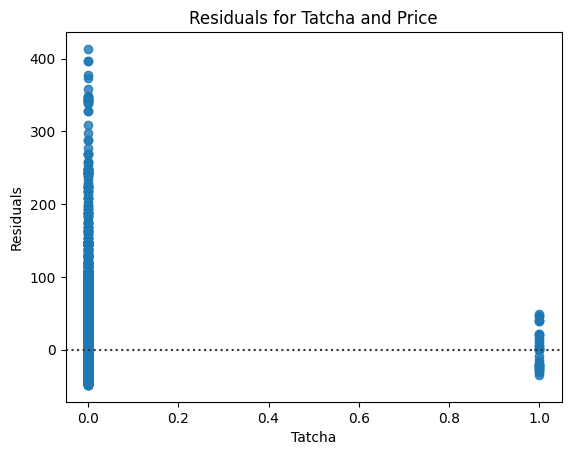

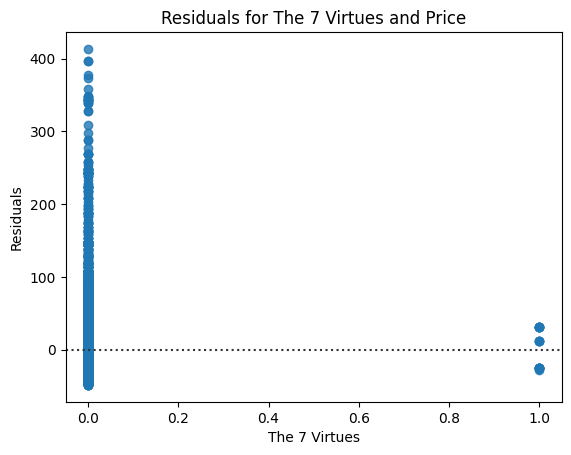

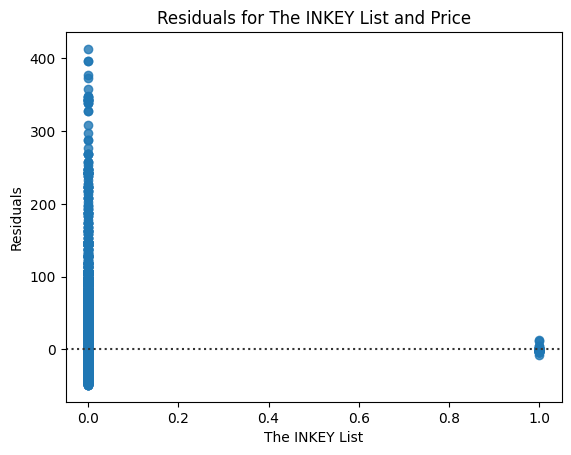

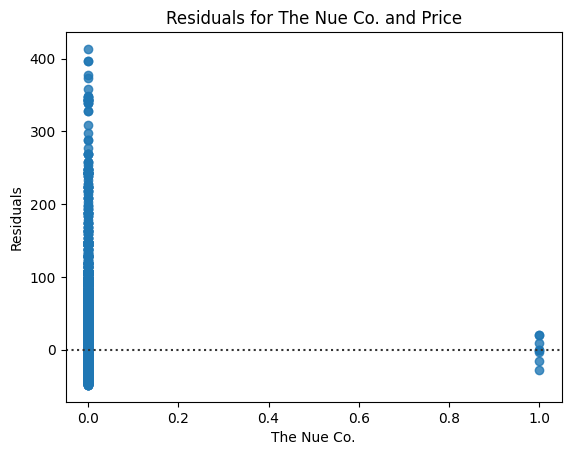

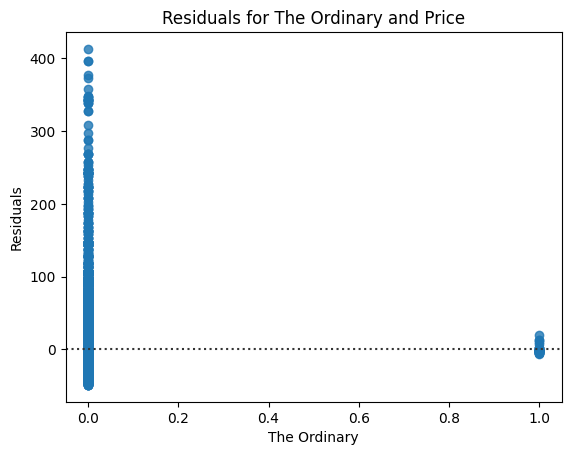

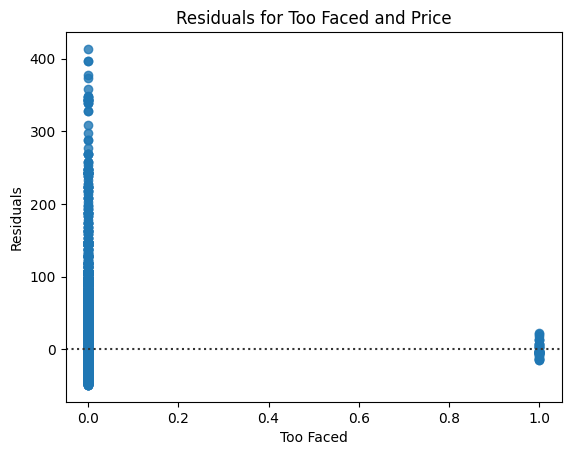

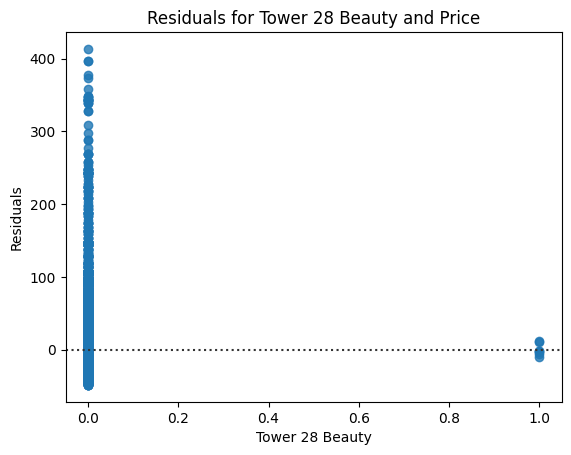

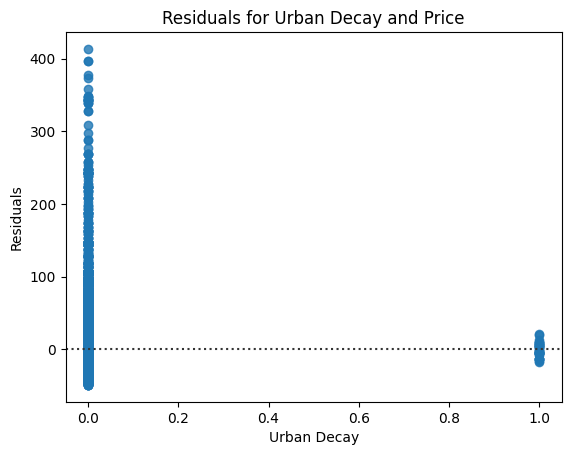

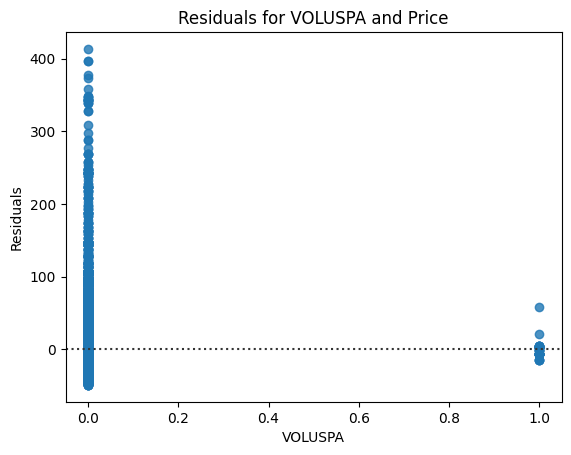

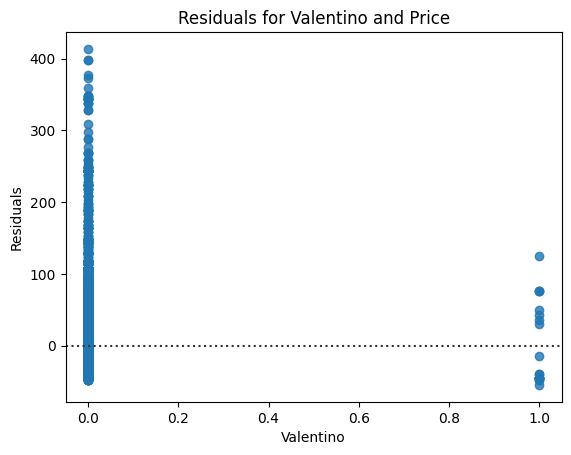

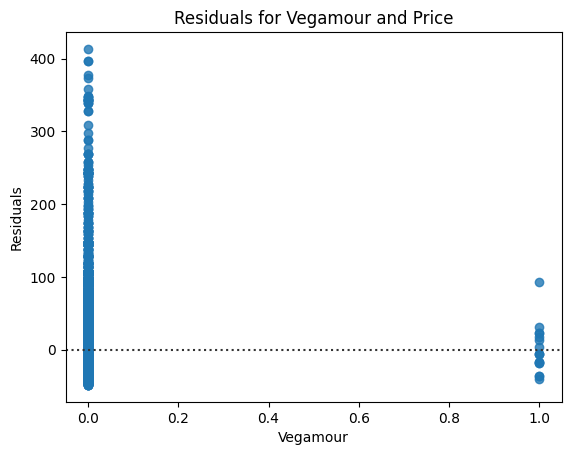

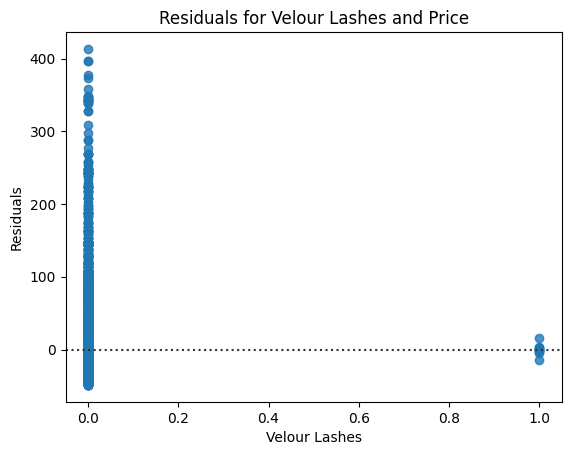

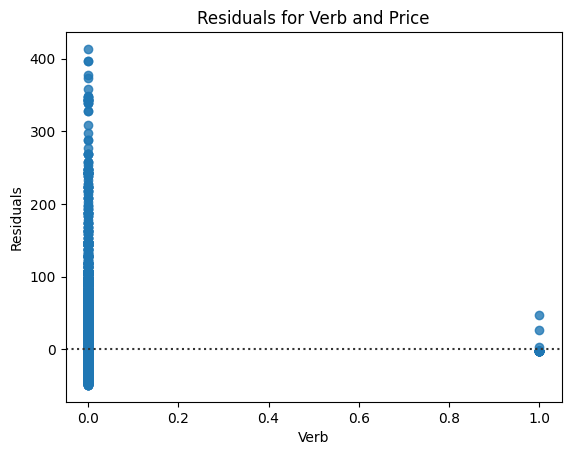

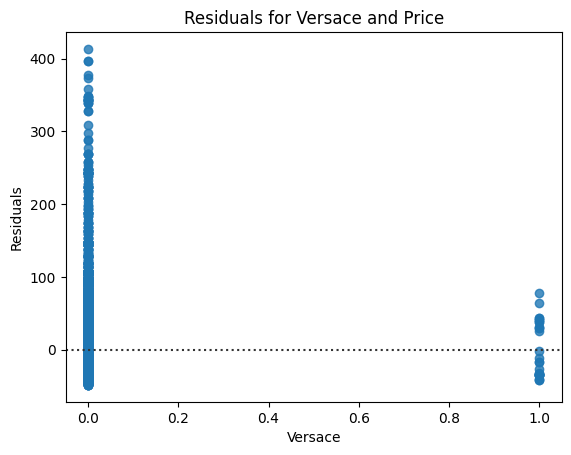

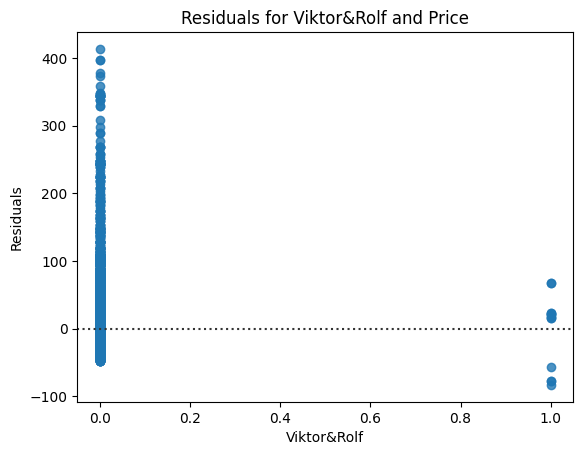

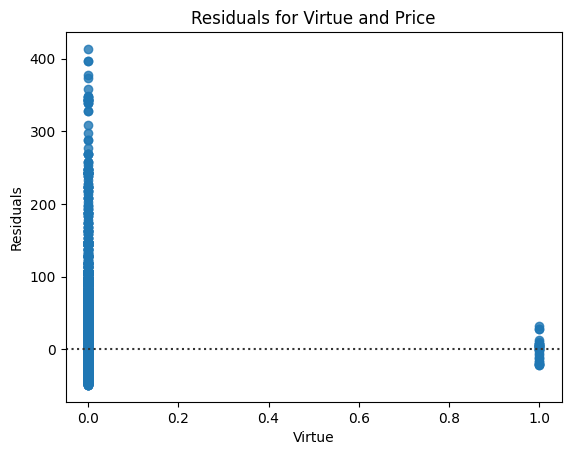

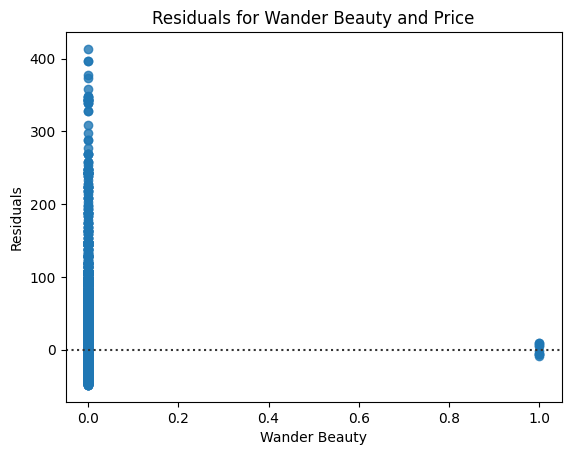

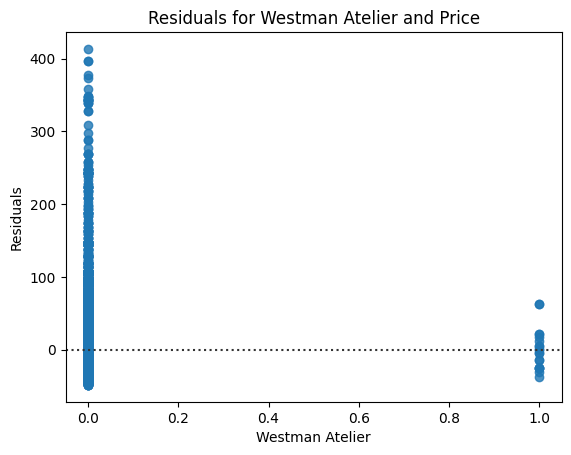

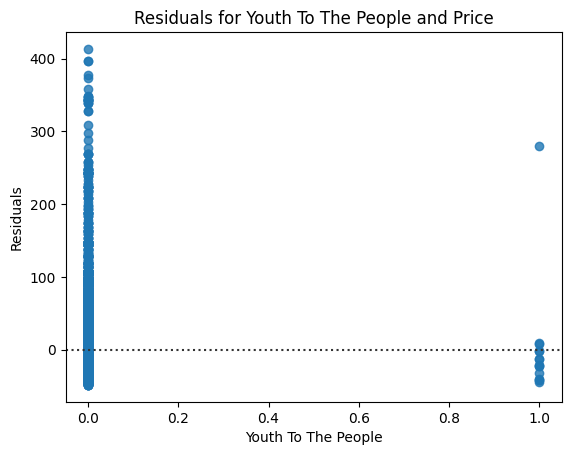

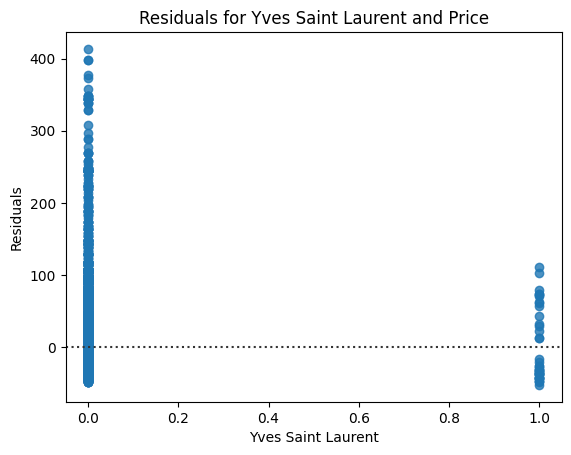

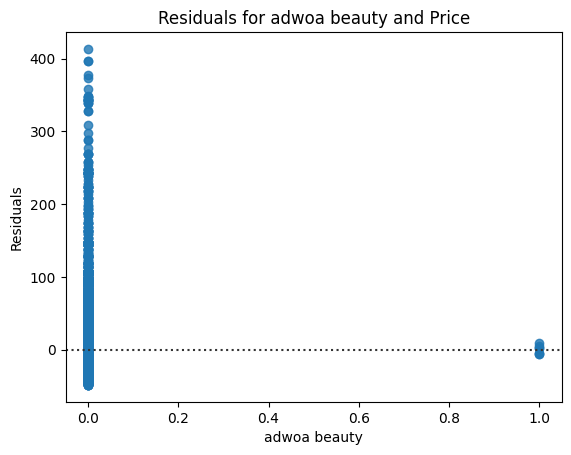

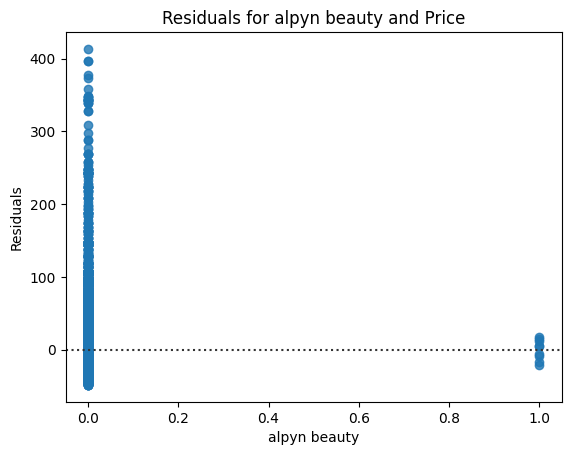

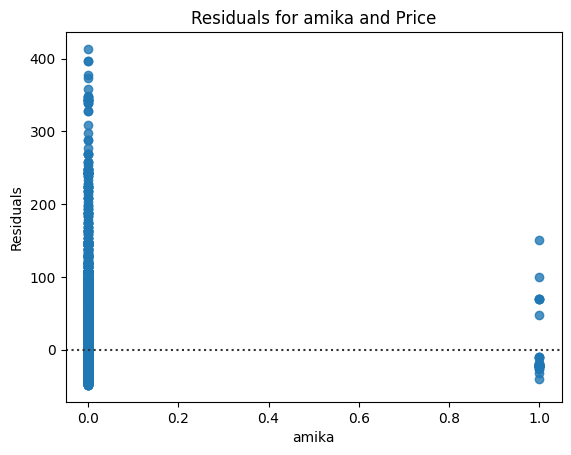

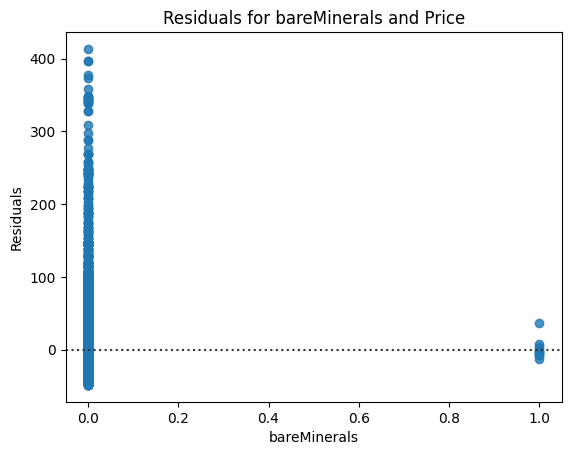

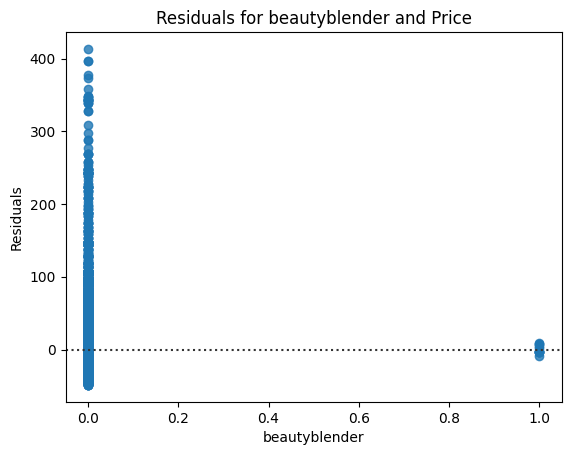

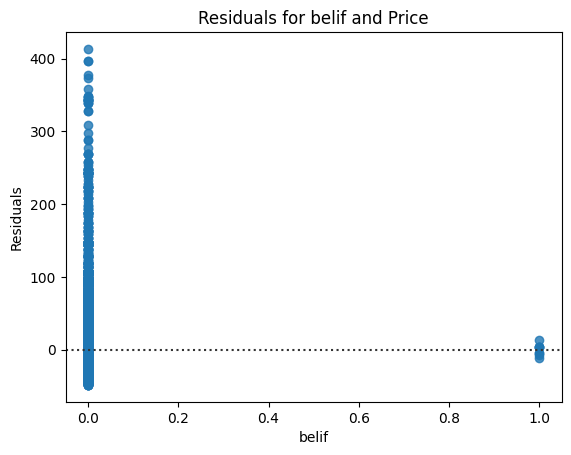

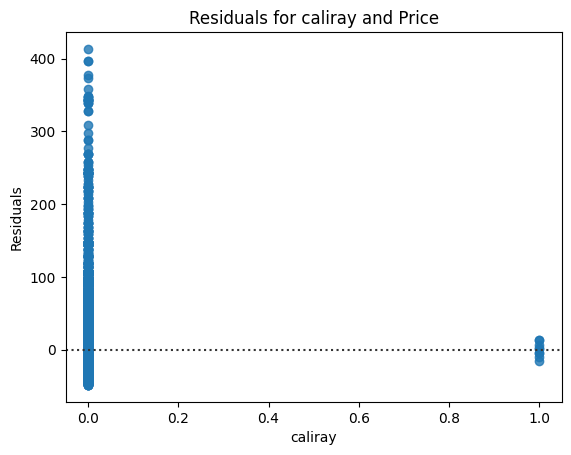

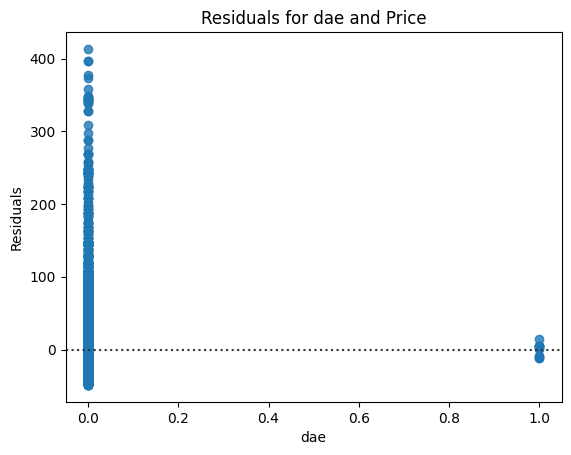

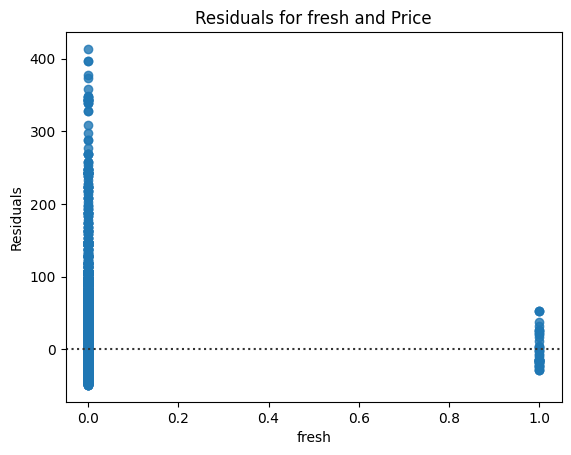

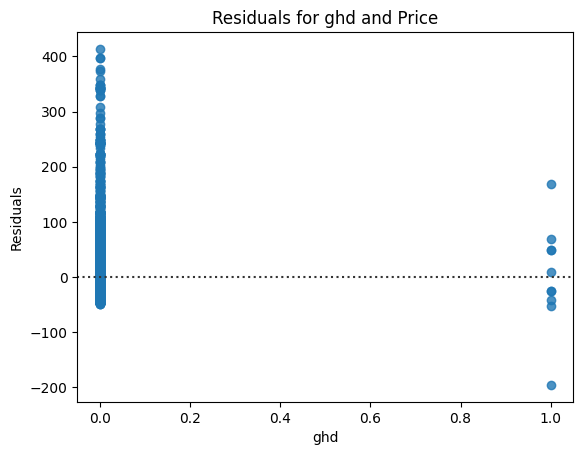

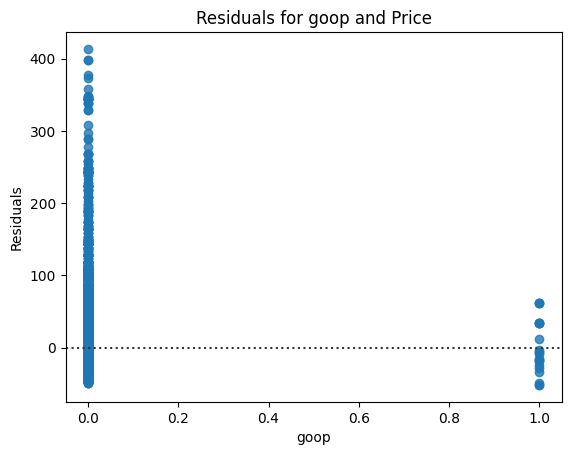

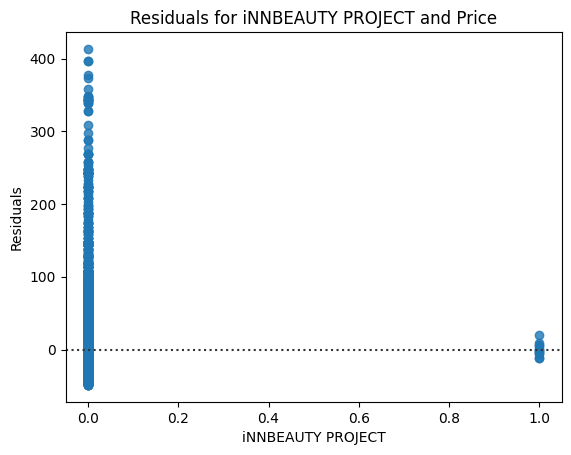

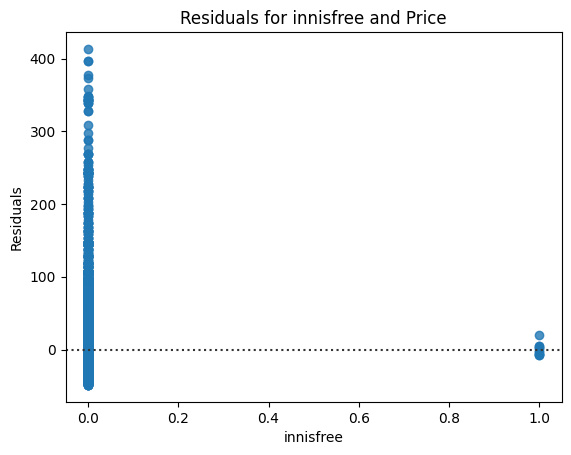

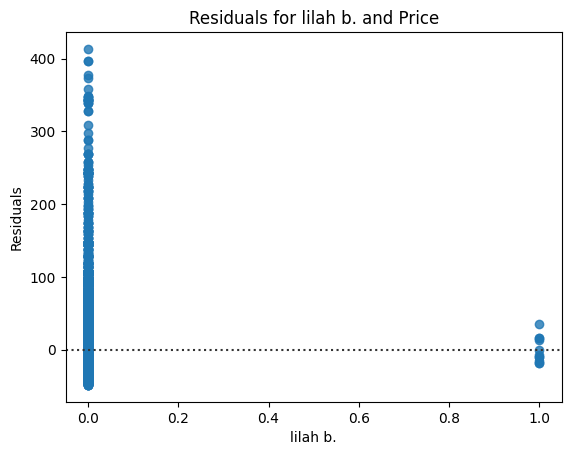

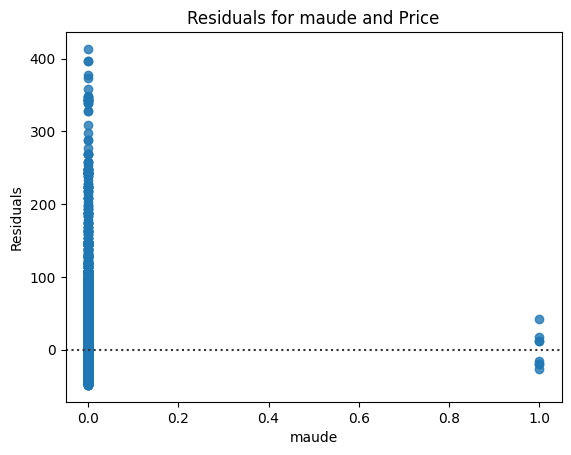

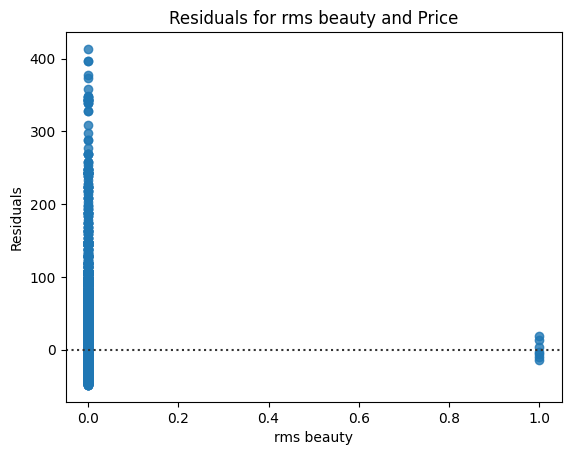

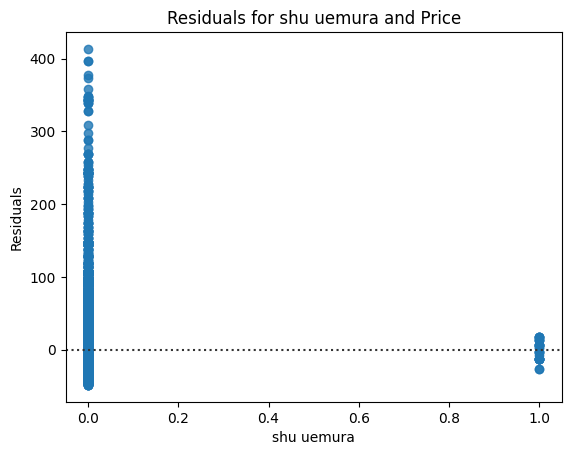

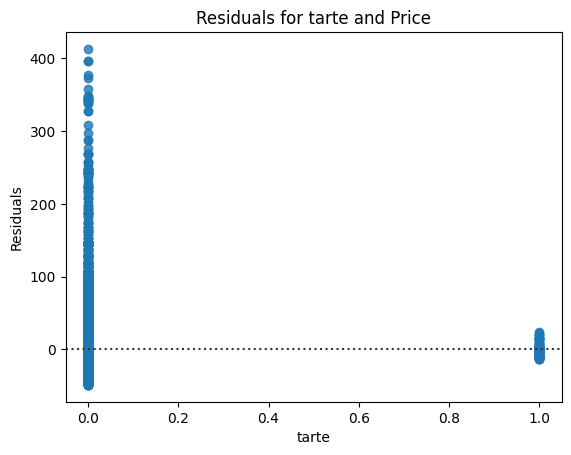

In [394]:
var = X.columns

# Residual plots for transformed features and target
for v in var:
    sns.residplot(x=X_train[v], y=y_train)
    plt.xlabel(v)
    plt.ylabel('Residuals')
    plt.title(f'Residuals for {v} and Price')
    plt.show()


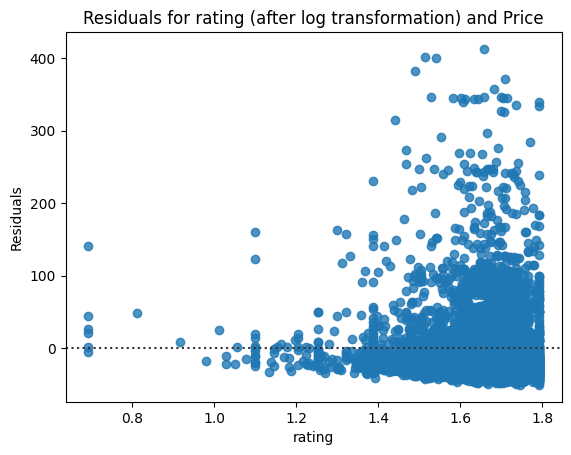

In [396]:
# Log transformation for 'rating'
X_train['rating'] = np.log1p(X_train['rating'])

# Update X_test as well 
X_test['rating'] = np.log1p(X_test['rating'])

# Residual plots after log transformation
var = ['rating']

for v in var:
    sns.residplot(x=X_train[v], y=y_train)
    plt.xlabel(v)
    plt.ylabel('Residuals')
    plt.title(f'Residuals for {v} (after log transformation) and Price')
    plt.show()


### Correlation Coefficient Matrix:

The result of coefficient matrix shows that there is no high correlation between any x-variables. This indicates that there is no multicollinearity and we don't have to drop any of our x-variables before we run our regression.

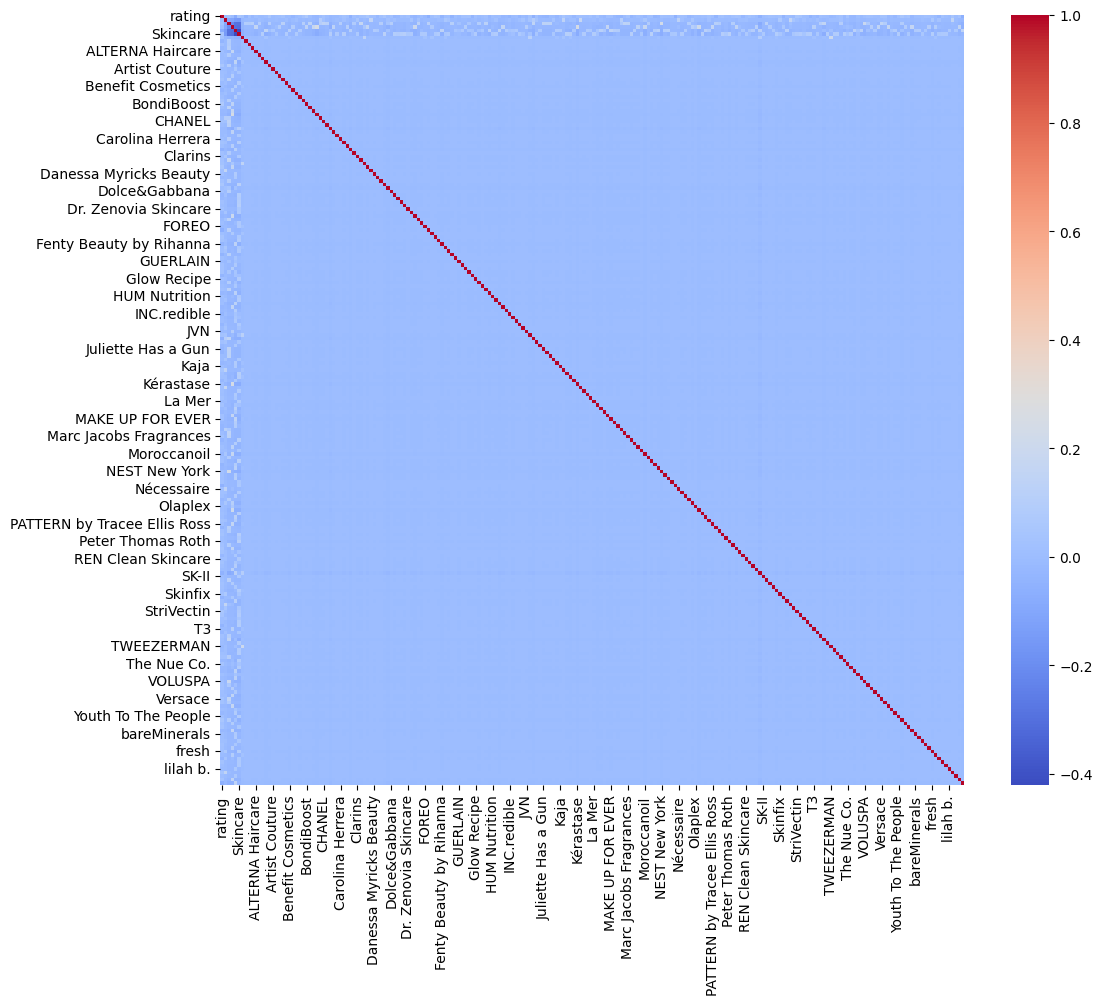

In [397]:
correlation_matrix = X.corr()
correlation_matrix.head(221)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.show()


### Hyperparameter Tuning

Double-check that linear regression is best model for my price prediction.

In [398]:

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)


C:\Users\ashle\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ashle\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ashle\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\ashle\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_pa

model  best_score  \
0  linear_regression        0.45   
1              lasso        0.13   
2      decision_tree       -0.03   

                                         best_params  
0  {'copy_X': True, 'fit_intercept': True, 'posit...  
1                {'alpha': 1, 'selection': 'cyclic'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}

### Linear Regression Model

I created a multi-linear regression model on the trained test.

In [399]:
model = LinearRegression()
model.fit(X_train, y_train)

The model's Review Helpfulness coefficient is 24.93
The model's Recommendation Helpfulness coefficient is -0.3


### KFold Cross Validation and Root Mean Squared Error (RMSE)

We first created a function called kfold_rmse() to run k-fold cross validation with k value as 5 and return the RMSE of Train and Test set.

We created another function to run the k fold 100 times to calculate the average normalized RMSEs of Train and Test set, and their differences. We mainly wanted to see how well our model performs, and see if our model is over/underfitting. We chose RMSE because we wanted to consider biased outliers in our model where for MAE, it treats all errors equally without squaring them.

Analysis: Our model does not overfit since the Train RMSE is greater than the Test RMSE. Our normalized Train and Test RMSE values are fairly close, so this indicates that our model has a relatively good performance and can be generalized to apply to other data. However, since both Train RMSE and Test RMSE are closer to 1, we can conclude that our model can make some errors when making predictions for our model. 

In [427]:
def kfold_rmse(input_vars, reg, X_train, y_train, y_variable, test):
    rmse_train = []
    rmse_test = []
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Fit the model outside the loop
    reg.fit(X_train[input_vars], y_train)
    
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Predict inside the loop
        y_train_pred = reg.predict(X_train_fold[input_vars])
        rmse_train_fold = np.sqrt(mean_squared_error(y_train_fold, y_train_pred))
        rmse_train.append(rmse_train_fold)
        
        y_test_pred = reg.predict(X_test_fold[input_vars])
        rmse_test_fold = np.sqrt(mean_squared_error(y_test_fold, y_test_pred))
        rmse_test.append(rmse_test_fold)
    
    # Average RMSE
    avg_train_rmse = np.mean(rmse_train)
    avg_test_rmse = np.mean(rmse_test)
    
    # Normalize RMSE to the range of your actual RMSE values
    nor_train_rmse = avg_train_rmse / np.max(rmse_train)
    nor_test_rmse = avg_test_rmse / np.max(rmse_test)
    
    return nor_train_rmse, nor_test_rmse

def cv(input_vars):
    rmse_train_list = []
    rmse_test_list = []
    
    for times in range(100):
        nor_train_rmse, nor_test_rmse = kfold_rmse(input_vars, model, X, y, y_variable, test)
        rmse_train_list.append(nor_train_rmse)
        rmse_test_list.append(nor_test_rmse)
    
    avg_train_rmse = np.mean(rmse_train_list)
    avg_test_rmse = np.mean(rmse_test_list)
    
    print(f'Input(s): {input_vars}')
    print('\n')
    print(f'RMSE_train: {avg_train_rmse}; RMSE_test: {avg_test_rmse}')
    print(f'Difference = {avg_train_rmse - avg_test_rmse}')

# Assuming X, y, and test are already defined
y_variable = 'price_usd'
input_vars = list(X.columns)

cv(input_vars)


Input(s): ['rating', 'Bath & Body', 'Fragrance', 'Hair', 'Makeup', 'Skincare', 'Tools & Brushes', '19-69', 'ABBOTT', 'AERIN', 'ALTERNA Haircare', 'Acqua di Parma', 'Algenist', 'Anastasia Beverly Hills', 'Armani Beauty', 'Artist Couture', 'Augustinus Bader', 'BREAD BEAUTY SUPPLY', 'BURBERRY', 'BeautyBio', 'Benefit Cosmetics', 'Bio Ionic', 'Biossance', 'Bobbi Brown', 'Bon Parfumeur', 'BondiBoost', 'Boy Smells', 'Briogeo', 'Bumble and bumble', 'By Rosie Jane', 'CHANEL', 'CLEAN RESERVE', 'CLINIQUE', 'COLOR WOW', 'COOLA', 'Carolina Herrera', 'Caudalie', 'Ceremonia', 'Charlotte Tilbury', 'Chloé', 'Clarins', 'Commodity', 'Crown Affair', 'Curlsmith', 'Dame', 'Danessa Myricks Beauty', 'Deborah Lippmann', 'DedCool', 'Dermalogica', 'Dior', 'Dolce&Gabbana', 'Dr. Barbara Sturm', 'Dr. Brandt Skincare', 'Dr. Dennis Gross Skincare', 'Dr. Jart+', 'Dr. Zenovia Skincare', 'Drunk Elephant', 'Drybar', 'Ellis Brooklyn', 'Estée Lauder', 'FOREO', 'FORVR Mood', 'Fable & Mane', 'FaceGym', 'Farmacy', 'Fenty Beau

## Part 8: Testing the Model <a name="modeltesting"></a>

In [403]:
X.head()

rating  Bath & Body  Fragrance  Hair  Makeup  Skincare  Tools & Brushes  \
0    3.64            0          1     0       0         0                0   
1    4.15            0          1     0       0         0                0   
2    4.25            0          1     0       0         0                0   
3    4.48            0          1     0       0         0                0   
4    3.23            0          1     0       0         0                0   

   19-69  ABBOTT  AERIN  ...  fresh  ghd  goop  iNNBEAUTY PROJECT  innisfree  \
0      1       0      0  ...      0    0     0                  0          0   
1      1       0      0  ...      0    0     0                  0          0   
2      1       0      0  ...      0    0     0                  0          0   
3      1       0      0  ...      0    0     0                  0          0   
4      1       0      0  ...      0    0     0                  0          0   

   lilah b.  maude  rms beauty  shu uemura  tarte  
0         0      0           0           0      0  
1         0      0           0           0      0  
2         0      0           0           0      0  
3         0      0           0           0      0  
4         0      0           0           0      0  

[5 rows x 220 columns]

In [404]:
X.columns

Index(['rating', 'Bath & Body', 'Fragrance', 'Hair', 'Makeup', 'Skincare',
       'Tools & Brushes', '19-69', 'ABBOTT', 'AERIN',
       ...
       'fresh', 'ghd', 'goop', 'iNNBEAUTY PROJECT', 'innisfree', 'lilah b.',
       'maude', 'rms beauty', 'shu uemura', 'tarte'],
      dtype='object', length=220)

In [405]:
np.where(X.columns=='Fragrance')[0][0]

2

In [408]:
#Function to predict the price
def predict_price(rating, primary_category, brand_name):    
    category_index = np.where(X.columns == primary_category)[0][0]
    brand_index = np.where(X.columns == brand_name)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = rating
    if category_index >= 0:
        x[category_index] = 1
    if brand_index >= 0:
        x[brand_index] = 1

    return model.predict([x])[0]


Testing Values

In [409]:
predict_price(4.56, 'Makeup', 'rms beauty')

C:\Users\ashle\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


110.40302757060186

In [410]:
predict_price(2, 'Hair', 'ABBOTT')

C:\Users\ashle\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


17.912539916459707

## Part 9: Conclusion and Interpretation: <a name="part8"></a>

### Interpretation <a name="interpretation"></a>

For our first research question, we conducted an OLS regression model on the training set for the x-variables and Y1, New_Add_to_Cart_Browsing. Our main goal was to check the statistical significance (p-value) of each x variable’s impact on the likelihood of users adding items to the cart. We set our significance level to be 0.05. Despite that all the correlations are positive, we found a higher p-value of 0.432 (>0.05) for New_Personalized_Recommendation_Frequency. As a result, we have to accept the null hypothesis, higher levels of personalized recommendations do not correlate to the higher frequency of users adding items to their shopping carts. However, we can reject the null hypothesis for the other two variables (New_Review_Helpfulness and New_Recommendation_Helpfulness) as the p-values of 0.000 and 0.001 relatively are lower than 0.05. Upon this realization, we dropped the New_Personalized_Recommendation_Frequency from our x-variables and created a new multi-linear regression with the two remaining x-variables. The following are the interpretations of the regression model:

- Review Helpfulness: All else equal, for every one unit increase in review helpfulness, our model predicts the frequency of Add to Cart Browsing to increase by around 0.43 units.

- Recommendation Helpfulness: All else equal, for every one unit increase in Recommendation helpfulness, our model predicts the frequency of Add to Cart Browsing to increase by around 0.16 units.

- Intercept: When the Review Helpfulness and the Recommendation Helpfulness are both zero, our model predicts that the frequency of Add to Cart Browsing is around 0.49.

To test if this model can be generalized to other data and can make fairly accurate predictions, we ran the Kfold Cross Validation 100 times and calculated the average of RMSEs for both the train and test sets, which are approximately 0.165 and 0.160 relatively. Since Train RMSE is greater than Test RMSE by 0.005, our model does not overfit data. We can conclude that the predicted model overall has good reliability in predicting other data because the normalized RMSEs are close to zero and can be generalized to other data due to a slight difference between the RMSEs.

We took a similar approach to our second research question, running another OLS regression model to help us understand the relationship between the x-variables and the second y-variable which is the frequency of users completing shopping carts. Again, we dropped the New_Personalized_Recommendation_Frequency variable because the p-value of 0.981 is greater than 0.05. This means we accept the null hypothesis for this x and y variable that higher levels of personalized recommendations do not correlate to the higher frequency of users completing shopping cart purchases, but reject the null hypothesis for the rest of the x-variables (New_Review_Helpfulness and New_Recommendation_Helpfulness) as the p-values are 0.011 and 0.035 relatively. Similarly, we created a multi-linear regression with the remaining variables. The following are the interpretations of the regression model:

- Review Helpfulness: All else equal, for every one unit increase in review helpfulness, our model predicts the frequency of Cart Completion to increase by around 0.15 units.

- Recommendation Helpfulness: All else equal, for every one unit increase in Recommendation helpfulness, our model predicts the frequency of Cart Completion to increase by around 0.13 units.

- Intercept: When the Review Helpfulness and the Recommendation Helpfulness are both zero, our model predicts that the frequency of Cart Completion is around 1.97.

We ran the Kfold Cross Validation 100 times and calculated the average of RMSEs for both the train set(0.165) and test set(0.239). The model might overfit some data (Train RMSE < Test RMSE), but still make good predictions as the RMSEs are close to zero. 

For the third research question, we ended up focusing on only one age group, 19-25. We plotted a bar chart showing the mean of frequency users’ adding items to cart when they find the reviews are helpful/not helpful. The chart depicts that people who find reviews helpful tend to have a higher frequency of adding items to their shopping cart which is around 1.40, yet people still add items to their cart even if the reviews are not helpful with a frequency of 0.70. (Note: 0=No, 1=Maybe, 2=Yes) Besides, we conducted a statistical test between young adults who found the reviews helpful/not helpful and found a p-value of approximately 0.00 (< 0.05) which indicates our result is statistically significant. Therefore, we can reject the null hypothesis that young adults (19-25) who find the reviews helpful do not have a higher frequency of adding items to their shopping cart. 

### Conclusion <a name="conclusion"></a>

Given our significant p-values of the results across hypothesis tests, we can conclude that there is a positive relationship between the review helpfulness, recommendation helpfulness, and the frequency of adding items to cart/the frequency of completing shopping cart. In addition, we looked into the 19-25 age group in our third hypothesis test, and found that young adults tend to be more likely to add items to cart if helpful reviews are provided. Apart from the above results, we believe it would be interesting to make a three-dimensional model and investigate the correlation between user experiences, user behaviors, and age groups, and these are potential next steps we can take in this research. 

Our results imply that it would be in Amazon's best interest to incentivize users to leave ratings and reviews, but  it should work on giving users better personalized recommendations of products.

## Part 10: Data Limitation <a name="datalimitation"></a>

**1. Time Constraint**

The dataset employed is derived from Sephora's website as of March 2023. However, it is important to acknowledge that newly released products subsequent to this date may not be accounted for in the model.

In [411]:
import pickle
with open('sephora_products_prices_model.pickle','wb') as f:
    pickle.dump(model,f)



In [412]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

